# Master Thesis: Prediction Model for Olympic Games 2024

## Part 1: Exploratory Data Analysis

### Import all libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings

### Load the olympic datasets

In [2]:
df_athlete_bio = pd.read_csv('/Users/farah/Documents/Jupyter Repository/archive/Olympic_Athlete_Bio.csv')
df_results = pd.read_csv('/Users/farah/Documents/Jupyter Repository/archive/Olympic_Results.csv')
df_athlete_event_results = pd.read_csv('/Users/farah/Documents/Jupyter Repository/archive/Olympic_Athlete_Event_Results.csv')
df_games_medal_tally = pd.read_csv('/Users/farah/Documents/Jupyter Repository/archive/Olympic_Games_Medal_Tally.csv')
df_games = pd.read_csv('/Users/farah/Documents/Jupyter Repository/archive/Olympics_Games.csv')

### 1. Athlete's data

In [3]:
df_athlete_bio.head()

athlete_id                 name     sex        born height weight  \
0       16809       Károly Teppert    Male  1891-07-20     na     na   
1       43737    Andrzej Socharski    Male  1947-08-31  173.0     72   
2       50147  Nathalie Wunderlich  Female  1971-06-03  170.0     50   
3        5085           Miha Lokar    Male  1935-09-10  182.0     76   
4      136329          Austin Hack    Male  1992-05-17  203.0    100   

          country country_noc  \
0         Hungary         HUN   
1          Poland         POL   
2     Switzerland         SUI   
3      Yugoslavia         YUG   
4   United States         USA   

                                         description  \
0  Károly Teppert started competing in cycling in...   
1                                                 na   
2                                                 na   
3                                                 na   
4                                                 na   

                                       special_notes  
0                                                 na  
1  Listed in Olympians Who Won a Medal at the Wor...  
2                                                 na  
3  Listed in Olympians Who Won a Medal at the Eur...  
4                                                 na

In [4]:
df_athlete_bio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155031 entries, 0 to 155030
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   athlete_id     155031 non-null  int64 
 1   name           155031 non-null  object
 2   sex            155031 non-null  object
 3   born           155031 non-null  object
 4   height         155031 non-null  object
 5   weight         155031 non-null  object
 6   country        155031 non-null  object
 7   country_noc    155031 non-null  object
 8   description    155031 non-null  object
 9   special_notes  155031 non-null  object
dtypes: int64(1), object(9)
memory usage: 11.8+ MB


In [5]:
df_athlete_bio.describe()

athlete_id
count  1.550310e+05
mean   1.489261e+05
std    3.027535e+05
min    1.000000e+00
25%    3.906650e+04
50%    7.811300e+04
75%    1.183005e+05
max    2.200000e+07

### 2. Olympic Results data

In [6]:
df_results.head()

result_id                         event_title               edition  \
0       9270         7 metres, 1907 Rating, Open  1920 Summer Olympics   
1      29722  Featherweight (≤60 kilograms), Men  1980 Summer Olympics   
2      54126                       Platform, Men  1948 Summer Olympics   
3       4684          100 metres Backstroke, Men  1920 Summer Olympics   
4       1465                         Slalom, Men  2002 Winter Olympics   

   edition_id          sport                sport_url  \
0           7        Sailing   /editions/7/sports/SAL   
1          20  Weightlifting  /editions/20/sports/WLF   
2          12         Diving  /editions/12/sports/DIV   
3           7       Swimming   /editions/7/sports/SWM   
4          47  Alpine Skiing  /editions/47/sports/ALP   

                                     result_location   result_participants  \
0                                           Oostende    8 from 2 countries   
1                   Dvorets sporta Izmaylovo, Moskva  18 from 14 countries   
2                     Wembley Arena, Wembley, London  25 from 15 countries   
3               Zwemstadion van Antwerpen, Antwerpen   12 from 6 countries   
4  Park City Mountain Resort, Park City, Utah (Kn...  77 from 43 countries   

                                       result_format result_detail  \
0  Three races, with final places decided by tota...            na   
1  Total of best lifts in snatch and clean & jerk...            na   
2  10 metre platform. Final round only. Four comp...            na   
3                                                 na            na   
4         Two runs, total time determined placement.    Jesse Hunt   

                                  result_description  start_date    end_date  \
0  There were two yachts competing.  Britain’s An...  1920-07-07  1920-07-09   
1  The favorite was likely Soviet Viktor Mazin wh...  1980-07-22          na   
2  Sammy Lee won this event, leading in both the ...  1948-08-04  1948-08-05   
3  Watten Paoa Kealoha set a world record of 1:14...  1920-08-22  1920-08-23   
4  The last few World Cups had gone to Austrian B...  2002-02-23          na   

          time  
0           na  
1  14:00-19:00  
2           na  
3           na  
4           na

In [7]:
df_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7329 entries, 0 to 7328
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   result_id            7329 non-null   int64 
 1   event_title          7329 non-null   object
 2   edition              7329 non-null   object
 3   edition_id           7329 non-null   int64 
 4   sport                7329 non-null   object
 5   sport_url            7329 non-null   object
 6   result_location      7329 non-null   object
 7   result_participants  7329 non-null   object
 8   result_format        7329 non-null   object
 9   result_detail        7329 non-null   object
 10  result_description   7329 non-null   object
 11  start_date           7329 non-null   object
 12  end_date             7329 non-null   object
 13  time                 7329 non-null   object
dtypes: int64(2), object(12)
memory usage: 801.7+ KB


In [8]:
df_results.describe()

result_id   edition_id
count  7.329000e+03  7329.000000
mean   1.528223e+06    27.844863
std    5.112357e+06    19.138503
min    1.000000e+00     1.000000
25%    2.992400e+04    13.000000
50%    7.064400e+04    22.000000
75%    3.223010e+05    46.000000
max    9.001677e+07    62.000000

### 3. Athlete<>Event Results data

In [9]:
df_athlete_event_results.head()

edition  edition_id country_noc      sport            event  \
0  1908 Summer Olympics           5         ANZ  Athletics  100 metres, Men   
1  1908 Summer Olympics           5         ANZ  Athletics  400 metres, Men   
2  1908 Summer Olympics           5         ANZ  Athletics  800 metres, Men   
3  1908 Summer Olympics           5         ANZ  Athletics  800 metres, Men   
4  1908 Summer Olympics           5         ANZ  Athletics  800 metres, Men   

   result_id          athlete  athlete_id        pos medal  isTeamSport  
0      56265  Ernest Hutcheon       64710        DNS    na        False  
1      56313     Henry Murray       64756        DNS    na        False  
2      56338    Harvey Sutton       64808  3 h8 r1/2    na        False  
3      56338      Guy Haskins      922519        DNS    na        False  
4      56338     Joseph Lynch       64735        DNS    na        False

In [10]:
df_athlete_event_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314907 entries, 0 to 314906
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   edition      314907 non-null  object
 1   edition_id   314907 non-null  int64 
 2   country_noc  314907 non-null  object
 3   sport        314907 non-null  object
 4   event        314907 non-null  object
 5   result_id    314907 non-null  int64 
 6   athlete      314907 non-null  object
 7   athlete_id   314907 non-null  int64 
 8   pos          314907 non-null  object
 9   medal        314907 non-null  object
 10  isTeamSport  314907 non-null  bool  
dtypes: bool(1), int64(3), object(7)
memory usage: 24.3+ MB


In [11]:
df_athlete_event_results.describe()

edition_id     result_id    athlete_id
count  314907.000000  3.149070e+05  3.149070e+05
mean       30.164277  1.502015e+06  1.237813e+05
std        18.384669  4.783510e+06  2.524551e+05
min         1.000000  1.000000e+00  1.000000e+00
25%        16.000000  3.150500e+04  3.602050e+04
50%        24.000000  6.581000e+04  7.633300e+04
75%        49.000000  2.600000e+05  1.110280e+05
max        62.000000  9.001677e+07  2.200000e+07

### 4. Medal Tally data

In [12]:
df_games_medal_tally.head()

edition  edition_id  year        country country_noc  gold  \
0  1896 Summer Olympics           1  1896  United States         USA    11   
1  1896 Summer Olympics           1  1896         Greece         GRE    10   
2  1896 Summer Olympics           1  1896        Germany         GER     6   
3  1896 Summer Olympics           1  1896         France         FRA     5   
4  1896 Summer Olympics           1  1896  Great Britain         GBR     2   

   silver  bronze  total  
0       7       2     20  
1      18      19     47  
2       5       2     13  
3       4       2     11  
4       3       2      7

In [13]:
df_games_medal_tally.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1807 entries, 0 to 1806
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   edition      1807 non-null   object
 1   edition_id   1807 non-null   int64 
 2   year         1807 non-null   int64 
 3   country      1807 non-null   object
 4   country_noc  1807 non-null   object
 5   gold         1807 non-null   int64 
 6   silver       1807 non-null   int64 
 7   bronze       1807 non-null   int64 
 8   total        1807 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 127.2+ KB


In [14]:
df_games_medal_tally.describe()

edition_id         year         gold       silver       bronze  \
count  1807.000000  1807.000000  1807.000000  1807.000000  1807.000000   
mean     31.635307  1979.744328     3.736027     3.721638     3.970670   
std      18.472012    32.726372     7.548334     6.410858     6.168699   
min       1.000000  1896.000000     0.000000     0.000000     0.000000   
25%      17.000000  1960.000000     0.000000     1.000000     1.000000   
50%      25.000000  1988.000000     1.000000     2.000000     2.000000   
75%      53.000000  2008.000000     4.000000     4.000000     5.000000   
max      62.000000  2022.000000    83.000000    85.000000    83.000000   

             total  
count  1807.000000  
mean     11.428334  
std      19.416580  
min       1.000000  
25%       2.000000  
50%       5.000000  
75%      13.000000  
max     248.000000

### 5. Olympic games data

In [15]:
df_games.head()

edition  edition_id  edition_url  year       city  \
0  1896 Summer Olympics           1  /editions/1  1896     Athina   
1  1900 Summer Olympics           2  /editions/2  1900      Paris   
2  1904 Summer Olympics           3  /editions/3  1904  St. Louis   
3  1908 Summer Olympics           5  /editions/5  1908     London   
4  1912 Summer Olympics           6  /editions/6  1912  Stockholm   

        country_flag_url country_noc start_date  end_date  \
0  /images/flags/GRE.png         GRE    6 April  15 April   
1  /images/flags/FRA.png         FRA        NaN       NaN   
2  /images/flags/USA.png         USA     14 May       NaN   
3  /images/flags/GBR.png         GBR    13 July       NaN   
4  /images/flags/SWE.png         SWE     6 July   27 July   

        competition_date isHeld  
0           6 – 13 April    NaN  
1    14 May – 28 October    NaN  
2   1 July – 26 November    NaN  
3  27 April – 31 October    NaN  
4        5 May – 27 July    NaN

In [16]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   edition           64 non-null     object
 1   edition_id        64 non-null     int64 
 2   edition_url       64 non-null     object
 3   year              64 non-null     int64 
 4   city              64 non-null     object
 5   country_flag_url  64 non-null     object
 6   country_noc       64 non-null     object
 7   start_date        55 non-null     object
 8   end_date          53 non-null     object
 9   competition_date  64 non-null     object
 10  isHeld            5 non-null      object
dtypes: int64(2), object(9)
memory usage: 5.6+ KB


In [17]:
df_games.describe()

edition_id         year
count   64.000000    64.000000
mean    38.578125  1967.750000
std     46.504072    37.385168
min      1.000000  1896.000000
25%     16.750000  1939.000000
50%     34.500000  1968.000000
75%     50.250000  1998.500000
max    372.000000  2032.000000

## Merging datasets

#### Merge df_athlete_event_results and df_results

In [18]:
# Perform a LEFT JOIN on 'result_id'
df_olym_results_merged = df_athlete_event_results.merge(df_results, on='result_id', how='left')
df_olym_results_merged.head()

edition_x  edition_id_x country_noc    sport_x            event  \
0  1908 Summer Olympics             5         ANZ  Athletics  100 metres, Men   
1  1908 Summer Olympics             5         ANZ  Athletics  400 metres, Men   
2  1908 Summer Olympics             5         ANZ  Athletics  800 metres, Men   
3  1908 Summer Olympics             5         ANZ  Athletics  800 metres, Men   
4  1908 Summer Olympics             5         ANZ  Athletics  800 metres, Men   

   result_id          athlete  athlete_id        pos medal  ...    sport_y  \
0      56265  Ernest Hutcheon       64710        DNS    na  ...  Athletics   
1      56313     Henry Murray       64756        DNS    na  ...  Athletics   
2      56338    Harvey Sutton       64808  3 h8 r1/2    na  ...  Athletics   
3      56338      Guy Haskins      922519        DNS    na  ...  Athletics   
4      56338     Joseph Lynch       64735        DNS    na  ...  Athletics   

                sport_url             result_location   result_participants  \
0  /editions/5/sports/ATH  White City Stadium, London  60 from 16 countries   
1  /editions/5/sports/ATH  White City Stadium, London  37 from 11 countries   
2  /editions/5/sports/ATH  White City Stadium, London  38 from 11 countries   
3  /editions/5/sports/ATH  White City Stadium, London  38 from 11 countries   
4  /editions/5/sports/ATH  White City Stadium, London  38 from 11 countries   

  result_format result_detail  \
0            na            na   
1            na            na   
2            na            na   
3            na            na   
4            na            na   

                                  result_description  start_date    end_date  \
0  The top British sprinter of the era was Jack M...  1908-07-20  1908-07-22   
1  At the beginning of 1908 Edgar Bredin’s 48.0, ...  1908-07-21  1908-07-25   
2  The heavy favorite was Mel Sheppard of the Uni...  1908-07-20  1908-07-21   
3  The heavy favorite was Mel Sheppard of the Uni...  1908-07-20  1908-07-21   
4  The heavy favorite was Mel Sheppard of the Uni...  1908-07-20  1908-07-21   

  time  
0   na  
1   na  
2   na  
3   na  
4   na  

[5 rows x 24 columns]

#### Merge df_athlete_event_results and df_athlete_bio

In [19]:
# Perform a LEFT JOIN on 'athlete_id'
df_athlete_data_merged = df_athlete_event_results.merge(df_athlete_bio, on='athlete_id', how='left')
df_athlete_data_merged.head()

edition  edition_id country_noc_x      sport            event  \
0  1908 Summer Olympics           5           ANZ  Athletics  100 metres, Men   
1  1908 Summer Olympics           5           ANZ  Athletics  400 metres, Men   
2  1908 Summer Olympics           5           ANZ  Athletics  800 metres, Men   
3  1908 Summer Olympics           5           ANZ  Athletics  800 metres, Men   
4  1908 Summer Olympics           5           ANZ  Athletics  800 metres, Men   

   result_id          athlete  athlete_id        pos medal  isTeamSport  \
0      56265  Ernest Hutcheon       64710        DNS    na        False   
1      56313     Henry Murray       64756        DNS    na        False   
2      56338    Harvey Sutton       64808  3 h8 r1/2    na        False   
3      56338      Guy Haskins      922519        DNS    na        False   
4      56338     Joseph Lynch       64735        DNS    na        False   

              name   sex        born height weight       country  \
0  Ernest Hutcheon  Male  1889-06-17     na     na   Australasia   
1     Henry Murray  Male  1886-01-14     na     na   Australasia   
2    Harvey Sutton  Male  1882-02-18     na     na   Australasia   
3      Guy Haskins  Male  1883-12-23     na     na   Australasia   
4     Joseph Lynch  Male  1878-04-22     na     na   Australasia   

  country_noc_y                                        description  \
0           ANZ  Ernest Hutcheon was born in Toowoomba, Queensl...   
1           ANZ  Henry Murray, a New Zealand national, was one ...   
2           ANZ  Harvey Sutton was a three-time Australian cham...   
3           ANZ                                                 na   
4           ANZ  Joseph Lynch was a middle-distance runner who ...   

                                       special_notes  
0  Listed in Olympians Who Played First-Class Cri...  
1  Listed in Olympians Who Died in Motor Vehicle ...  
2  Listed in Olympians Who Were Awarded a Rhodes ...  
3                                                 na  
4                                                 na

#### Extract season as summer/winter info from df_games

In [20]:
def extract_season(edition):
    if 'Summer' in edition:
        return 'Summer'
    elif 'Winter' in edition:
        return 'Winter'
    else:
        return 'na'
df_games['season'] = df_games['edition'].apply(extract_season)
df_games.head()

edition  edition_id  edition_url  year       city  \
0  1896 Summer Olympics           1  /editions/1  1896     Athina   
1  1900 Summer Olympics           2  /editions/2  1900      Paris   
2  1904 Summer Olympics           3  /editions/3  1904  St. Louis   
3  1908 Summer Olympics           5  /editions/5  1908     London   
4  1912 Summer Olympics           6  /editions/6  1912  Stockholm   

        country_flag_url country_noc start_date  end_date  \
0  /images/flags/GRE.png         GRE    6 April  15 April   
1  /images/flags/FRA.png         FRA        NaN       NaN   
2  /images/flags/USA.png         USA     14 May       NaN   
3  /images/flags/GBR.png         GBR    13 July       NaN   
4  /images/flags/SWE.png         SWE     6 July   27 July   

        competition_date isHeld  season  
0           6 – 13 April    NaN  Summer  
1    14 May – 28 October    NaN  Summer  
2   1 July – 26 November    NaN  Summer  
3  27 April – 31 October    NaN  Summer  
4        5 May – 27 July    NaN  Summer

#### Merge all datasets

In [21]:
agg_athlete_event_results_df = pd.merge(
    df_athlete_event_results.filter(items=['athlete_id', 'result_id', 'pos', 'medal', 'isTeamSport']),
    df_athlete_bio,
    how='left',
    on='athlete_id')

agg_athlete_event_results_df = pd.merge(
    agg_athlete_event_results_df,
    df_results,
    how='left',
    on='result_id')

agg_athlete_event_results_df = pd.merge(
    agg_athlete_event_results_df,
    df_games.filter(items=['edition_id', 'year', 'season']),
    how='left',
    on='edition_id')

agg_athlete_event_results_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 314907 entries, 0 to 314906
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   athlete_id           314907 non-null  int64  
 1   result_id            314907 non-null  int64  
 2   pos                  314907 non-null  object 
 3   medal                314907 non-null  object 
 4   isTeamSport          314907 non-null  bool   
 5   name                 314907 non-null  object 
 6   sex                  314907 non-null  object 
 7   born                 314907 non-null  object 
 8   height               314907 non-null  object 
 9   weight               314907 non-null  object 
 10  country              314907 non-null  object 
 11  country_noc          314907 non-null  object 
 12  description          314907 non-null  object 
 13  special_notes        314907 non-null  object 
 14  event_title          314803 non-null  object 
 15  edition          

# Exploratory Data Analysis

## Total number of countries participating in each olympic edition

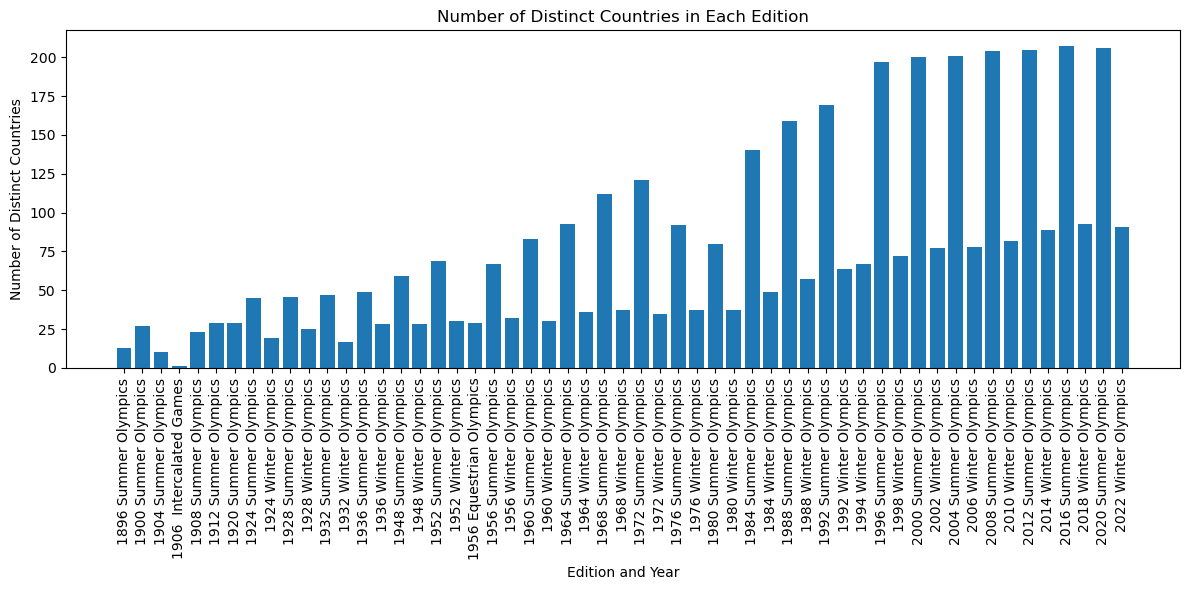

In [22]:
df = df_athlete_event_results.groupby(['edition'])['country_noc'].nunique().reset_index(name="No_of_countries")
# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(df.index, df['No_of_countries'])
plt.xlabel('Edition and Year')
plt.ylabel('Number of Distinct Countries')
plt.title('Number of Distinct Countries in Each Edition')
plt.xticks(df.index, df['edition'].astype(str), rotation=90)
plt.tight_layout()
plt.show()

## Total number of countries who won medals in each olympic year

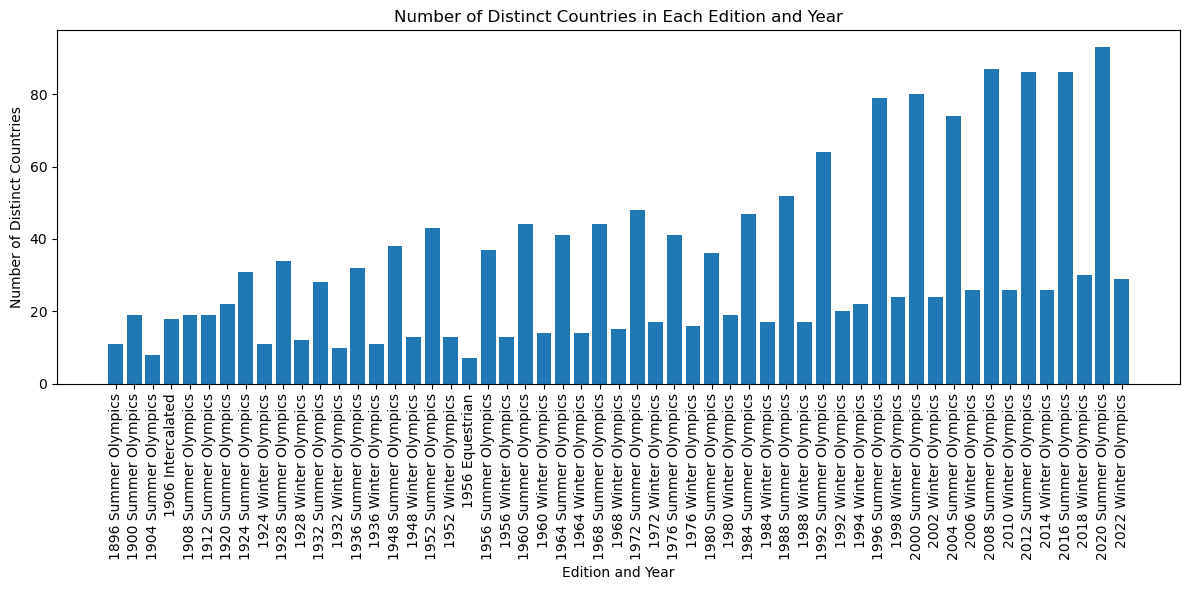

In [23]:
df = df_games_medal_tally.groupby(['edition'])['country_noc'].nunique().reset_index(name="No_of_countries")
# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(df.index, df['No_of_countries'])
plt.xlabel('Edition and Year')
plt.ylabel('Number of Distinct Countries')
plt.title('Number of Distinct Countries in Each Edition and Year')
plt.xticks(df.index, df['edition'].astype(str).astype(str), rotation=90)
plt.tight_layout()
plt.show()

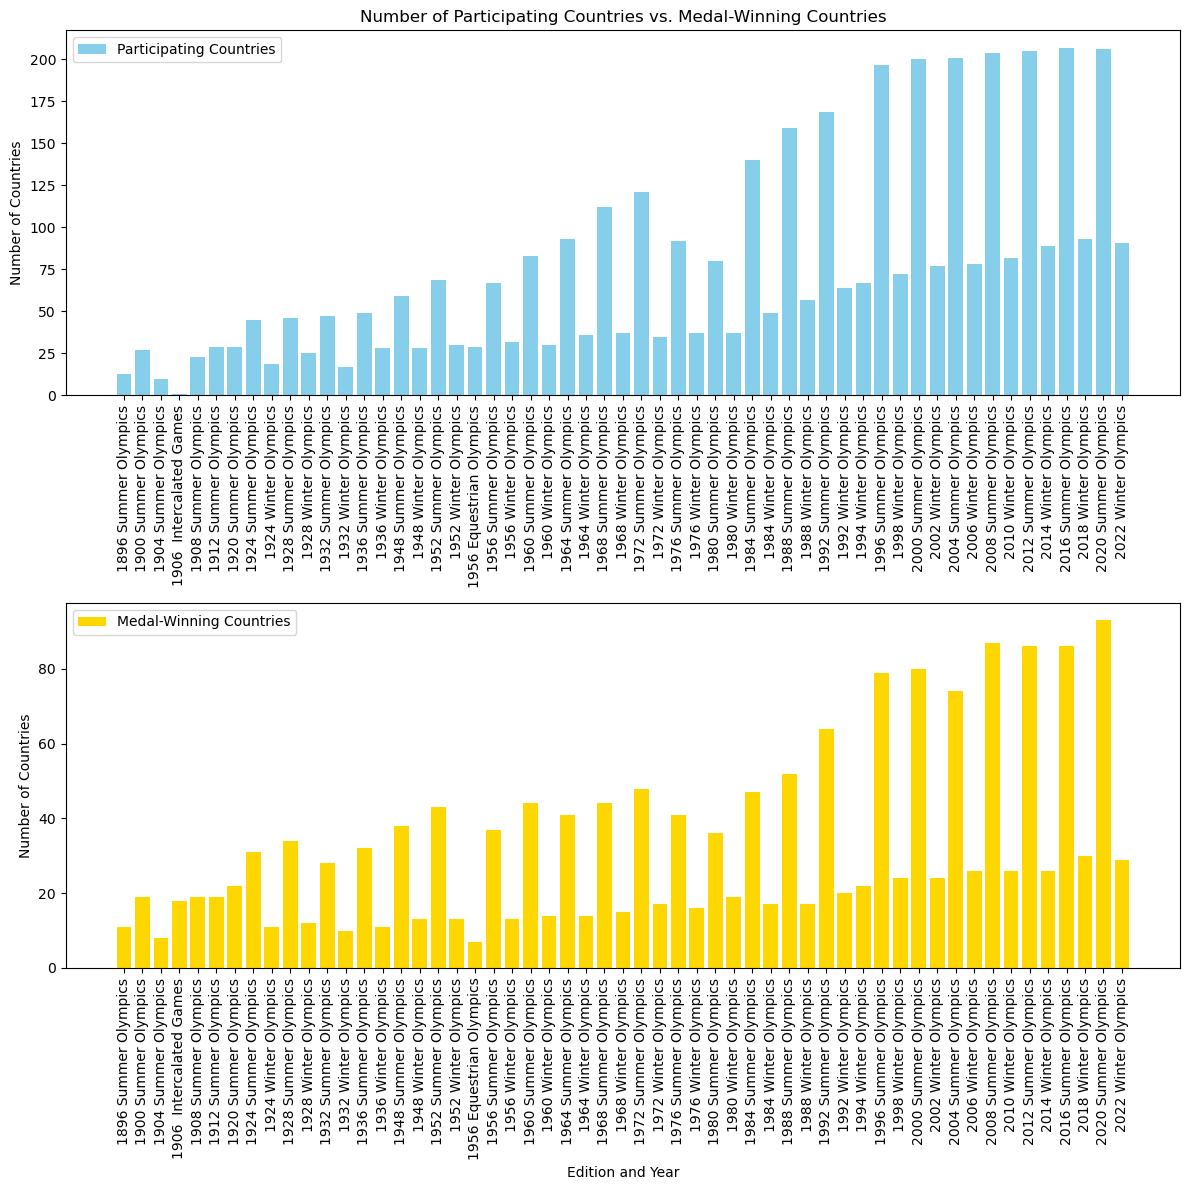

In [24]:
df_countries_participating = df_athlete_event_results.groupby(['edition'])['country_noc'].nunique().reset_index(name="No_of_countries")
df_countries_won_medals = df_games_medal_tally.groupby(['edition'])['country_noc'].nunique().reset_index(name="No_of_countries")

# Create subplots for both plots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 12))

# Plot the total number of countries participating
axes[0].bar(df_countries_participating.index, df_countries_participating['No_of_countries'], color='skyblue', label='Participating Countries')
axes[0].set_ylabel('Number of Countries')
axes[0].set_title('Number of Participating Countries vs. Medal-Winning Countries')
axes[0].legend()

# Plot the total number of countries that won medals
axes[1].bar(df_countries_won_medals.index, df_countries_won_medals['No_of_countries'], color='gold', label='Medal-Winning Countries')
axes[1].set_xlabel('Edition and Year')
axes[1].set_ylabel('Number of Countries')
axes[1].legend()

# Set x-axis labels for both subplots
for ax in axes:
    ax.set_xticks(df_countries_participating.index)
    ax.set_xticklabels(df_countries_participating['edition'].astype(str), rotation=90)

plt.tight_layout()
plt.show()

## Comparision: Participating Vs Medal-winning countries

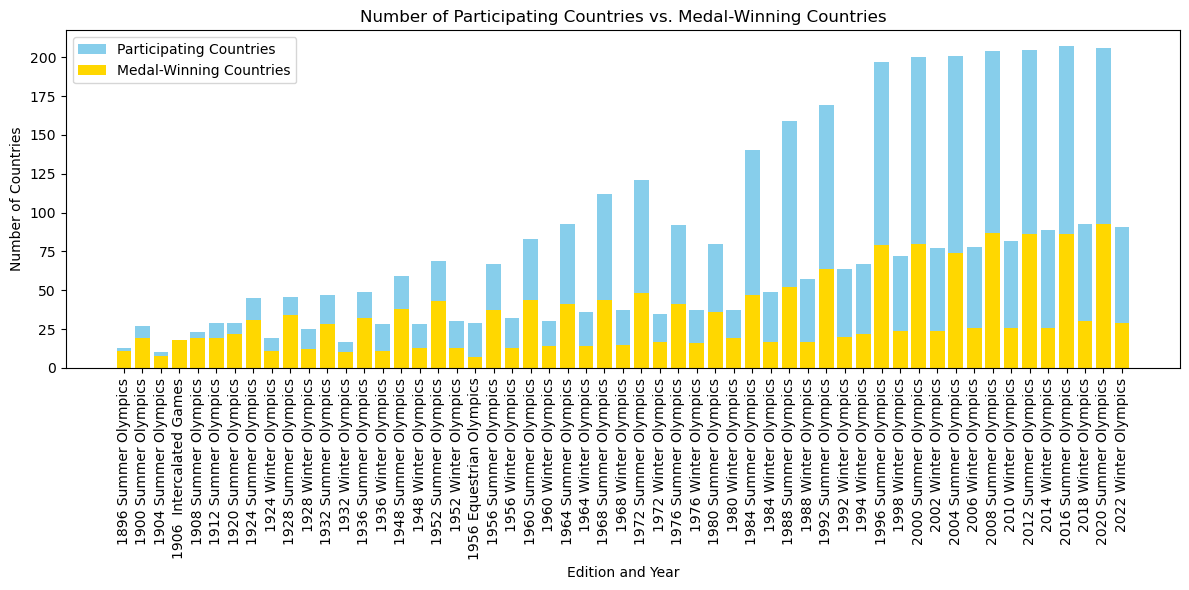

In [25]:
# Create a single subplot for both plots
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the total number of countries participating
ax.bar(df_countries_participating.index, df_countries_participating['No_of_countries'], color='skyblue', label='Participating Countries')

# Plot the total number of countries that won medals
ax.bar(df_countries_won_medals.index, df_countries_won_medals['No_of_countries'], color='gold', label='Medal-Winning Countries')

ax.set_xlabel('Edition and Year')
ax.set_ylabel('Number of Countries')
ax.set_title('Number of Participating Countries vs. Medal-Winning Countries')
ax.legend(['Participating Countries', 'Medal-Winning Countries'])

# Set x-axis labels
ax.set_xticks(df_countries_participating.index)
ax.set_xticklabels(df_countries_participating['edition'].astype(str), rotation=90)

plt.tight_layout()
plt.show()

## Total number of athletes in each olympic edition

In [26]:
df_athlete_event_results['season'] = df_athlete_event_results['edition'].apply(extract_season)
df_athlete_event_results.head()

edition  edition_id country_noc      sport            event  \
0  1908 Summer Olympics           5         ANZ  Athletics  100 metres, Men   
1  1908 Summer Olympics           5         ANZ  Athletics  400 metres, Men   
2  1908 Summer Olympics           5         ANZ  Athletics  800 metres, Men   
3  1908 Summer Olympics           5         ANZ  Athletics  800 metres, Men   
4  1908 Summer Olympics           5         ANZ  Athletics  800 metres, Men   

   result_id          athlete  athlete_id        pos medal  isTeamSport  \
0      56265  Ernest Hutcheon       64710        DNS    na        False   
1      56313     Henry Murray       64756        DNS    na        False   
2      56338    Harvey Sutton       64808  3 h8 r1/2    na        False   
3      56338      Guy Haskins      922519        DNS    na        False   
4      56338     Joseph Lynch       64735        DNS    na        False   

   season  
0  Summer  
1  Summer  
2  Summer  
3  Summer  
4  Summer

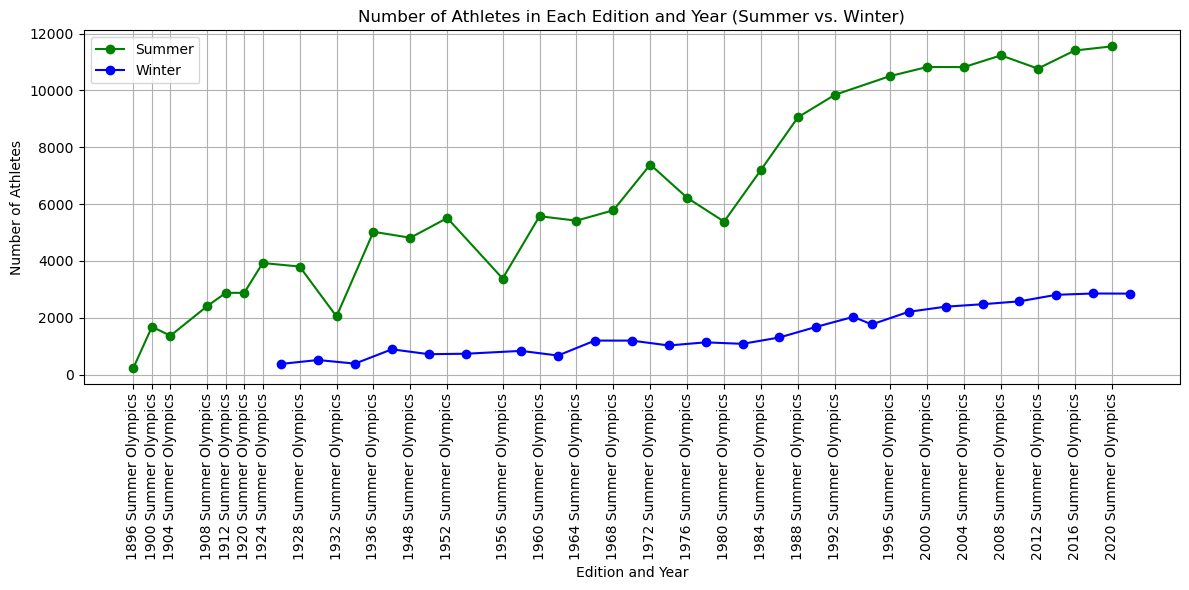

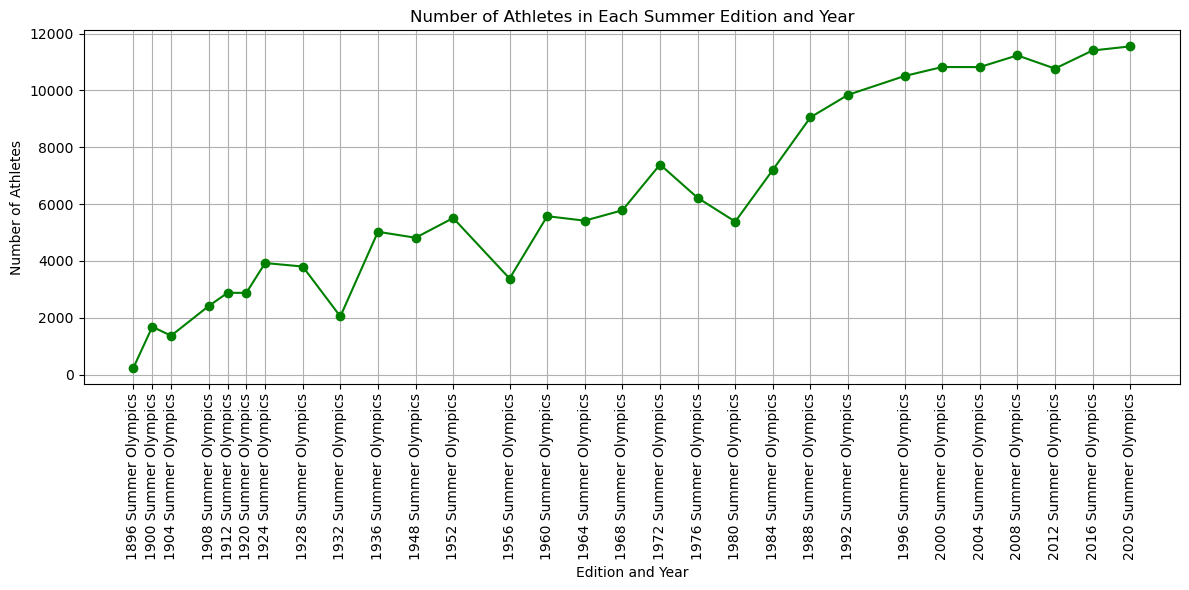

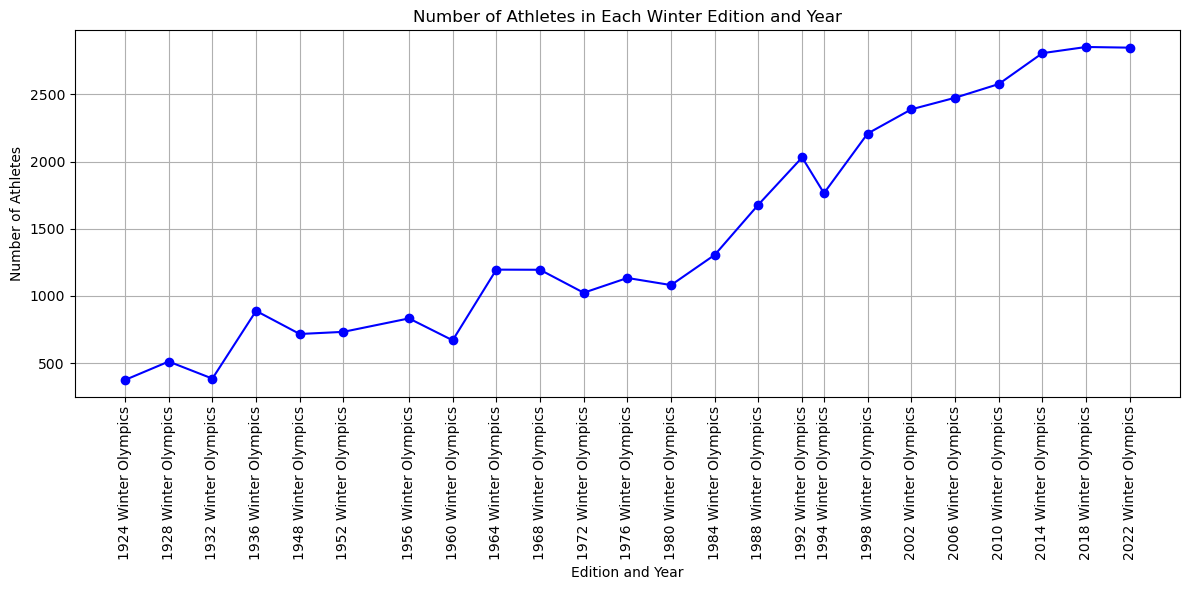

In [27]:
df_num_of_athletes = df_athlete_event_results.groupby(['edition','season'])['athlete_id'].nunique().reset_index(name="No_of_athletes")

# Filter the data for Summer and Winter seasons
df_num_of_athletes_summer = df_num_of_athletes[df_num_of_athletes['season'] == 'Summer']
df_num_of_athletes_winter = df_num_of_athletes[df_num_of_athletes['season'] == 'Winter']


# Create a line chart for the number of athletes, distinguishing Summer and Winter with different colors
plt.figure(figsize=(12, 6))
plt.plot(df_num_of_athletes_summer.index, df_num_of_athletes_summer['No_of_athletes'], marker='o', color='green', label='Summer')
plt.plot(df_num_of_athletes_winter.index, df_num_of_athletes_winter['No_of_athletes'], marker='o', color='blue', label='Winter')
plt.xlabel('Edition and Year')
plt.ylabel('Number of Athletes')
plt.title('Number of Athletes in Each Edition and Year (Summer vs. Winter)')
plt.xticks(df_num_of_athletes_summer.index, df_num_of_athletes_summer['edition'].astype(str), rotation=90)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# Create a line chart for the number of athletes in Summer
plt.figure(figsize=(12, 6))
plt.plot(df_num_of_athletes_summer.index, df_num_of_athletes_summer['No_of_athletes'], marker='o', color='green')
plt.xlabel('Edition and Year')
plt.ylabel('Number of Athletes')
plt.title('Number of Athletes in Each Summer Edition and Year')
plt.xticks(df_num_of_athletes_summer.index, df_num_of_athletes_summer['edition'].astype(str), rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

# Create a line chart for the number of athletes in Winter
plt.figure(figsize=(12, 6))
plt.plot(df_num_of_athletes_winter.index, df_num_of_athletes_winter['No_of_athletes'], marker='o', color='blue')
plt.xlabel('Edition and Year')
plt.ylabel('Number of Athletes')
plt.title('Number of Athletes in Each Winter Edition and Year')
plt.xticks(df_num_of_athletes_winter.index, df_num_of_athletes_winter['edition'].astype(str), rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()


# Create a line chart for the number of athletes
# plt.figure(figsize=(12, 6))
# plt.plot(df_num_of_athletes.index, df_num_of_athletes['No_of_athletes'], marker='o', color='green')
# plt.xlabel('Edition and Year')
# plt.ylabel('Number of Athletes')
# plt.title('Number of Athletes in Each Edition and Year')
# plt.xticks(df_num_of_athletes.index, df_num_of_athletes['edition'].astype(str) + ' - ' + df_num_of_athletes['year'].astype(str), rotation=90)
# plt.grid(True)
# plt.tight_layout()
# plt.show()


## Top 10 countries with highest number of participating athletes

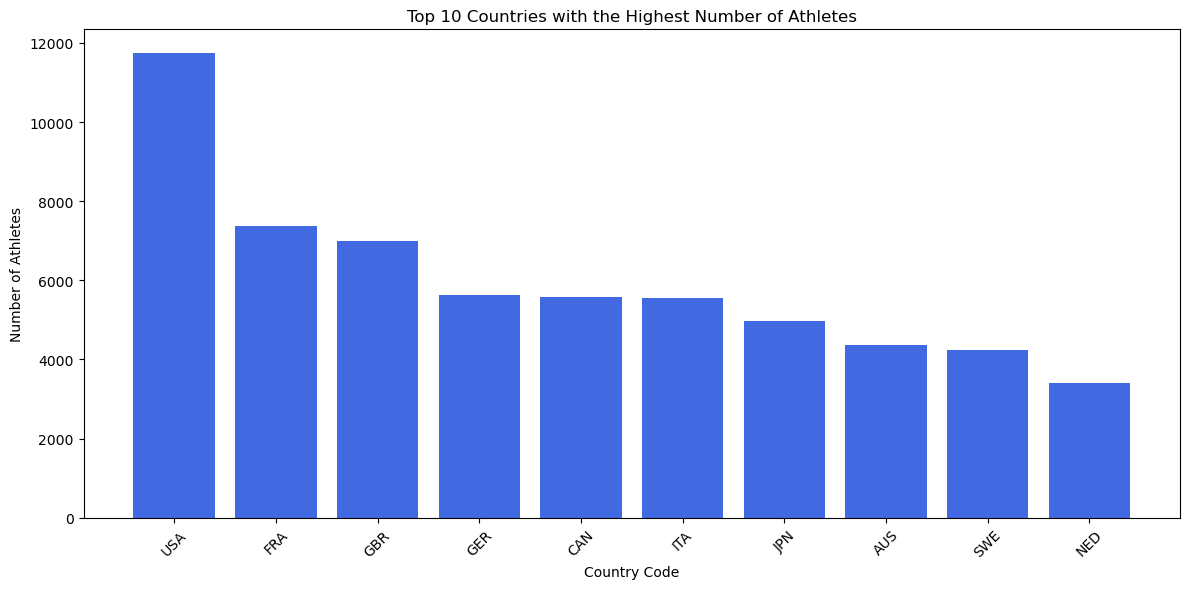

In [28]:
# Group by "country_noc" and count the number of unique athletes
top_countries_athletes = df_athlete_event_results.groupby('country_noc')['athlete_id'].nunique().reset_index()

# Sort the resulting DataFrame in descending order
top_countries_athletes = top_countries_athletes.sort_values(by='athlete_id', ascending=False)

# Get the top 10 countries
top_10_countries_athletes = top_countries_athletes.head(10)

# Plot the top 10 countries
plt.figure(figsize=(12, 6))
plt.bar(top_10_countries_athletes['country_noc'], top_10_countries_athletes['athlete_id'], color='royalblue')
plt.xlabel('Country Code')
plt.ylabel('Number of Athletes')
plt.title('Top 10 Countries with the Highest Number of Athletes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Total number of athletes by gender and season for each olympic year

In [29]:
filtered_agg_athlete_event_results_df = agg_athlete_event_results_df.filter(items=['year', 'country_noc', 'sex', 'season'])
athlete_to_year_df = filtered_agg_athlete_event_results_df.groupby(['year','sex', 'season'])['year'].count().reset_index(name="player_count")
athlete_to_year_df

year     sex  season  player_count
0    1896.0  Female  Summer             2
1    1896.0    Male  Summer           617
2    1900.0  Female  Summer            53
3    1900.0    Male  Summer          3094
4    1904.0  Female  Summer            17
..      ...     ...     ...           ...
104  2018.0    Male  Winter          3036
105  2020.0  Female  Summer          7126
106  2020.0    Male  Summer          7556
107  2022.0  Female  Winter          2430
108  2022.0    Male  Winter          2958

[109 rows x 4 columns]

## Athlete count by year and gender for Summer olympics

<AxesSubplot:xlabel='year', ylabel='player_count'>

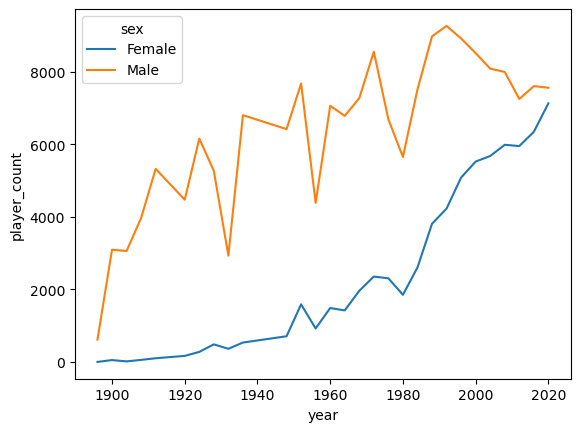

In [30]:
summer_athlete_to_year_df = athlete_to_year_df[athlete_to_year_df['season'] == 'Summer']
sns.lineplot(data=summer_athlete_to_year_df, x='year', y='player_count', hue='sex')

## Athlete count by year and gender for Winter olympics

<AxesSubplot:xlabel='year', ylabel='player_count'>

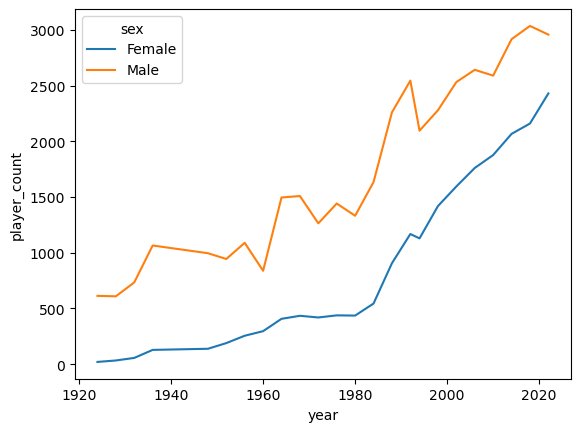

In [31]:
winter_athlete_to_year_df = athlete_to_year_df[athlete_to_year_df['season'] == 'Winter']
sns.lineplot(data=winter_athlete_to_year_df, x='year', y='player_count', hue='sex')

## Country with Maximum Total Medals Each Year

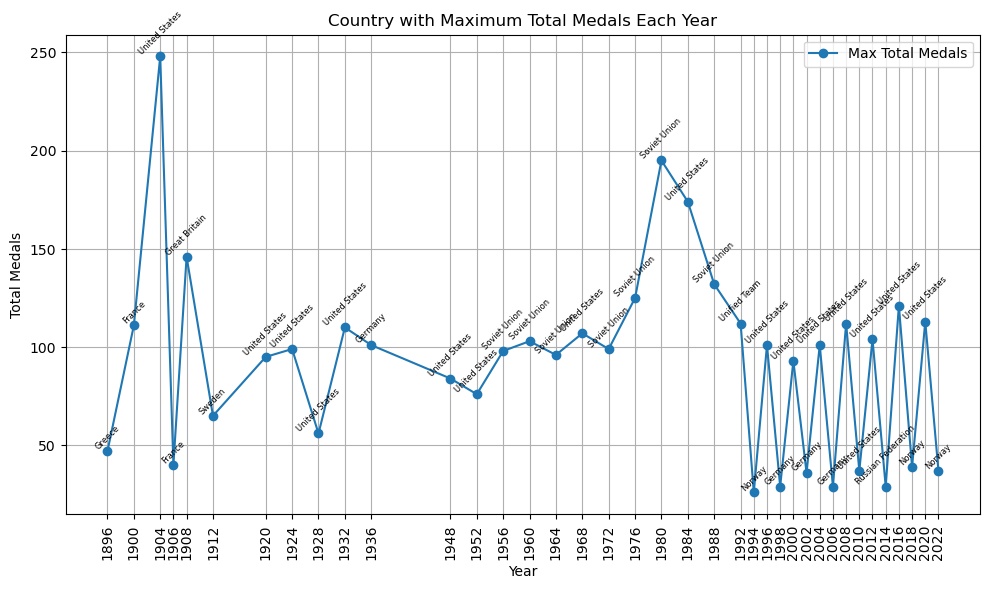

In [32]:
# Group the data by year and find the country with the maximum total medals each year
data = df_games_medal_tally
max_total_country_per_year = data.groupby('year').apply(lambda x: x.loc[x['total'].idxmax()])

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(max_total_country_per_year['year'], max_total_country_per_year['total'], marker='o', label='Max Total Medals')
for index, row in max_total_country_per_year.iterrows():
    plt.text(row['year'], row['total'], row['country'], ha='center', va='bottom', fontsize=6, rotation=45)
plt.title('Country with Maximum Total Medals Each Year')
plt.xlabel('Year')
plt.ylabel('Total Medals')
plt.legend()
plt.grid(True)
plt.xticks(max_total_country_per_year['year'], rotation=90)
plt.tight_layout()
plt.show()

## Distribution of medals (gold, silver, bronze, and total) won in the Olympics

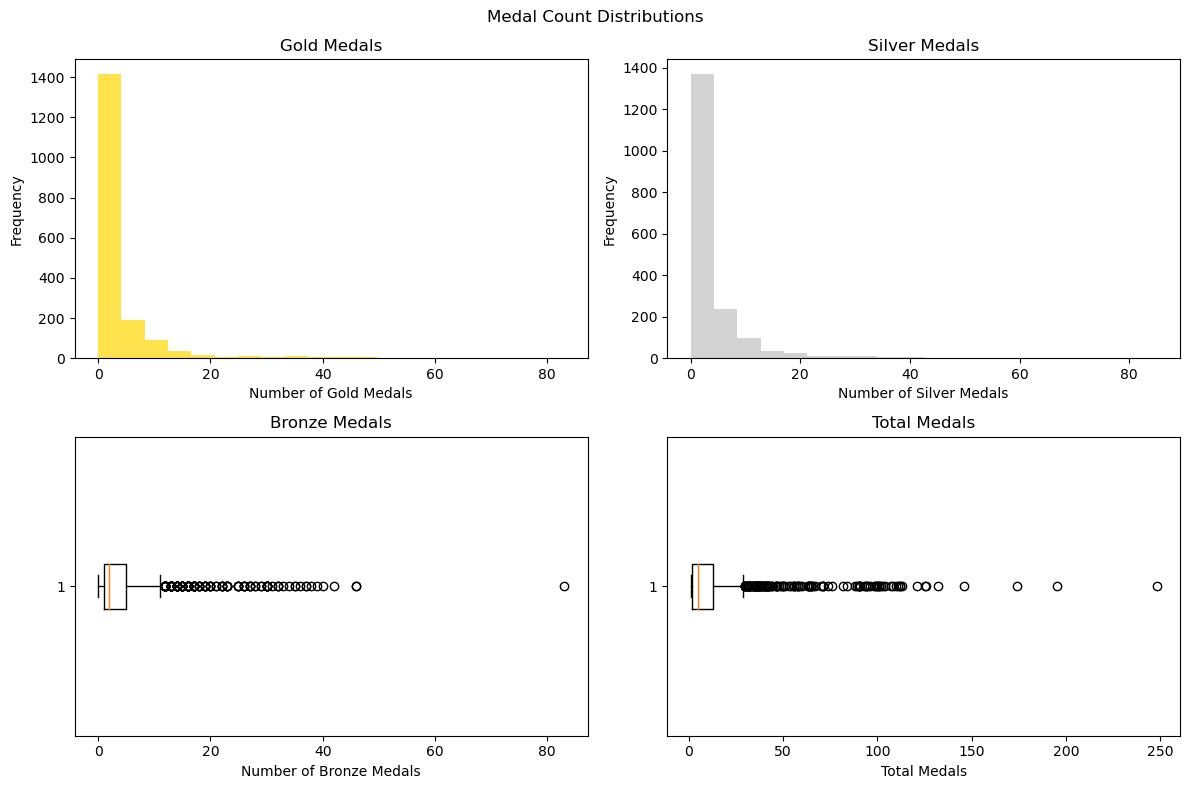

In [33]:
# Create subplots for histograms and box plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.suptitle('Medal Count Distributions')

# Histogram for Gold Medals
axes[0, 0].hist(data['gold'], bins=20, color='gold', alpha=0.7)
axes[0, 0].set_title('Gold Medals')
axes[0, 0].set_xlabel('Number of Gold Medals')
axes[0, 0].set_ylabel('Frequency')

# Histogram for Silver Medals
axes[0, 1].hist(data['silver'], bins=20, color='silver', alpha=0.7)
axes[0, 1].set_title('Silver Medals')
axes[0, 1].set_xlabel('Number of Silver Medals')
axes[0, 1].set_ylabel('Frequency')

# Box plot for Bronze Medals
axes[1, 0].boxplot(data['bronze'], vert=False)
axes[1, 0].set_title('Bronze Medals')
axes[1, 0].set_xlabel('Number of Bronze Medals')

# Box plot for Total Medals
axes[1, 1].boxplot(data['total'], vert=False)
axes[1, 1].set_title('Total Medals')
axes[1, 1].set_xlabel('Total Medals')

plt.tight_layout()
plt.show()

## Total medals distribution for Top 20 countries

<Figure size 1200x600 with 0 Axes>

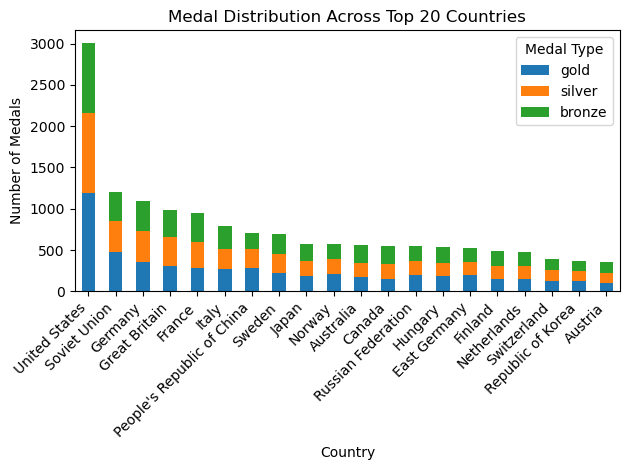

In [34]:
# Group the data by country and sum up the medals
medal_counts = data.groupby('country')[['gold', 'silver', 'bronze', 'total']].sum()

# Sort the countries by total medals and select the top 20
top_countries = medal_counts.nlargest(20, 'total')

# Create a stacked bar plot
plt.figure(figsize=(12, 6))
ax = top_countries[['gold', 'silver', 'bronze']].plot(kind='bar', stacked=True)
plt.title('Medal Distribution Across Top 20 Countries')
plt.xlabel('Country')
plt.ylabel('Number of Medals')
plt.legend(title='Medal Type')
plt.xticks(rotation=45, ha='right')  # Rotate and align labels for better readability
plt.tight_layout()

# Adjust x-axis tick labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.show()

## Print these Top 20 countries and total medals won

In [35]:
nations = data.groupby(['country_noc','country'])[['gold', 'silver', 'bronze', 'total']].sum()
nations = nations.sort_values(by='total', ascending=False).reset_index()
top20 = nations.head(20)
top20

country_noc                     country  gold  silver  bronze  total
0          USA               United States  1194     970     845   3009
1          URS                Soviet Union   473     376     355   1204
2          GER                     Germany   355     377     366   1098
3          GBR               Great Britain   312     340     337    989
4          FRA                      France   287     307     356    950
5          ITA                       Italy   271     244     274    789
6          CHN  People's Republic of China   284     231     196    711
7          SWE                      Sweden   216     233     248    697
8          JPN                       Japan   186     178     211    575
9          NOR                      Norway   208     188     173    569
10         AUS                   Australia   168     177     218    563
11         CAN                      Canada   148     183     222    553
12         RUS          Russian Federation   194     169     188    551
13         HUN                     Hungary   186     163     186    535
14         GDR                East Germany   192     165     162    519
15         FIN                     Finland   151     152     186    489
16         NED                 Netherlands   151     156     172    479
17         SUI                 Switzerland   123     134     132    389
18         KOR           Republic of Korea   129     121     116    366
19         AUT                     Austria    96     128     137    361

## Print the summer/winter editions for all games

In [36]:
df_games_medal_tally['edition'].unique()

array(['1896 Summer Olympics', '1900 Summer Olympics',
       '1904 Summer Olympics', '1908 Summer Olympics',
       '1912 Summer Olympics', '1920 Summer Olympics',
       '1924 Summer Olympics', '1928 Summer Olympics',
       '1932 Summer Olympics', '1936 Summer Olympics',
       '1948 Summer Olympics', '1952 Summer Olympics',
       '1956 Summer Olympics', '1960 Summer Olympics',
       '1964 Summer Olympics', '1968 Summer Olympics',
       '1972 Summer Olympics', '1976 Summer Olympics',
       '1980 Summer Olympics', '1984 Summer Olympics',
       '1988 Summer Olympics', '1992 Summer Olympics',
       '1996 Summer Olympics', '2000 Summer Olympics',
       '2004 Summer Olympics', '2008 Summer Olympics',
       '2012 Summer Olympics', '2016 Summer Olympics',
       '2020 Summer Olympics', '1924 Winter Olympics',
       '1928 Winter Olympics', '1932 Winter Olympics',
       '1936 Winter Olympics', '1948 Winter Olympics',
       '1952 Winter Olympics', '1956 Winter Olympics',
       '19

## Find the top 3 sports for each country and total number of medals won

In [37]:
#Step 1: Apply 1 if medal won is gold,bronze or silver else 0
df = df_athlete_event_results
df['medal_count'] = df['medal'].apply(lambda x: 1 if x in ['Gold', 'Silver', 'Bronze'] else 0)

# Step 2: Group by country and sport, and sum the medal counts
grouped = df.groupby(['country_noc', 'sport'])['medal_count'].sum().reset_index()

# Step 3: Filter for countries where medal count is > 0
filtered_grouped = grouped[grouped['medal_count'] > 0]

# Step 4: Ensure the data types are consistent
filtered_grouped['medal_count'] = filtered_grouped['medal_count'].astype(int)

# Step 5: Find the top 3 sports for each country where medal count is greater than 0
top_sports_per_country = filtered_grouped.groupby('country_noc').apply(lambda x: x.nlargest(3, 'medal_count')).reset_index(drop=True)

# Display the top 3 sports for each country where medal count is > 0
top_sports_per_country

/var/folders/c4/xtbqs4rn3jg2c0ccfbf2bm980000gn/T/ipykernel_10342/3012367573.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_grouped['medal_count'] = filtered_grouped['medal_count'].astype(int)


country_noc       sport  medal_count
0           AFG   Taekwondo            2
1           AHO     Sailing            1
2           ALG   Athletics            9
3           ALG      Boxing            6
4           ALG        Judo            2
..          ...         ...          ...
355         YUG  Water Polo           76
356         ZAM   Athletics            1
357         ZAM      Boxing            1
358         ZIM      Hockey           16
359         ZIM    Swimming            7

[360 rows x 3 columns]

## Filter top sports per country for top20 countries

In [38]:
# Filter top_sports_per_country based on the top 20 countries
filtered_top_sports = top_sports_per_country[top_sports_per_country['country_noc'].isin(top20['country_noc'])]

# Display the filtered DataFrame
filtered_top_sports.head()

country_noc          sport  medal_count
14         AUS       Swimming          454
15         AUS         Hockey          214
16         AUS         Rowing          160
17         AUT  Alpine Skiing          138
18         AUT    Ski Jumping           48

## Visualise top sports per country for top20 countries

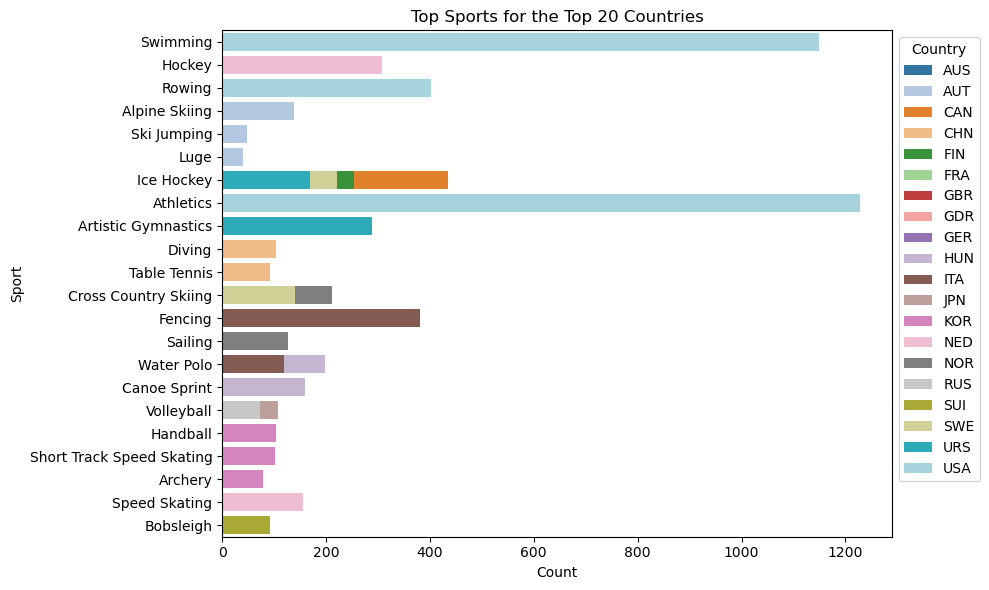

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a horizontal bar plot to visualize the top sports for the top 20 countries
plt.figure(figsize=(10, 6))
sns.barplot(data=filtered_top_sports, x='medal_count', y='sport', hue='country_noc', dodge=False, palette='tab20')
plt.title('Top Sports for the Top 20 Countries')
plt.xlabel('Count')
plt.ylabel('Sport')
plt.legend(title='Country', bbox_to_anchor=(1, 1), loc='upper left')

# Adjust the layout to fit the legend
plt.tight_layout()

# Show the plot
plt.show()


## Total medals won in Summer and winter edition olympics by all countries

<AxesSubplot:xlabel='year', ylabel='medal_count'>

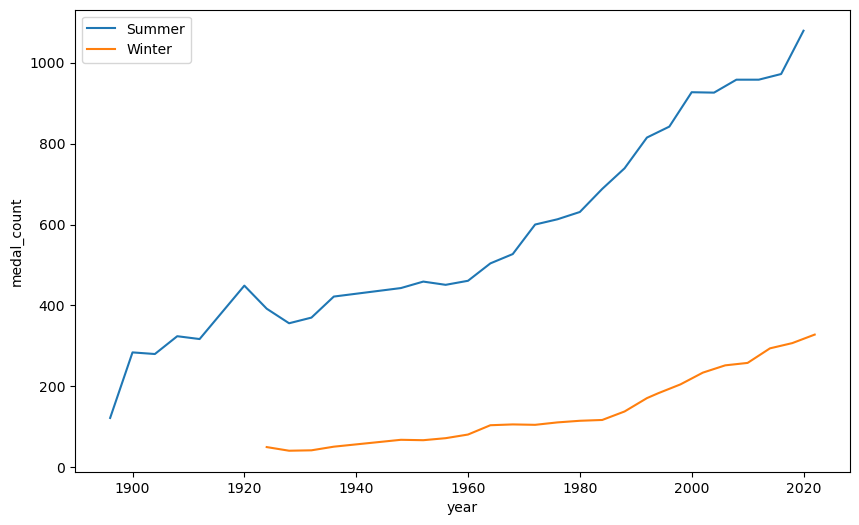

In [40]:
agg_olympic_games_medal_talley_df = df_games_medal_tally.groupby(['edition', 'year'])['total'].sum().reset_index(name="medal_count")
agg_olympic_games_medal_talley_df['season'] = ""
agg_olympic_games_medal_talley_df.loc[agg_olympic_games_medal_talley_df['edition'].str.contains("Summer"), 'season'] = "Summer"
agg_olympic_games_medal_talley_df.loc[agg_olympic_games_medal_talley_df['edition'].str.contains("Winter"), 'season'] = "Winter"

# Set the width and height of the figure
plt.figure(figsize=(10, 6))

# Line chart showing the total medals for Summer sports
sns.lineplot(data=agg_olympic_games_medal_talley_df[agg_olympic_games_medal_talley_df['season'] == 'Summer'], x='year', y='medal_count', label='Summer')

# Line chart showing the total medals for Winter sports
sns.lineplot(data=agg_olympic_games_medal_talley_df[agg_olympic_games_medal_talley_df['season'] == 'Winter'], x='year', y='medal_count', label='Winter')


## Top performing countries in last 2 Olympic editions

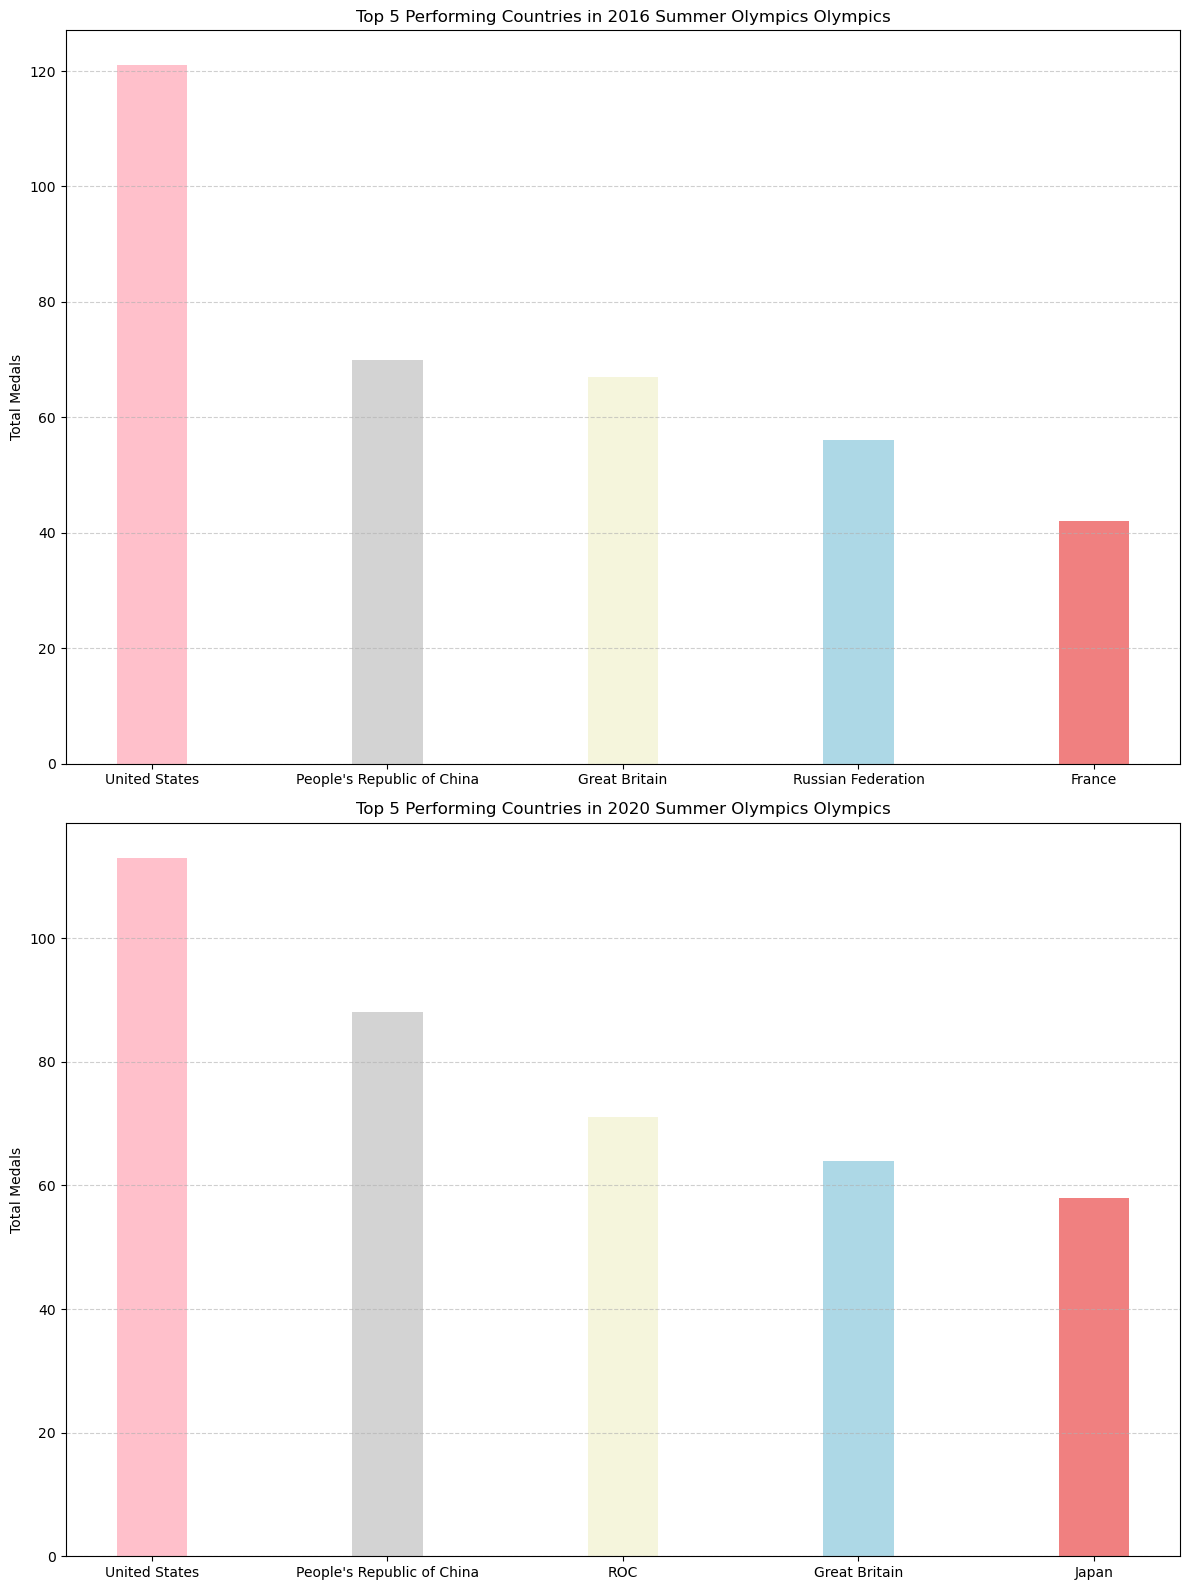

In [41]:
selected_years = [2016, 2020]
filtered_df = df_games_medal_tally[df_games_medal_tally['year'].isin(selected_years)]

top_performing_countries_by_edition = []

# Loop through each edition in the selected years
for edition, data in filtered_df.groupby('edition'):
    # Group data by country and calculate total medals
    country_totals = data.groupby('country')['total'].sum().sort_values(ascending=False)
    # Select the top 5 performing countries for this edition
    top_5_countries = country_totals.head(5)
    # Append the results for this edition to the list
    top_performing_countries_by_edition.append((edition, top_5_countries))

# Create subplots for each edition with some spacing
fig, axes = plt.subplots(nrows=len(top_performing_countries_by_edition), ncols=1, figsize=(12, 8 * len(top_performing_countries_by_edition)))

# Loop through the editions and create bar charts
colors = ['pink', 'lightgrey', 'beige', 'lightblue', 'lightcoral']
bar_width = 0.3  # Adjust the bar width here
for i, (edition, top_5_countries) in enumerate(top_performing_countries_by_edition):
    ax = axes[i]
    bars = ax.bar(top_5_countries.index, top_5_countries.values, color=colors, width=bar_width)
    ax.set_ylabel('Total Medals')
    ax.set_title(f'Top 5 Performing Countries in {edition} Olympics')
    
    # Set tick positions and labels explicitly
    ax.set_xticks(range(len(top_5_countries)))
    ax.set_xticklabels(top_5_countries.index, rotation=0)
    
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    
plt.tight_layout()
plt.show()

## Number of sports types over the years

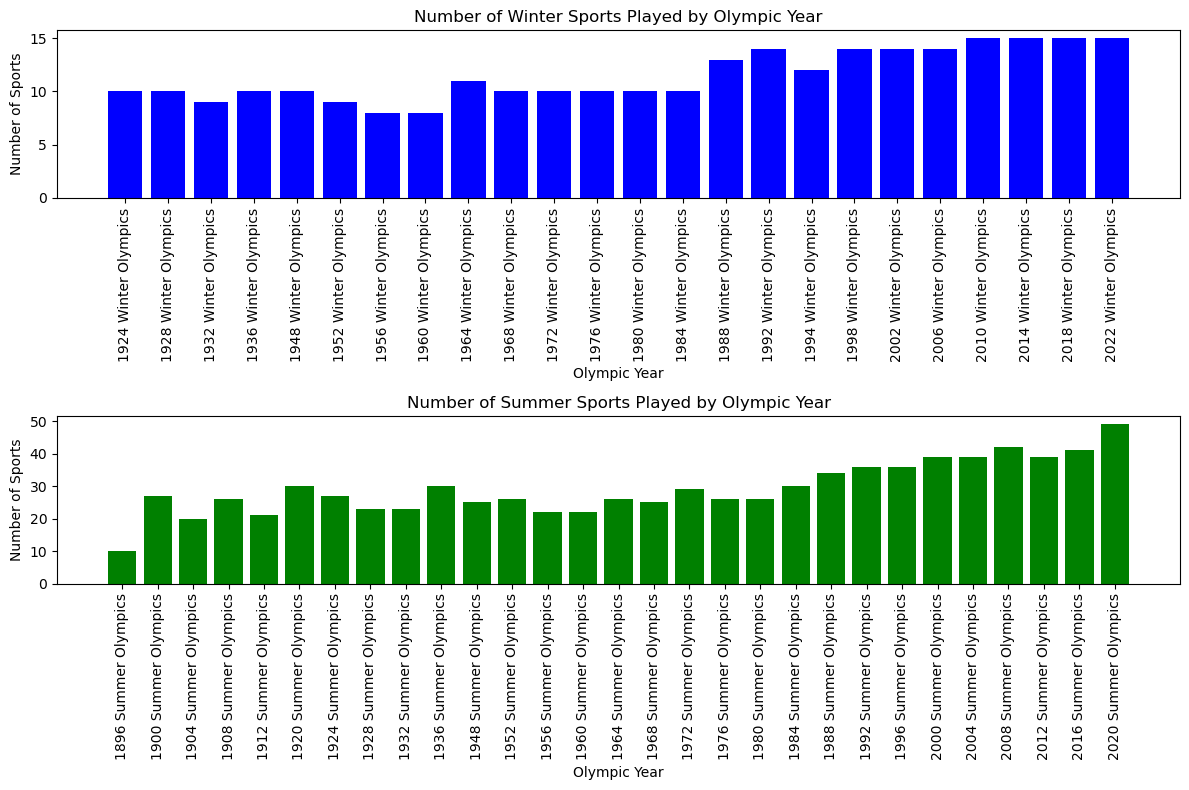

In [42]:
# Assuming your DataFrame is named agg_athlete_event_results_df
df = agg_athlete_event_results_df

# Filter the DataFrame for 'winter' season
winter_sports = df[df['season'] == 'Winter']

# Group the filtered DataFrame by 'edition' (Olympic year) and count the unique sports
winter_sports_per_year = winter_sports.groupby('edition')['sport'].nunique().reset_index()

# Filter the DataFrame for 'summer' season
summer_sports = df[df['season'] == 'Summer']

# Group the filtered DataFrame by 'edition' (Olympic year) and count the unique sports
summer_sports_per_year = summer_sports.groupby('edition')['sport'].nunique().reset_index()

# Create subplots for winter and summer sports
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Plot the data for winter sports
ax1.bar(winter_sports_per_year['edition'], winter_sports_per_year['sport'], color='blue')
ax1.set_title('Number of Winter Sports Played by Olympic Year')
ax1.set_xlabel('Olympic Year')
ax1.set_ylabel('Number of Sports')

# Rotate x-axis labels by 45 degrees for better readability
ax1.tick_params(axis='x', rotation=90)

# Plot the data for summer sports
ax2.bar(summer_sports_per_year['edition'], summer_sports_per_year['sport'], color='green')
ax2.set_title('Number of Summer Sports Played by Olympic Year')
ax2.set_xlabel('Olympic Year')
ax2.set_ylabel('Number of Sports')

# Rotate x-axis labels by 45 degrees for better readability
ax2.tick_params(axis='x', rotation=90)

# Adjust layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()

## Print the number of sports for each olympic edition

In [43]:
# Concatenate the two DataFrames into a single DataFrame
results_df = pd.concat([winter_sports_per_year, summer_sports_per_year], axis=1)
results_df.columns = ['Winter Year', 'Winter Sports', 'Summer Year', 'Summer Sports']

# Display the results DataFrame
results_df

Winter Year  Winter Sports           Summer Year  Summer Sports
0   1924 Winter Olympics           10.0  1896 Summer Olympics             10
1   1928 Winter Olympics           10.0  1900 Summer Olympics             27
2   1932 Winter Olympics            9.0  1904 Summer Olympics             20
3   1936 Winter Olympics           10.0  1908 Summer Olympics             26
4   1948 Winter Olympics           10.0  1912 Summer Olympics             21
5   1952 Winter Olympics            9.0  1920 Summer Olympics             30
6   1956 Winter Olympics            8.0  1924 Summer Olympics             27
7   1960 Winter Olympics            8.0  1928 Summer Olympics             23
8   1964 Winter Olympics           11.0  1932 Summer Olympics             23
9   1968 Winter Olympics           10.0  1936 Summer Olympics             30
10  1972 Winter Olympics           10.0  1948 Summer Olympics             25
11  1976 Winter Olympics           10.0  1952 Summer Olympics             26
12  1980 Winter Olympics           10.0  1956 Summer Olympics             22
13  1984 Winter Olympics           10.0  1960 Summer Olympics             22
14  1988 Winter Olympics           13.0  1964 Summer Olympics             26
15  1992 Winter Olympics           14.0  1968 Summer Olympics             25
16  1994 Winter Olympics           12.0  1972 Summer Olympics             29
17  1998 Winter Olympics           14.0  1976 Summer Olympics             26
18  2002 Winter Olympics           14.0  1980 Summer Olympics             26
19  2006 Winter Olympics           14.0  1984 Summer Olympics             30
20  2010 Winter Olympics           15.0  1988 Summer Olympics             34
21  2014 Winter Olympics           15.0  1992 Summer Olympics             36
22  2018 Winter Olympics           15.0  1996 Summer Olympics             36
23  2022 Winter Olympics           15.0  2000 Summer Olympics             39
24                   NaN            NaN  2004 Summer Olympics             39
25                   NaN            NaN  2008 Summer Olympics             42
26                   NaN            NaN  2012 Summer Olympics             39
27                   NaN            NaN  2016 Summer Olympics             41
28                   NaN            NaN  2020 Summer Olympics             49

## visualise the number of sports played in each olympic edition

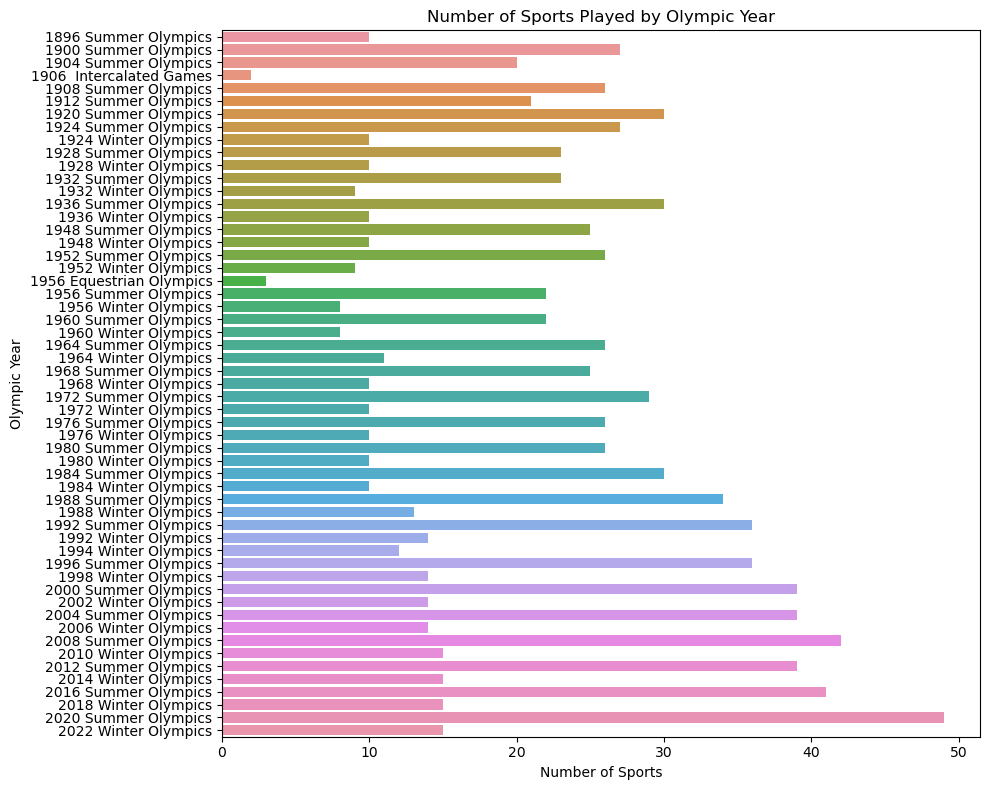

In [44]:
df = agg_athlete_event_results_df.groupby('edition')['sport'].nunique().reset_index()

# Create a horizontal bar plot to visualize the top sports for the top 20 countries
plt.figure(figsize=(10, 8))
sns.barplot(data=df, x='sport', y='edition')
plt.title('Number of Sports Played by Olympic Year')
plt.xlabel('Number of Sports')
plt.ylabel('Olympic Year')

# Adjust the layout to fit the legend
plt.tight_layout()

# Show the plot
plt.show()

## Drill down analysis of new sports introduced each year

In [45]:
# Assuming your DataFrame is named agg_athlete_event_results_df
df = agg_athlete_event_results_df

# Filter the DataFrame for 'summer' season
summer_sports = df[df['season'] == 'Summer']

# Group the filtered DataFrame by 'edition' (Olympic year) and get the set of unique sports for each edition
sports_per_year = summer_sports.groupby('edition')['sport'].unique().reset_index()

# Create a new DataFrame to store the changes in sports
sports_changes_df = pd.DataFrame(columns=['edition', 'new_sports'])

# Iterate through the editions to find new sports introduced
for i in range(1, len(sports_per_year)):
    current_sports = set(sports_per_year.iloc[i]['sport'])
    previous_sports = set(sports_per_year.iloc[i - 1]['sport'])
    new_sports = current_sports - previous_sports
    sports_changes_df = pd.concat([sports_changes_df, pd.DataFrame({'edition': [sports_per_year.iloc[i]['edition']], 'new_sports': [new_sports]})], ignore_index=True)

# Filter the DataFrame to get the last 3 editions
last_3_editions = sports_changes_df.iloc[-6:]

# Display the new sports introduced in the last 3 editions
for index, row in last_3_editions.iterrows():
    edition = row['edition']
    new_sports = row['new_sports']
    print(f"New sports introduced in {edition}: {', '.join(new_sports)}")

New sports introduced in 2000 Summer Olympics: Trampolining, Taekwondo, Triathlon
New sports introduced in 2004 Summer Olympics: 
New sports introduced in 2008 Summer Olympics: Cycling BMX Racing, Wushu, Marathon Swimming
New sports introduced in 2012 Summer Olympics: 
New sports introduced in 2016 Summer Olympics: Golf, Rugby Sevens
New sports introduced in 2020 Summer Olympics: 3x3 Basketball, Surfing, Softball, Skateboarding, Karate, Sport Climbing, Baseball, Cycling BMX Freestyle


## Athelets competence in sports

### Find the Top-Performing Athletes by Medal Count in Each Sport

In [46]:
df = df_athlete_data_merged

# Create a new column "medal_count" with 1 for gold, silver, and bronze, and 0 for others
df['medal_count'] = df['medal'].apply(lambda x: 1 if x in ['Gold', 'Silver', 'Bronze'] else 0)

# Group by "sport" and "athlete" and sum the "medal_count" to get the total medal count for each athlete in each sport
athlete_medal_counts = df.groupby(['sport', 'athlete'])['medal_count'].sum().reset_index()

# Sort the resulting DataFrame in descending order of total medal counts
athlete_medal_counts_sorted = athlete_medal_counts.sort_values(by='medal_count', ascending=False)

# Get the top-performing athlete for each sport
top_athletes = athlete_medal_counts_sorted.groupby('sport', as_index=False).first()

top_athletes_sorted = top_athletes.sort_values(by='medal_count', ascending=False)

# Display the top-performing athletes sorted by medal count
top_athletes_sorted[['sport', 'athlete', 'medal_count']]


sport              athlete  medal_count
94               Swimming       Michael Phelps           28
7     Artistic Gymnastics      Larisa Latynina           18
31   Cross Country Skiing        Marit Bjørgen           15
90          Speed Skating           Ireen Wüst           13
45                Fencing  Edoardo Mangiarotti           13
..                    ...                  ...          ...
81                 Savate               Lequet            0
61                  Kendo       Takaji Shimizu            0
62               Korfball         N. van Noort            0
75          Roller Hockey         Vítor Santos            0
107                 Wushu      Muslim Salikhov            0

[108 rows x 3 columns]

### Find the Top-Performing Athletes by Medal Count in each country

In [47]:
df = df_athlete_data_merged
# Create a new column "medal_count" with 1 for gold, silver, and bronze, and 0 for others
df['medal_count'] = df['medal'].apply(lambda x: 1 if x in ['Gold', 'Silver', 'Bronze'] else 0)

# Group by "country_noc", "sport", and "athlete" and sum the "medal_count" to get the total medal count for each athlete in each sport and country
athlete_medal_counts = df.groupby(['country_noc_x', 'athlete'])['medal_count'].sum().reset_index()

# Sort the resulting DataFrame in descending order of total medal counts
athlete_medal_counts_sorted = athlete_medal_counts.sort_values(by='medal_count', ascending=False)

# Get the top-performing athlete for every country in every sport
top_athletes_by_country = athlete_medal_counts_sorted.groupby(['country_noc_x'], as_index=False).first()

# Display the top-performing athletes by country and sport
top_athletes_by_country[['country_noc_x', 'athlete', 'medal_count']]


country_noc_x            athlete  medal_count
0             AFG    Rohullah Nikpai            2
1             AHO        Jan Boersma            1
2             ALB        Oltion Luli            0
3             ALG  Taoufik Makhloufi            3
4             AND    Claudina Rossel            0
..            ...                ...          ...
226           YEM     Hana Ali Saleh            0
227           YMD  Sahim Saleh Mehdi            0
228           YUG       Leon Štukelj            6
229           ZAM        Keith Mwila            1
230           ZIM    Kirsty Coventry            7

[231 rows x 3 columns]

### Top-Performing Athletes by Medal Count in each country for top20

In [48]:
filtered_top_athletes = top_athletes_by_country[top_athletes_by_country['country_noc_x'].isin(top20['country_noc'])]
filtered_top_athletes.sort_values(by='medal_count', ascending=False)

country_noc_x              athlete  medal_count
217           USA       Michael Phelps           28
215           URS      Larisa Latynina           18
151           NOR        Marit Bjørgen           15
106           JPN          Takashi Ono           13
147           NED           Ireen Wüst           13
102           ITA  Edoardo Mangiarotti           13
81            GER        Isabell Werth           12
70            FIN          Paavo Nurmi           12
172           RUS        Aleksey Nemov           12
12            AUS          Emma McKeon           11
92            HUN         Ágnes Keleti           10
76            GBR          Jason Kenny            9
194           SWE      Sixten Jernberg            9
78            GDR       Kornelia Ender            8
71            FRA     Philippe Cattiau            8
191           SUI         Georges Miez            8
13            AUT       Felix Gottwald            7
41            CHN             Yang Wei            7
36            CAN       Penny Oleksiak            7
111           KOR        Lee Seung-Hun            6

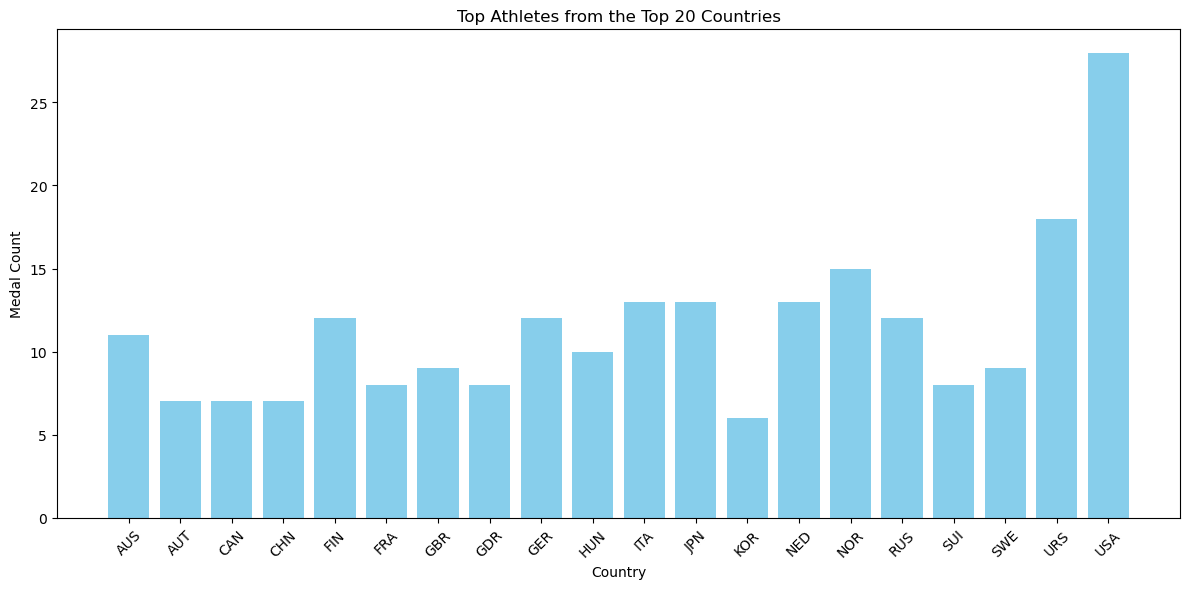

In [49]:
import matplotlib.pyplot as plt

# Create a bar chart to visualize the top athletes
plt.figure(figsize=(12, 6))
plt.bar(filtered_top_athletes['country_noc_x'], filtered_top_athletes['medal_count'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Medal Count')
plt.title('Top Athletes from the Top 20 Countries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


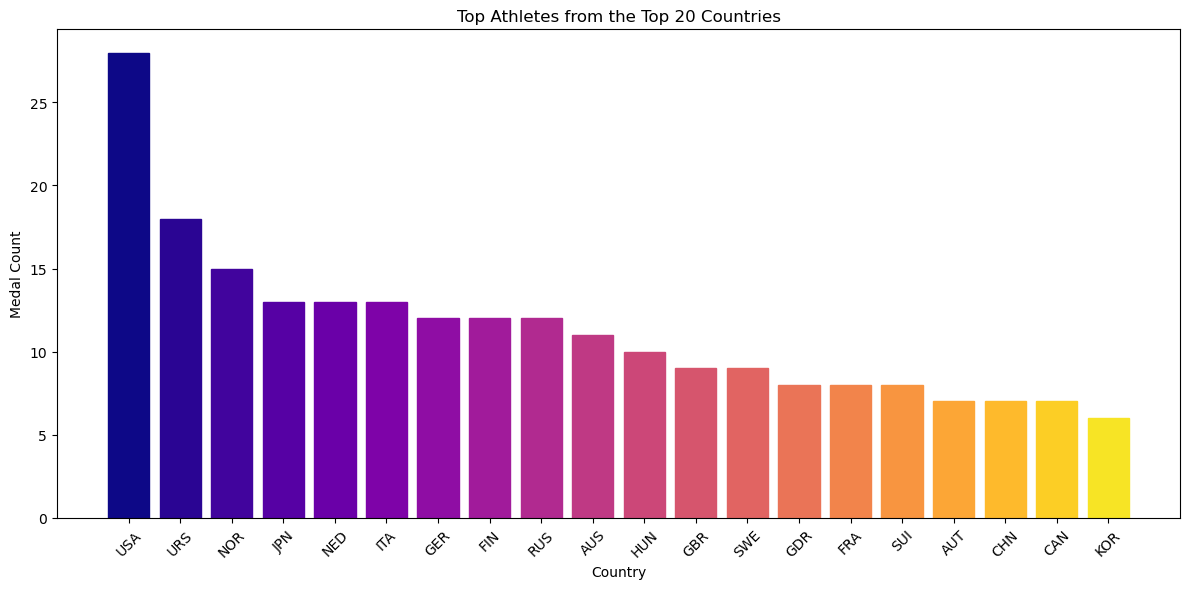

In [50]:
import matplotlib.pyplot as plt
import numpy as np

# Sort the DataFrame by medal count in descending order
sorted_top_athletes = filtered_top_athletes.sort_values(by='medal_count', ascending=False)

# Create a colormap for gradient colors
colormap = plt.get_cmap('plasma')
colors = colormap(np.arange(len(sorted_top_athletes)) / len(sorted_top_athletes))

# Create a bar chart with gradient colors
plt.figure(figsize=(12, 6))
bars = plt.bar(sorted_top_athletes['country_noc_x'], sorted_top_athletes['medal_count'], color=colors)

# Add color gradient to the bars
for bar, color in zip(bars, colors):
    bar.set_color(color)

plt.xlabel('Country')
plt.ylabel('Medal Count')
plt.title('Top Athletes from the Top 20 Countries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

top 10 countries with the highest number of athletes participating --done
Top 5 Performing Countries in last 2 olympics --done
Identifying the Top 10 and Bottom 10 Participation Discipline
Identifying the contribution of Men and Women participants in the Olympics
Identifying the Country with the field of Discipline they participated
Probability of winning

### Athelete to country and sport analysis

## Top 20 countries performance in last 3 Olympic editions

In [51]:
# Assuming df_games_medal_tally is your DataFrame
years_to_keep = [2012, 2016, 2020]

# Use boolean indexing to filter the DataFrame
filtered_df = df_games_medal_tally[df_games_medal_tally['year'].isin(years_to_keep)]

filtered_df = filtered_df[filtered_df['country_noc'].isin(top20['country_noc'])]

# Group the DataFrame by "edition" and rank countries based on "total" medals
filtered_df['rank'] = filtered_df.groupby('edition')['total'].rank(ascending=False, method='min')

# Sort the DataFrame by "edition" and "rank" to maintain a consistent order
filtered_df = filtered_df.sort_values(by=['edition', 'rank'])

# Display the DataFrame with country ranks for each Olympic edition
filtered_df[['edition', 'country', 'total', 'rank']]

edition                     country  total  rank
1078  2012 Summer Olympics               United States    104   1.0
1079  2012 Summer Olympics  People's Republic of China     91   2.0
1080  2012 Summer Olympics               Great Britain     65   3.0
1081  2012 Summer Olympics          Russian Federation     65   3.0
1083  2012 Summer Olympics                     Germany     44   5.0
1088  2012 Summer Olympics                       Japan     38   6.0
1084  2012 Summer Olympics                      France     35   7.0
1085  2012 Summer Olympics                   Australia     35   7.0
1082  2012 Summer Olympics           Republic of Korea     30   9.0
1086  2012 Summer Olympics                       Italy     28  10.0
1090  2012 Summer Olympics                 Netherlands     20  11.0
1087  2012 Summer Olympics                     Hungary     18  12.0
1104  2012 Summer Olympics                      Canada     18  12.0
1114  2012 Summer Olympics                      Sweden      8  14.0
1110  2012 Summer Olympics                 Switzerland      4  15.0
1111  2012 Summer Olympics                      Norway      4  15.0
1138  2012 Summer Olympics                     Finland      3  17.0
1164  2016 Summer Olympics               United States    121   1.0
1166  2016 Summer Olympics  People's Republic of China     70   2.0
1165  2016 Summer Olympics               Great Britain     67   3.0
1167  2016 Summer Olympics          Russian Federation     56   4.0
1168  2016 Summer Olympics                     Germany     42   5.0
1170  2016 Summer Olympics                      France     42   5.0
1169  2016 Summer Olympics                       Japan     41   7.0
1173  2016 Summer Olympics                   Australia     29   8.0
1172  2016 Summer Olympics                       Italy     28   9.0
1183  2016 Summer Olympics                      Canada     22  10.0
1171  2016 Summer Olympics           Republic of Korea     21  11.0
1174  2016 Summer Olympics                 Netherlands     19  12.0
1175  2016 Summer Olympics                     Hungary     15  13.0
1191  2016 Summer Olympics                      Sweden     11  14.0
1186  2016 Summer Olympics                 Switzerland      7  15.0
1237  2016 Summer Olympics                      Norway      4  16.0
1241  2016 Summer Olympics                     Austria      1  17.0
1244  2016 Summer Olympics                     Finland      1  17.0
1250  2020 Summer Olympics               United States    113   1.0
1251  2020 Summer Olympics  People's Republic of China     88   2.0
1253  2020 Summer Olympics               Great Britain     64   3.0
1252  2020 Summer Olympics                       Japan     58   4.0
1255  2020 Summer Olympics                   Australia     46   5.0
1259  2020 Summer Olympics                       Italy     40   6.0
1258  2020 Summer Olympics                     Germany     37   7.0
1256  2020 Summer Olympics                 Netherlands     36   8.0
1257  2020 Summer Olympics                      France     33   9.0
1260  2020 Summer Olympics                      Canada     24  10.0
1264  2020 Summer Olympics                     Hungary     20  11.0
1265  2020 Summer Olympics           Republic of Korea     20  11.0
1273  2020 Summer Olympics                 Switzerland     13  13.0
1272  2020 Summer Olympics                      Sweden      9  14.0
1269  2020 Summer Olympics                      Norway      8  15.0
1302  2020 Summer Olympics                     Austria      7  16.0
1334  2020 Summer Olympics                     Finland      2  17.0

### Country Ranks Based on Total Medals by Edition

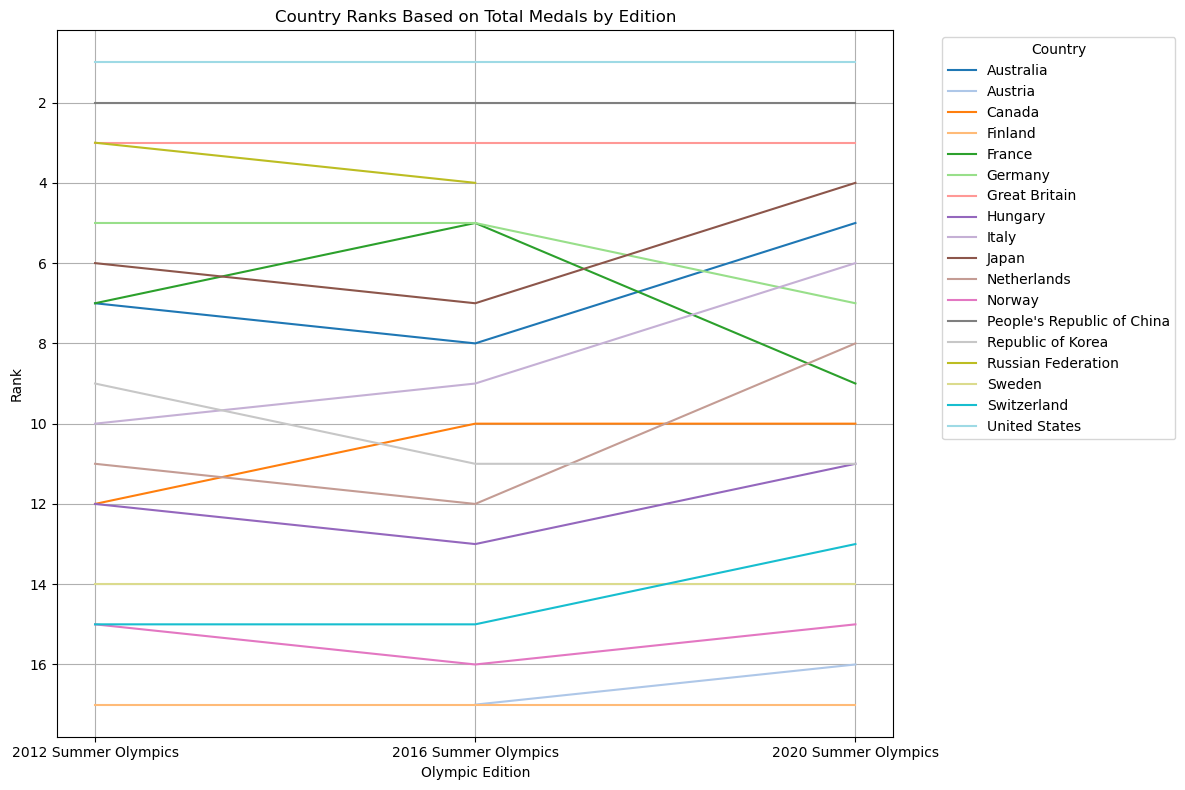

In [52]:
# Group the DataFrame by "edition" and "country" to get the rank of a specific country in each edition
ranked_df = filtered_df.groupby(['edition', 'country'])['rank'].min().unstack()

# Define a colormap with distinct colors
colormap = plt.cm.get_cmap('tab20', len(ranked_df.columns))

# Plot a line chart for each country's rank in each edition with distinct colors
plt.figure(figsize=(12, 8))
for i, country in enumerate(ranked_df.columns):
    plt.plot(ranked_df.index, ranked_df[country], label=country, color=colormap(i))

plt.xlabel('Olympic Edition')
plt.ylabel('Rank')
plt.title('Country Ranks Based on Total Medals by Edition')

# Invert the y-axis
plt.gca().invert_yaxis()

# Invert the legend
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), title='Country')

plt.grid(True)
plt.tight_layout()
plt.show()


In [53]:
ranked_df.columns

Index(['Australia', 'Austria', 'Canada', 'Finland', 'France', 'Germany',
       'Great Britain', 'Hungary', 'Italy', 'Japan', 'Netherlands', 'Norway',
       'People's Republic of China', 'Republic of Korea', 'Russian Federation',
       'Sweden', 'Switzerland', 'United States'],
      dtype='object', name='country')

In [54]:
pivoted_df = ranked_df.T
pivoted_df

edition                     2012 Summer Olympics  2016 Summer Olympics  \
country                                                                  
Australia                                    7.0                   8.0   
Austria                                      NaN                  17.0   
Canada                                      12.0                  10.0   
Finland                                     17.0                  17.0   
France                                       7.0                   5.0   
Germany                                      5.0                   5.0   
Great Britain                                3.0                   3.0   
Hungary                                     12.0                  13.0   
Italy                                       10.0                   9.0   
Japan                                        6.0                   7.0   
Netherlands                                 11.0                  12.0   
Norway                                      15.0                  16.0   
People's Republic of China                   2.0                   2.0   
Republic of Korea                            9.0                  11.0   
Russian Federation                           3.0                   4.0   
Sweden                                      14.0                  14.0   
Switzerland                                 15.0                  15.0   
United States                                1.0                   1.0   

edition                     2020 Summer Olympics  
country                                           
Australia                                    5.0  
Austria                                     16.0  
Canada                                      10.0  
Finland                                     17.0  
France                                       9.0  
Germany                                      7.0  
Great Britain                                3.0  
Hungary                                     11.0  
Italy                                        6.0  
Japan                                        4.0  
Netherlands                                  8.0  
Norway                                      15.0  
People's Republic of China                   2.0  
Republic of Korea                           11.0  
Russian Federation                           NaN  
Sweden                                      14.0  
Switzerland                                 13.0  
United States                                1.0

In [55]:
# Calculate the rank difference
rank_diff_df = pivoted_df.diff(axis=1)

# Display the rank difference DataFrame
rank_diff_df

edition                     2012 Summer Olympics  2016 Summer Olympics  \
country                                                                  
Australia                                    NaN                   1.0   
Austria                                      NaN                   NaN   
Canada                                       NaN                  -2.0   
Finland                                      NaN                   0.0   
France                                       NaN                  -2.0   
Germany                                      NaN                   0.0   
Great Britain                                NaN                   0.0   
Hungary                                      NaN                   1.0   
Italy                                        NaN                  -1.0   
Japan                                        NaN                   1.0   
Netherlands                                  NaN                   1.0   
Norway                                       NaN                   1.0   
People's Republic of China                   NaN                   0.0   
Republic of Korea                            NaN                   2.0   
Russian Federation                           NaN                   1.0   
Sweden                                       NaN                   0.0   
Switzerland                                  NaN                   0.0   
United States                                NaN                   0.0   

edition                     2020 Summer Olympics  
country                                           
Australia                                   -3.0  
Austria                                     -1.0  
Canada                                       0.0  
Finland                                      0.0  
France                                       4.0  
Germany                                      2.0  
Great Britain                                0.0  
Hungary                                     -2.0  
Italy                                       -3.0  
Japan                                       -3.0  
Netherlands                                 -4.0  
Norway                                      -1.0  
People's Republic of China                   0.0  
Republic of Korea                            0.0  
Russian Federation                           NaN  
Sweden                                       0.0  
Switzerland                                 -2.0  
United States                                0.0

### Geographic location analysis (Host effect)

### Visualise a geographic map to show concentration of games held in each country

In [56]:
#pip install geopandas
import geopandas as gpd

In [57]:
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
countries.head()

/var/folders/c4/xtbqs4rn3jg2c0ccfbf2bm980000gn/T/ipykernel_10342/2260362665.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


pop_est      continent                      name iso_a3  gdp_md_est  \
0     889953.0        Oceania                      Fiji    FJI        5496   
1   58005463.0         Africa                  Tanzania    TZA       63177   
2     603253.0         Africa                 W. Sahara    ESH         907   
3   37589262.0  North America                    Canada    CAN     1736425   
4  328239523.0  North America  United States of America    USA    21433226   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...

/var/folders/c4/xtbqs4rn3jg2c0ccfbf2bm980000gn/T/ipykernel_10342/1446653406.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


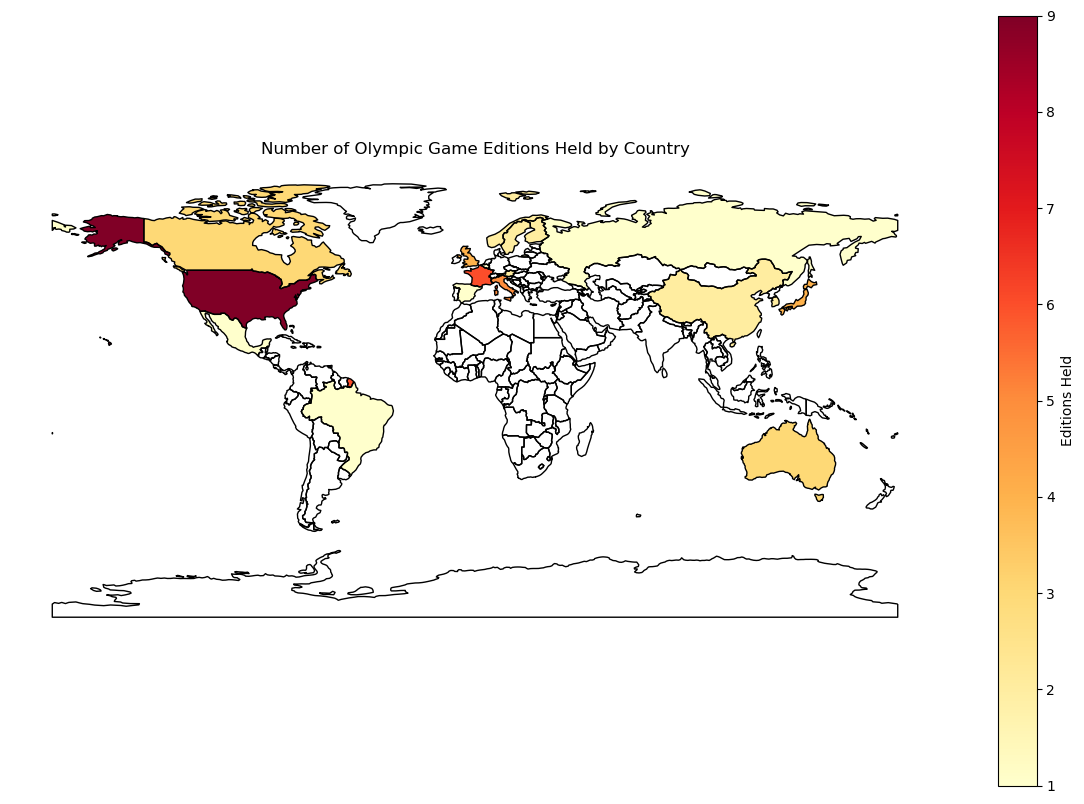

In [58]:
country_counts = df_games.groupby('country_noc')['edition_id'].nunique().reset_index()

# Load a world map dataset
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the world map dataset with 'country_counts'
world = world.merge(country_counts, left_on='iso_a3', right_on='country_noc', how='left')

# Plot the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax, linewidth=1, color='k')  # Plot country boundaries

# Plot countries with editions held and specify the legend
world[world['edition_id'].notna()].plot(column='edition_id', cmap='YlOrRd', ax=ax, legend=True, legend_kwds={'label': "Editions Held"})

ax.set_title('Number of Olympic Game Editions Held by Country')
ax.set_axis_off()

plt.show()

In [59]:
country_counts.sort_values(by='edition_id', ascending=False)

country_noc  edition_id
23         USA           9
8          FRA           6
13         ITA           5
14         JPN           4
11         GER           4
10         GBR           4
0          AUS           3
12         GRE           3
4          CAN           3
7          FIN           2
5          CHN           2
1          AUT           2
15         KOR           2
21         SWE           2
20         SUI           2
18         NOR           2
19         RUS           1
2          BEL           1
22         URS           1
16         MEX           1
17         NED           1
9          FRG           1
3          BRA           1
6          ESP           1
24         YUG           1

### Countries who hosted most number of editions

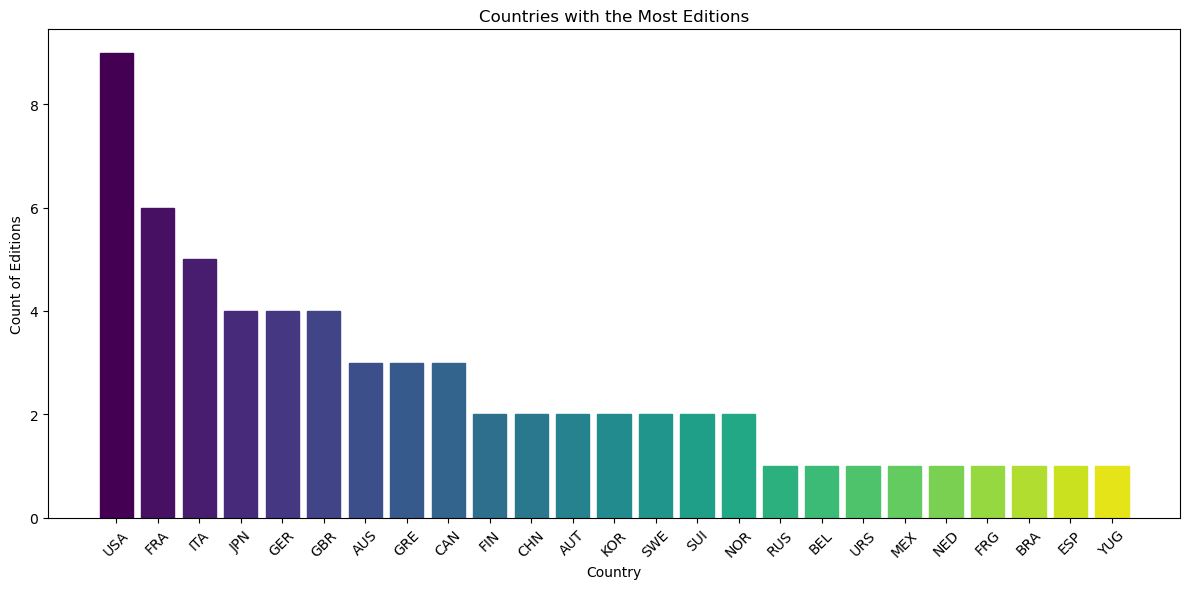

In [60]:
import matplotlib.pyplot as plt
import numpy as np

# Sort the DataFrame by count of editions in descending order
sorted_country_counts = country_counts.sort_values(by='edition_id', ascending=False)

# Create a colormap for gradient colors
colormap = plt.get_cmap('viridis')
colors = colormap(np.arange(len(sorted_country_counts)) / len(sorted_country_counts))

# Create a bar chart with gradient colors
plt.figure(figsize=(12, 6))
bars = plt.bar(sorted_country_counts['country_noc'], sorted_country_counts['edition_id'], color=colors)

# Add color gradient to the bars
for bar, color in zip(bars, colors):
    bar.set_color(color)

plt.xlabel('Country')
plt.ylabel('Count of Editions')
plt.title('Countries with the Most Editions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [61]:
#count number of editions
unique_editions = df_games['edition_id'].nunique()
print(f"Number of unique editions: {unique_editions}")

Number of unique editions: 64


In [62]:
season_counts = df_games['season'].value_counts()
print(season_counts)

Summer    35
Winter    27
na         2
Name: season, dtype: int64


## Correlation analysis

In [63]:
# Load external data

In [64]:
#correlation between a country’s GDP per capita and population size, respectively, 
#and the total number of medals won at the 2016,2020 Olympic Games for the 30 top-scoring countries.
world_bank_data = pd.read_csv('/Users/farah/Documents/Jupyter Repository/archive/GDP_Per_Capita/92d60aa2-1ecd-481c-bc8a-a686445f0909_Data.csv')
world_bank_data.head()

Series Name  Series Code    Country Name Country Code 2016 [YR2016]  \
0  Population, total  SP.POP.TOTL     Afghanistan          AFG      34636207   
1  Population, total  SP.POP.TOTL         Albania          ALB       2876101   
2  Population, total  SP.POP.TOTL         Algeria          DZA      40339329   
3  Population, total  SP.POP.TOTL  American Samoa          ASM         50448   
4  Population, total  SP.POP.TOTL         Andorra          AND         72540   

  2020 [YR2020]  
0      38972230  
1       2837849  
2      43451666  
3         46189  
4         77700

### Correlation between GDP per Capita and Total Medals (2016)

In [65]:
missing_series_name = world_bank_data['Series Name'].isna()
gdp_per_capita = world_bank_data[~missing_series_name & world_bank_data['Series Name'].str.contains("GDP per capita (current US$)", regex=False)]

In [66]:
#fetch top 30 countries in 2016 based on medal count
df_games_medal_tally_2016 = df_games_medal_tally[df_games_medal_tally['year'] == 2016]
sorted_df = df_games_medal_tally_2016.sort_values(by='total', ascending=False)
df_games_medal_tally_2016_top30 = sorted_df.head(30)

In [67]:
#obtain the gdp per capita of these top30 countries
gdp_per_capita_2016_top30 = gdp_per_capita[gdp_per_capita['Country Code'].isin(df_games_medal_tally_2016_top30['country_noc'])]

In [68]:
gdp_per_capita_2016_top30[gdp_per_capita_2016_top30['Country Code']=='ITA']

Series Name     Series Code Country Name Country Code  \
10511  GDP per capita (current US$)  NY.GDP.PCAP.CD        Italy          ITA   

          2016 [YR2016]     2020 [YR2020]  
10511  30960.7315088911  31918.6934933773

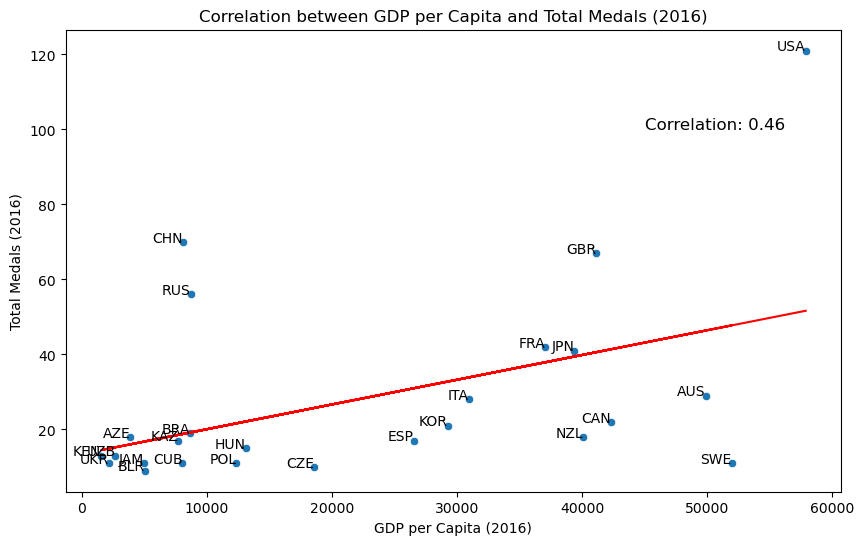

In [69]:
# Merge the two DataFrames on the 'country_noc' column
merged_data = df_games_medal_tally_2016_top30.merge(gdp_per_capita_2016_top30, left_on='country_noc', right_on='Country Code')

# Convert the '2016 [YR2016]' column to numeric (it might be in string format)
merged_data['2016 [YR2016]'] = pd.to_numeric(merged_data['2016 [YR2016]'], errors='coerce')

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='2016 [YR2016]', y='total')
plt.title('Correlation between GDP per Capita and Total Medals (2016)')
plt.xlabel('GDP per Capita (2016)')
plt.ylabel('Total Medals (2016)')

# Add country_noc labels to data points
for i, row in merged_data.iterrows():
    plt.text(row['2016 [YR2016]'], row['total'], row['country_noc'], fontsize=10, ha='right')

# Calculate the correlation coefficient
correlation_coefficient = merged_data['2016 [YR2016]'].corr(merged_data['total'])
plt.text(45000, 100, f'Correlation: {correlation_coefficient:.2f}', fontsize=12)

# Fit and plot a linear regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(merged_data['2016 [YR2016]'], merged_data['total'])
x_values = np.array(merged_data['2016 [YR2016]'])
plt.plot(x_values, intercept + slope * x_values, color='red')

# Show the plot
plt.show()

### Correlation between GDP per Capita and Total Medals (2020)

In [70]:
df_games_medal_tally_2020 = df_games_medal_tally[df_games_medal_tally['year'] == 2020]
sorted_df = df_games_medal_tally_2020.sort_values(by='total', ascending=False)
df_games_medal_tally_2020_top30 = sorted_df.head(30)

In [71]:
gdp_per_capita_2020_top30 = gdp_per_capita[gdp_per_capita['Country Code'].isin(df_games_medal_tally_2020_top30['country_noc'])]

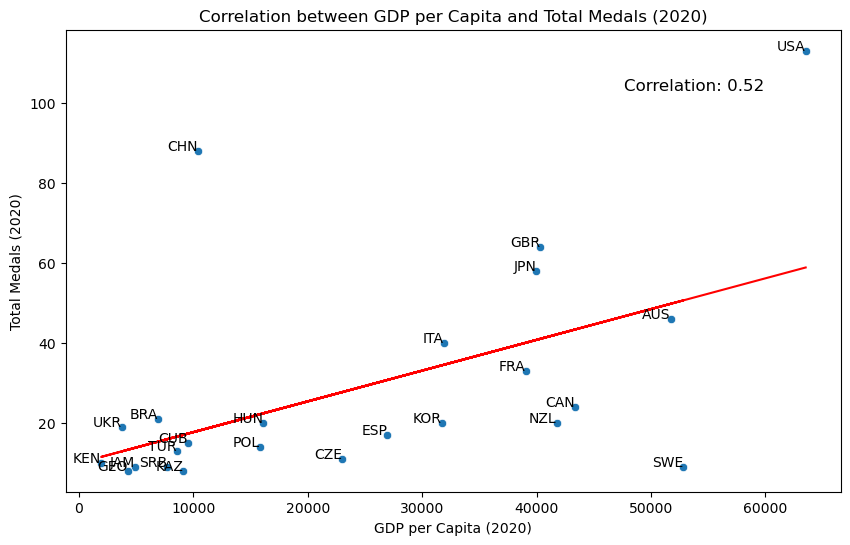

In [72]:
# Merge the two DataFrames on the 'country_noc' column
merged_data = df_games_medal_tally_2020_top30.merge(gdp_per_capita_2020_top30, left_on='country_noc', right_on='Country Code')

# Convert the '2020 [YR2020]' column to numeric (it might be in string format)
merged_data['2020 [YR2020]'] = pd.to_numeric(merged_data['2020 [YR2020]'], errors='coerce')

# Create a scatter plot with a logarithmic scale for the GDP per Capita
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='2020 [YR2020]', y='total')
plt.title('Correlation between GDP per Capita and Total Medals (2020)')
plt.xlabel('GDP per Capita (2020)')
plt.ylabel('Total Medals (2020)')

# Add country_noc labels to data points
for i, row in merged_data.iterrows():
    plt.text(row['2020 [YR2020]'], row['total'], row['country_noc'], fontsize=10, ha='right')

# Fit and plot a linear regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(merged_data['2020 [YR2020]'], merged_data['total'])
x_values = np.array(merged_data['2020 [YR2020]'])
y_values = intercept + slope * x_values
plt.plot(x_values, y_values, color='red')

# Calculate the correlation coefficient
correlation_coefficient = merged_data['2020 [YR2020]'].corr(merged_data['total'])

# Adjust the position for displaying the correlation value
x_pos = 0.75 * max(merged_data['2020 [YR2020]'])
y_pos = max(merged_data['total']) - 10
plt.text(x_pos, y_pos, f'Correlation: {correlation_coefficient:.2f}', fontsize=12)

# Show the plot
plt.show()

Text(9.5, 100, 'Correlation (2020): 0.45')

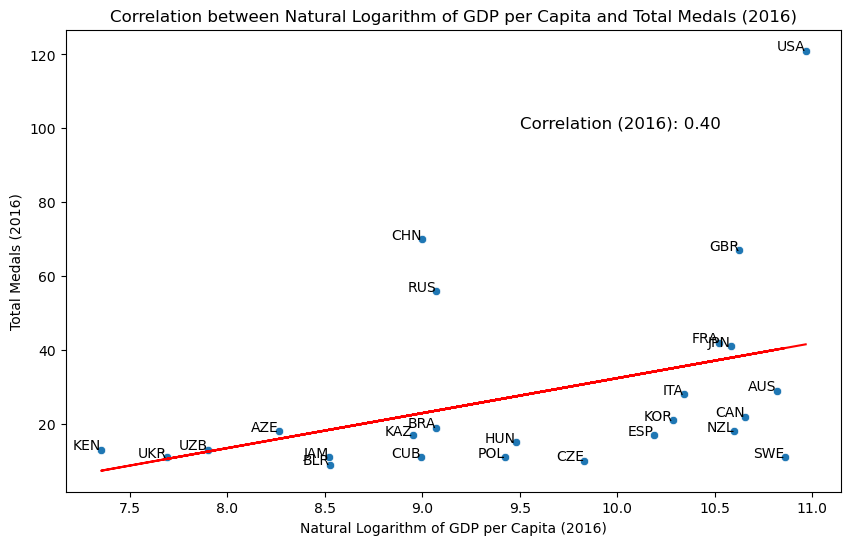

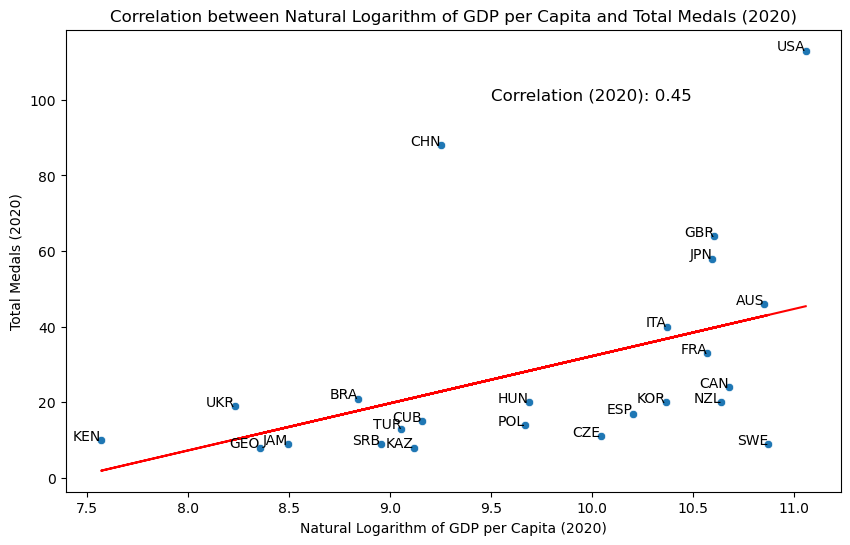

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 
import numpy as np

# Merge the two DataFrames on the 'country_noc' column for 2016
merged_data_2016 = df_games_medal_tally_2016_top30.merge(gdp_per_capita_2016_top30, left_on='country_noc', right_on='Country Code')

# Convert the '2016 [YR2016]' column to numeric (it might be in string format)
merged_data_2016['2016 [YR2016]'] = pd.to_numeric(merged_data_2016['2016 [YR2016]'], errors='coerce')

# Take the natural logarithm (ln) of the '2016 [YR2016]' column
merged_data_2016['2016 [YR2016]'] = np.log(merged_data_2016['2016 [YR2016]'])

# Merge the two DataFrames on the 'country_noc' column for 2020
merged_data_2020 = df_games_medal_tally_2020_top30.merge(gdp_per_capita_2020_top30, left_on='country_noc', right_on='Country Code')

# Convert the '2020 [YR2020]' column to numeric (it might be in string format)
merged_data_2020['2020 [YR2020]'] = pd.to_numeric(merged_data_2020['2020 [YR2020]'], errors='coerce')

# Take the natural logarithm (ln) of the '2020 [YR2020]' column
merged_data_2020['2020 [YR2020]'] = np.log(merged_data_2020['2020 [YR2020]'])

# Create a scatter plot for 2016
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data_2016, x='2016 [YR2016]', y='total')
plt.title('Correlation between Natural Logarithm of GDP per Capita and Total Medals (2016)')
plt.xlabel('Natural Logarithm of GDP per Capita (2016)')
plt.ylabel('Total Medals (2016)')

# Add country_noc labels to data points
for i, row in merged_data_2016.iterrows():
    plt.text(row['2016 [YR2016]'], row['total'], row['country_noc'], fontsize=10, ha='right')

# Fit and plot a linear regression line for 2016
slope, intercept, r_value, p_value, std_err = stats.linregress(merged_data_2016['2016 [YR2016]'], merged_data_2016['total'])
x_values = np.array(merged_data_2016['2016 [YR2016]'])
y_values = intercept + slope * x_values
plt.plot(x_values, y_values, color='red')

# Calculate the correlation coefficient for 2016
correlation_coefficient = merged_data_2016['2016 [YR2016]'].corr(merged_data_2016['total'])
plt.text(9.5, 100, f'Correlation (2016): {correlation_coefficient:.2f}', fontsize=12)

# Create a scatter plot for 2020
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data_2020, x='2020 [YR2020]', y='total')
plt.title('Correlation between Natural Logarithm of GDP per Capita and Total Medals (2020)')
plt.xlabel('Natural Logarithm of GDP per Capita (2020)')
plt.ylabel('Total Medals (2020)')

# Add country_noc labels to data points for 2020
for i, row in merged_data_2020.iterrows():
    plt.text(row['2020 [YR2020]'], row['total'], row['country_noc'], fontsize=10, ha='right')

# Fit and plot a linear regression line for 2020
slope, intercept, r_value, p_value, std_err = stats.linregress(merged_data_2020['2020 [YR2020]'], merged_data_2020['total'])
x_values = np.array(merged_data_2020['2020 [YR2020]'])
y_values = intercept + slope * x_values
plt.plot(x_values, y_values, color='red')

# Calculate the correlation coefficient for 2020
correlation_coefficient = merged_data_2020['2020 [YR2020]'].corr(merged_data_2020['total'])
plt.text(9.5, 100, f'Correlation (2020): {correlation_coefficient:.2f}', fontsize=12)


### Correlation between Logarithm of Population and Total Medals (2016)

In [74]:
population = world_bank_data[~missing_series_name & world_bank_data['Series Name'].str.contains("Population, total", regex=False)]

In [75]:
pop_2016_top30 = population[population['Country Code'].isin(df_games_medal_tally_2016_top30['country_noc'])]

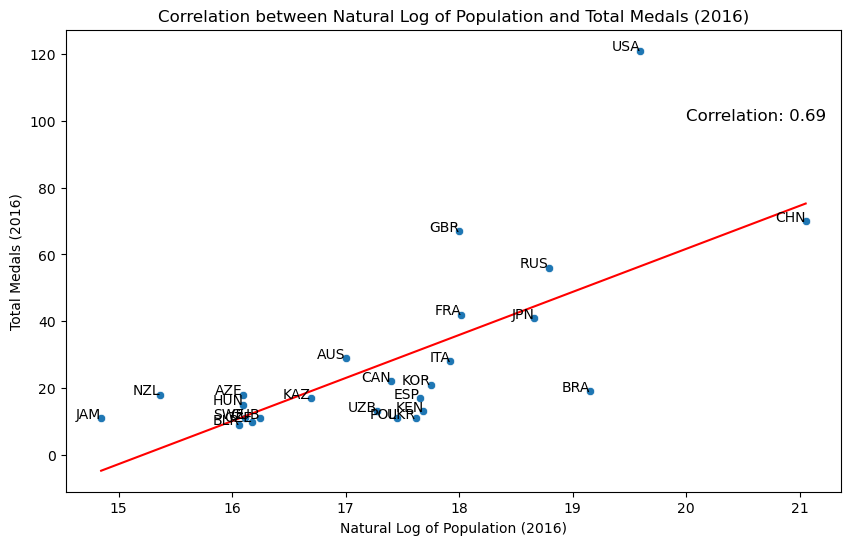

In [76]:
# Merge the two DataFrames on the 'country_noc' column
merged_data = df_games_medal_tally_2016_top30.merge(pop_2016_top30, left_on='country_noc', right_on='Country Code')

# Convert the '2016 [YR2016]' column to numeric (it might be in string format)
merged_data['2016 [YR2016]'] = pd.to_numeric(merged_data['2016 [YR2016]'], errors='coerce')

# Apply a logarithmic transformation to the population column
merged_data['log_population'] = np.log(merged_data['2016 [YR2016]'])

# Create a scatter plot with a logarithmic scale for the population
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='log_population', y='total')
plt.title('Correlation between Natural Log of Population and Total Medals (2016)')
plt.xlabel('Natural Log of Population (2016)')
plt.ylabel('Total Medals (2016)')

# Add country_noc labels to data points
for i, row in merged_data.iterrows():
    plt.text(row['log_population'], row['total'], row['country_noc'], fontsize=10, ha='right')

# Calculate the correlation coefficient
correlation_coefficient = merged_data['log_population'].corr(merged_data['total'])
plt.text(20, 100, f'Correlation: {correlation_coefficient:.2f}', fontsize=12)

# Fit and plot a linear regression line on the logarithmic scale
slope, intercept, r_value, p_value, std_err = stats.linregress(merged_data['log_population'], merged_data['total'])
x_values = np.linspace(min(merged_data['log_population']), max(merged_data['log_population']), 100)
y_values = intercept + slope * x_values
plt.plot(x_values, y_values, color='red')

# Show the plot
plt.show()

### Correlation between Logarithm of Population and Total Medals (2020)

In [77]:
pop_2020_top30 = population[population['Country Code'].isin(df_games_medal_tally_2020_top30['country_noc'])]

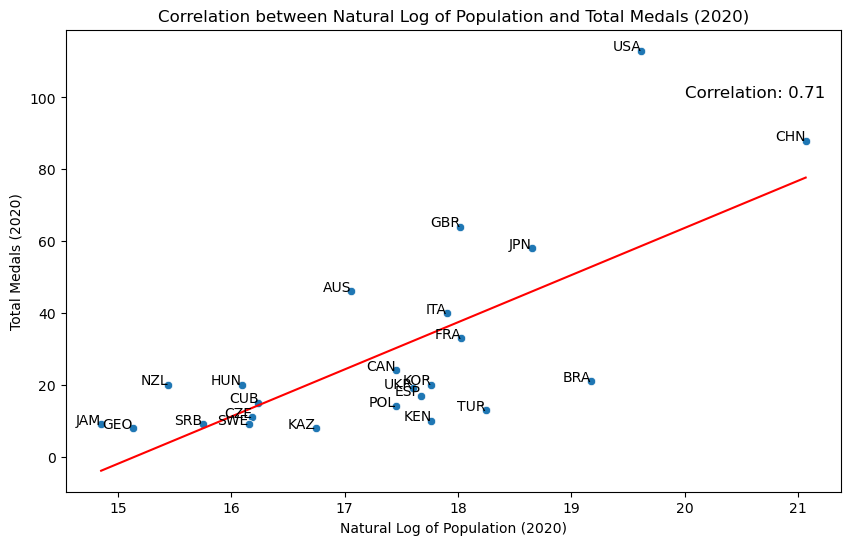

In [78]:
# Merge the two DataFrames on the 'country_noc' column
merged_data = df_games_medal_tally_2020_top30.merge(pop_2020_top30, left_on='country_noc', right_on='Country Code')

# Convert the '2016 [YR2016]' column to numeric (it might be in string format)
merged_data['2020 [YR2020]'] = pd.to_numeric(merged_data['2020 [YR2020]'], errors='coerce')

# Apply a logarithmic transformation to the population column
merged_data['log_population'] = np.log(merged_data['2020 [YR2020]'])

# Create a scatter plot with a logarithmic scale for the population
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='log_population', y='total')
plt.title('Correlation between Natural Log of Population and Total Medals (2020)')
plt.xlabel('Natural Log of Population (2020)')
plt.ylabel('Total Medals (2020)')

# Add country_noc labels to data points
for i, row in merged_data.iterrows():
    plt.text(row['log_population'], row['total'], row['country_noc'], fontsize=10, ha='right')

# Calculate the correlation coefficient
correlation_coefficient = merged_data['log_population'].corr(merged_data['total'])
plt.text(20, 100, f'Correlation: {correlation_coefficient:.2f}', fontsize=12)

# Fit and plot a linear regression line on the logarithmic scale
slope, intercept, r_value, p_value, std_err = stats.linregress(merged_data['log_population'], merged_data['total'])
x_values = np.linspace(min(merged_data['log_population']), max(merged_data['log_population']), 100)
y_values = intercept + slope * x_values
plt.plot(x_values, y_values, color='red')

# Show the plot
plt.show()

### Correlation between GDP Current and Total Medals (2016)

In [79]:
gdp_total = world_bank_data[~missing_series_name & world_bank_data['Series Name'].str.contains("GDP (current US$)", regex=False)]

In [80]:
gdp_total_2016_top30 = gdp_total[gdp_total['Country Code'].isin(df_games_medal_tally_2016_top30['country_noc'])]

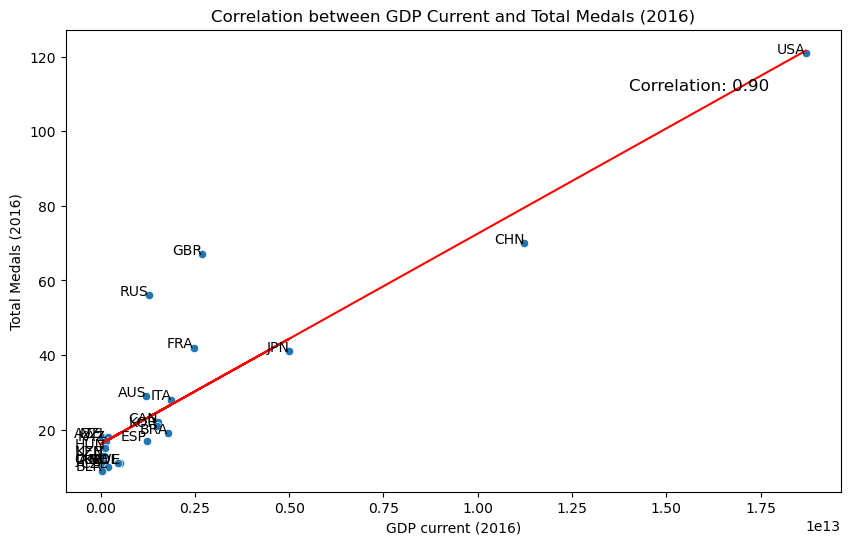

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 
import numpy as np

# Merge the two DataFrames on the 'country_noc' column
merged_data = df_games_medal_tally_2016_top30.merge(gdp_total_2016_top30, left_on='country_noc', right_on='Country Code')

# Convert the '2016 [YR2016]' column to numeric (it might be in string format)
merged_data['2016 [YR2016]'] = pd.to_numeric(merged_data['2016 [YR2016]'], errors='coerce')

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='2016 [YR2016]', y='total')
plt.title('Correlation between GDP Current and Total Medals (2016)')
plt.xlabel('GDP current (2016)')
plt.ylabel('Total Medals (2016)')

# Add country_noc labels to data points
for i, row in merged_data.iterrows():
    plt.text(row['2016 [YR2016]'], row['total'], row['country_noc'], fontsize=10, ha='right')

# Calculate the correlation coefficient
correlation_coefficient = merged_data['2016 [YR2016]'].corr(merged_data['total'])
x_pos = 0.75 * max(merged_data['2016 [YR2016]'])
y_pos = max(merged_data['total']) - 10
plt.text(x_pos, y_pos, f'Correlation: {correlation_coefficient:.2f}', fontsize=12)

# Fit and plot a linear regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(merged_data['2016 [YR2016]'], merged_data['total'])
x_values = np.array(merged_data['2016 [YR2016]'])
plt.plot(x_values, intercept + slope * x_values, color='red')

# Show the plot
plt.show()

### Correlation between GDP current and Total Medals (2020)

In [82]:
gdp_total_2020_top30 = gdp_total[gdp_total['Country Code'].isin(df_games_medal_tally_2020_top30['country_noc'])]

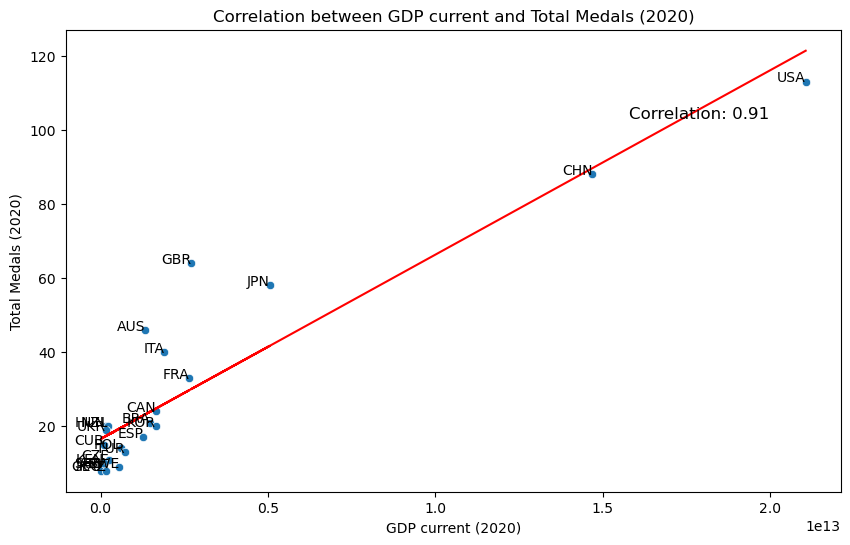

In [83]:
# Merge the two DataFrames on the 'country_noc' column
merged_data = df_games_medal_tally_2020_top30.merge(gdp_total_2020_top30, left_on='country_noc', right_on='Country Code')

# Convert the '2020 [YR2020]' column to numeric (it might be in string format)
merged_data['2020 [YR2020]'] = pd.to_numeric(merged_data['2020 [YR2020]'], errors='coerce')

# Create a scatter plot with a logarithmic scale for the GDP per Capita
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='2020 [YR2020]', y='total')
plt.title('Correlation between GDP current and Total Medals (2020)')
plt.xlabel('GDP current (2020)')
plt.ylabel('Total Medals (2020)')

# Add country_noc labels to data points
for i, row in merged_data.iterrows():
    plt.text(row['2020 [YR2020]'], row['total'], row['country_noc'], fontsize=10, ha='right')

# Fit and plot a linear regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(merged_data['2020 [YR2020]'], merged_data['total'])
x_values = np.array(merged_data['2020 [YR2020]'])
y_values = intercept + slope * x_values
plt.plot(x_values, y_values, color='red')

# Calculate the correlation coefficient
correlation_coefficient = merged_data['2020 [YR2020]'].corr(merged_data['total'])

# Adjust the position for displaying the correlation value
x_pos = 0.75 * max(merged_data['2020 [YR2020]'])
y_pos = max(merged_data['total']) - 10
plt.text(x_pos, y_pos, f'Correlation: {correlation_coefficient:.2f}', fontsize=12)

# Show the plot
plt.show()

### Correlation between Natural Logarithm of GDP current and Total Medals (2016)

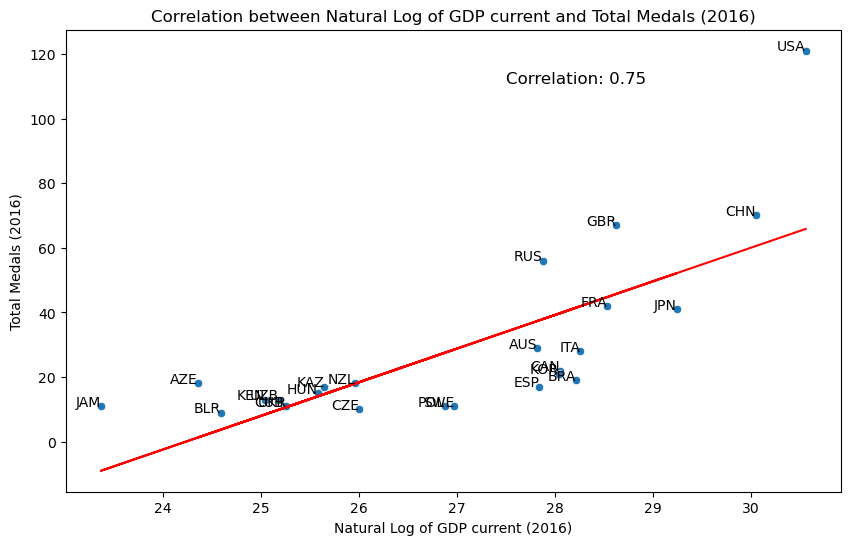

In [84]:

# Merge the two DataFrames on the 'country_noc' column
merged_data = df_games_medal_tally_2016_top30.merge(gdp_total_2016_top30, left_on='country_noc', right_on='Country Code')

# Convert the '2016 [YR2016]' column to numeric (it might be in string format)
merged_data['2016 [YR2016]'] = pd.to_numeric(merged_data['2016 [YR2016]'], errors='coerce')

# Take the natural logarithm (ln) of the '2016 [YR2016]' column
merged_data['2016 [YR2016]'] = np.log(merged_data['2016 [YR2016]'])

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='2016 [YR2016]', y='total')
plt.title('Correlation between Natural Log of GDP current and Total Medals (2016)')
plt.xlabel('Natural Log of GDP current (2016)')
plt.ylabel('Total Medals (2016)')

# Add country_noc labels to data points
for i, row in merged_data.iterrows():
    plt.text(row['2016 [YR2016]'], row['total'], row['country_noc'], fontsize=10, ha='right')

# Calculate the correlation coefficient
correlation_coefficient = merged_data['2016 [YR2016]'].corr(merged_data['total'])
x_pos = 0.90 * max(merged_data['2016 [YR2016]'])
y_pos = max(merged_data['total']) - 10
plt.text(x_pos, y_pos, f'Correlation: {correlation_coefficient:.2f}', fontsize=12)

# Fit and plot a linear regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(merged_data['2016 [YR2016]'], merged_data['total'])
x_values = np.array(merged_data['2016 [YR2016]'])
plt.plot(x_values, intercept + slope * x_values, color='red')

# Show the plot
plt.show()


### Correlation between natural logarithm of GDP current and Total Medals (2020)

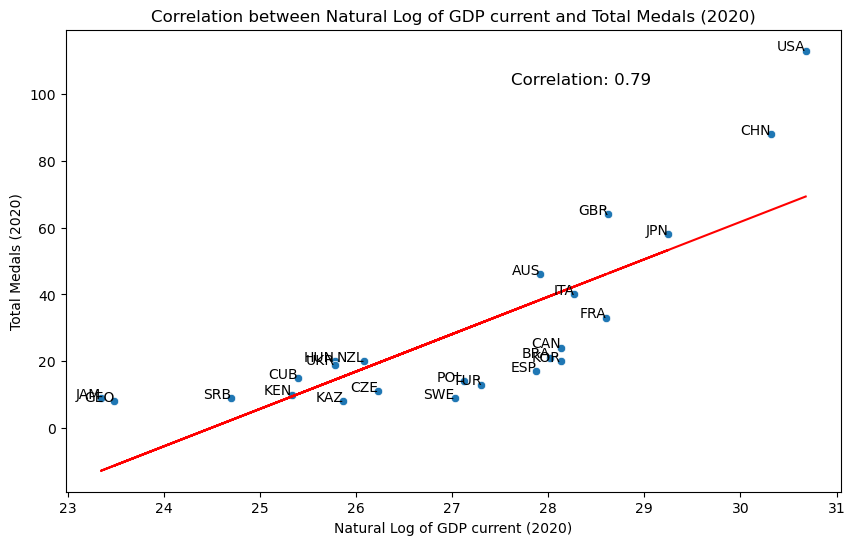

In [85]:
# Merge the two DataFrames on the 'country_noc' column
merged_data = df_games_medal_tally_2020_top30.merge(gdp_total_2020_top30, left_on='country_noc', right_on='Country Code')

# Convert the '2020 [YR2020]' column to numeric (it might be in string format)
merged_data['2020 [YR2020]'] = pd.to_numeric(merged_data['2020 [YR2020]'], errors='coerce')

# Take the logarithm (base 10) of the '2020 [YR2020]' column
merged_data['2020 [YR2020]'] = np.log(merged_data['2020 [YR2020]'])

# Create a scatter plot with a logarithmic scale for the GDP per Capita
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='2020 [YR2020]', y='total')
plt.title('Correlation between Natural Log of GDP current and Total Medals (2020)')
plt.xlabel('Natural Log of GDP current (2020)')
plt.ylabel('Total Medals (2020)')

# Add country_noc labels to data points
for i, row in merged_data.iterrows():
    plt.text(row['2020 [YR2020]'], row['total'], row['country_noc'], fontsize=10, ha='right')

# Fit and plot a linear regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(merged_data['2020 [YR2020]'], merged_data['total'])
x_values = np.array(merged_data['2020 [YR2020]'])
y_values = intercept + slope * x_values
plt.plot(x_values, y_values, color='red')

# Calculate the correlation coefficient
correlation_coefficient = merged_data['2020 [YR2020]'].corr(merged_data['total'])

# Adjust the position for displaying the correlation value
x_pos = 0.90 * max(merged_data['2020 [YR2020]'])
y_pos = max(merged_data['total']) - 10
plt.text(x_pos, y_pos, f'Correlation: {correlation_coefficient:.2f}', fontsize=12)

# Show the plot
plt.show()


### Correlation between GDP Growth and Total Medals (2016)

In [86]:
#GDP growth (annual %)
gdp_growth = world_bank_data[~missing_series_name & world_bank_data['Series Name'].str.contains("GDP growth (annual %)", regex=False)]

In [87]:
gdp_growth_2016_top30 = gdp_growth[gdp_growth['Country Code'].isin(df_games_medal_tally_2016_top30['country_noc'])]

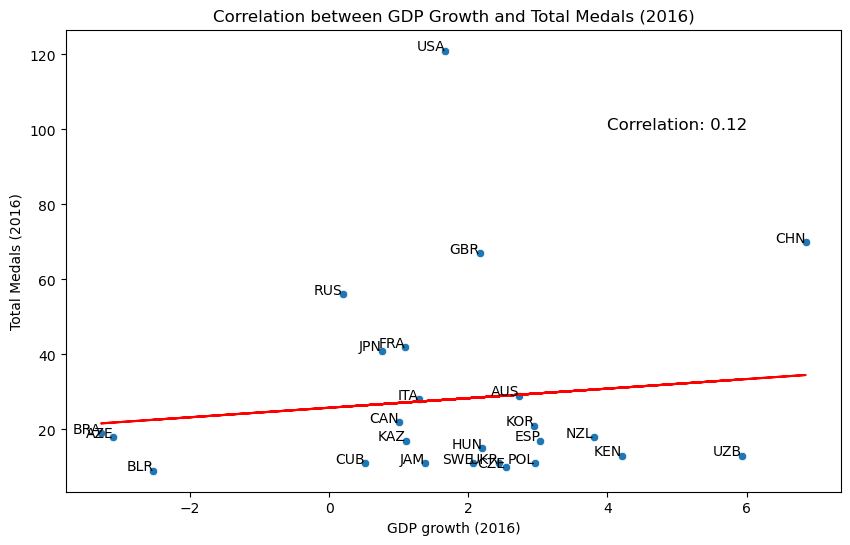

In [88]:
# Merge the two DataFrames on the 'country_noc' column
merged_data = df_games_medal_tally_2016_top30.merge(gdp_growth_2016_top30, left_on='country_noc', right_on='Country Code')

# Convert the '2016 [YR2016]' column to numeric (it might be in string format)
merged_data['2016 [YR2016]'] = pd.to_numeric(merged_data['2016 [YR2016]'], errors='coerce')

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='2016 [YR2016]', y='total')
plt.title('Correlation between GDP Growth and Total Medals (2016)')
plt.xlabel('GDP growth (2016)')
plt.ylabel('Total Medals (2016)')

# Add country_noc labels to data points
for i, row in merged_data.iterrows():
    plt.text(row['2016 [YR2016]'], row['total'], row['country_noc'], fontsize=10, ha='right')

# Calculate the correlation coefficient
correlation_coefficient = merged_data['2016 [YR2016]'].corr(merged_data['total'])
plt.text(4, 100, f'Correlation: {correlation_coefficient:.2f}', fontsize=12)

# Fit and plot a linear regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(merged_data['2016 [YR2016]'], merged_data['total'])
x_values = np.array(merged_data['2016 [YR2016]'])
plt.plot(x_values, intercept + slope * x_values, color='red')

# Show the plot
plt.show()

### Correlation between GDP Growth and Total Medals (2020)

In [89]:
gdp_growth_2020_top30 = gdp_growth[gdp_growth['Country Code'].isin(df_games_medal_tally_2020_top30['country_noc'])]

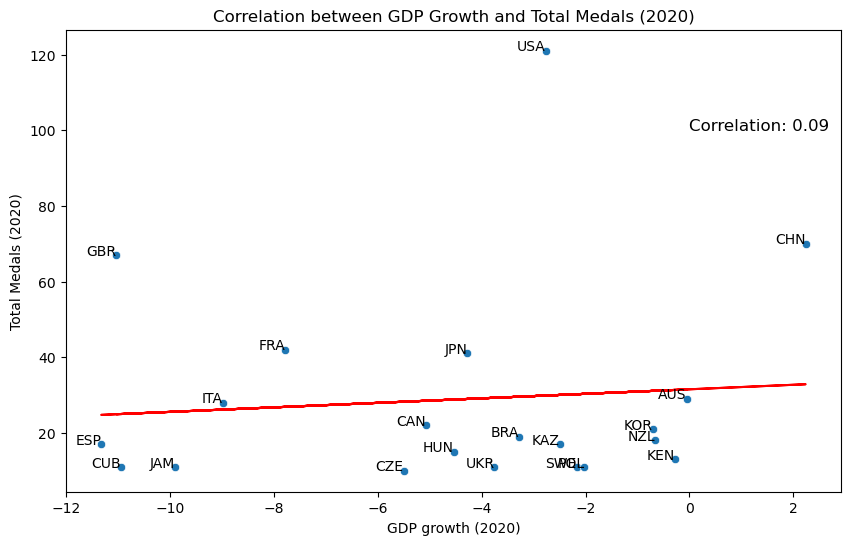

In [90]:
# Merge the two DataFrames on the 'country_noc' column
merged_data = df_games_medal_tally_2016_top30.merge(gdp_growth_2020_top30, left_on='country_noc', right_on='Country Code')

merged_data['2020 [YR2020]'] = pd.to_numeric(merged_data['2020 [YR2020]'], errors='coerce')

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='2020 [YR2020]', y='total')
plt.title('Correlation between GDP Growth and Total Medals (2020)')
plt.xlabel('GDP growth (2020)')
plt.ylabel('Total Medals (2020)')

# Add country_noc labels to data points
for i, row in merged_data.iterrows():
    plt.text(row['2020 [YR2020]'], row['total'], row['country_noc'], fontsize=10, ha='right')

# Calculate the correlation coefficient
correlation_coefficient = merged_data['2020 [YR2020]'].corr(merged_data['total'])
plt.text(0, 100, f'Correlation: {correlation_coefficient:.2f}', fontsize=12)

# Fit and plot a linear regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(merged_data['2020 [YR2020]'], merged_data['total'])
x_values = np.array(merged_data['2020 [YR2020]'])
plt.plot(x_values, intercept + slope * x_values, color='red')

# Show the plot
plt.show()

### Correlation between Population Growth and Total Medals (2016)

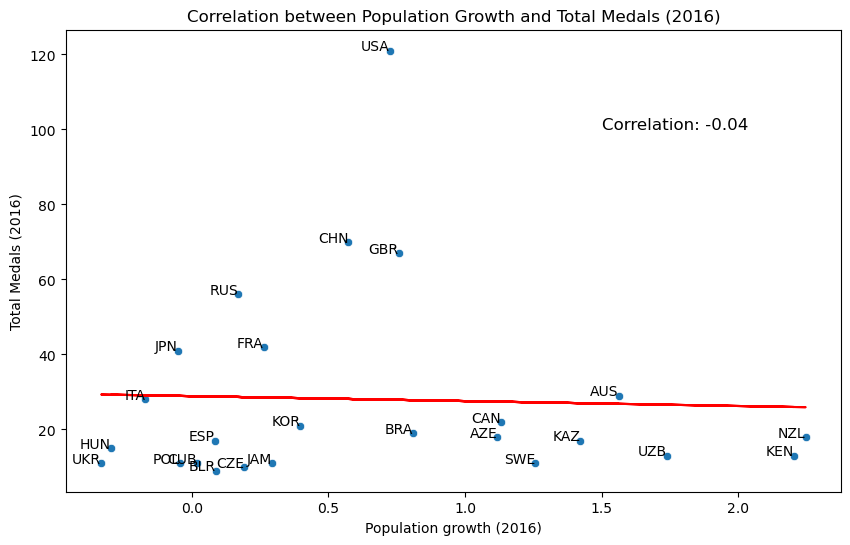

In [91]:
#GDP growth (annual %)
pop_growth = world_bank_data[~missing_series_name & world_bank_data['Series Name'].str.contains("Population growth (annual %)", 
                                                                                                regex=False)]

pop_growth_2016_top30 = pop_growth[pop_growth['Country Code'].isin(df_games_medal_tally_2016_top30['country_noc'])]

# Merge the two DataFrames on the 'country_noc' column
merged_data = df_games_medal_tally_2016_top30.merge(pop_growth_2016_top30, left_on='country_noc', right_on='Country Code')

# Convert the '2016 [YR2016]' column to numeric (it might be in string format)
merged_data['2016 [YR2016]'] = pd.to_numeric(merged_data['2016 [YR2016]'], errors='coerce')

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='2016 [YR2016]', y='total')
plt.title('Correlation between Population Growth and Total Medals (2016)')
plt.xlabel('Population growth (2016)')
plt.ylabel('Total Medals (2016)')

# Add country_noc labels to data points
for i, row in merged_data.iterrows():
    plt.text(row['2016 [YR2016]'], row['total'], row['country_noc'], fontsize=10, ha='right')

# Calculate the correlation coefficient
correlation_coefficient = merged_data['2016 [YR2016]'].corr(merged_data['total'])
plt.text(1.5, 100, f'Correlation: {correlation_coefficient:.2f}', fontsize=12)

# Fit and plot a linear regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(merged_data['2016 [YR2016]'], merged_data['total'])
x_values = np.array(merged_data['2016 [YR2016]'])
plt.plot(x_values, intercept + slope * x_values, color='red')

# Show the plot
plt.show()


### Correlation between Population Growth and Total Medals (2020)

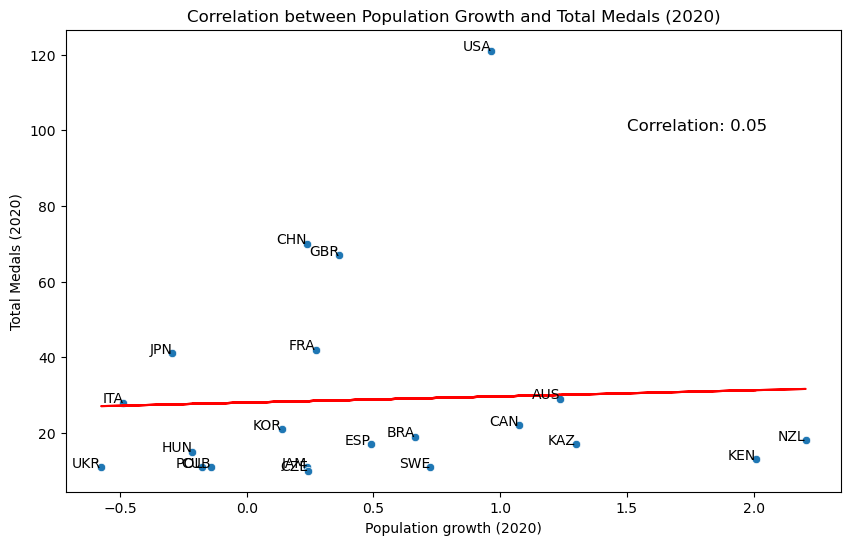

In [92]:
pop_growth_2020_top30 = pop_growth[pop_growth['Country Code'].isin(df_games_medal_tally_2020_top30['country_noc'])]

# Merge the two DataFrames on the 'country_noc' column
merged_data = df_games_medal_tally_2016_top30.merge(pop_growth_2020_top30, left_on='country_noc', right_on='Country Code')

merged_data['2020 [YR2020]'] = pd.to_numeric(merged_data['2020 [YR2020]'], errors='coerce')

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='2020 [YR2020]', y='total')
plt.title('Correlation between Population Growth and Total Medals (2020)')
plt.xlabel('Population growth (2020)')
plt.ylabel('Total Medals (2020)')

# Add country_noc labels to data points
for i, row in merged_data.iterrows():
    plt.text(row['2020 [YR2020]'], row['total'], row['country_noc'], fontsize=10, ha='right')

# Calculate the correlation coefficient
correlation_coefficient = merged_data['2020 [YR2020]'].corr(merged_data['total'])
plt.text(1.5, 100, f'Correlation: {correlation_coefficient:.2f}', fontsize=12)

# Fit and plot a linear regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(merged_data['2020 [YR2020]'], merged_data['total'])
x_values = np.array(merged_data['2020 [YR2020]'])
plt.plot(x_values, intercept + slope * x_values, color='red')

# Show the plot
plt.show()

### Host country

In [93]:
#consider the years after 1988
df_games_after_1988 = df_games[df_games['year'] > 1988]
df_games_after_1988.head()

edition  edition_id   edition_url  year       city  \
24  1992 Summer Olympics          23  /editions/23  1992  Barcelona   
25  1996 Summer Olympics          24  /editions/24  1996    Atlanta   
26  2000 Summer Olympics          25  /editions/25  2000     Sydney   
27  2004 Summer Olympics          26  /editions/26  2004     Athina   
28  2008 Summer Olympics          53  /editions/53  2008    Beijing   

         country_flag_url country_noc    start_date    end_date  \
24  /images/flags/ESP.png         ESP       25 July    9 August   
25  /images/flags/USA.png         USA       19 July    4 August   
26  /images/flags/AUS.png         AUS  15 September   1 October   
27  /images/flags/GRE.png         GRE     13 August   29 August   
28  /images/flags/CHN.png         CHN      8 August   24 August   

             competition_date isHeld  season  
24        24 July –  9 August    NaN  Summer  
25        20 July –  4 August    NaN  Summer  
26  13 September –  1 October    NaN  Summer  
27             11 – 29 August    NaN  Summer  
28              6 – 24 August    NaN  Summer

In [94]:
df_games_medal_tally_after_1988 = df_games_medal_tally[df_games_medal_tally['year'] > 1988]
df_games_medal_tally_after_1988.head()

edition  edition_id  year                     country  \
694  1992 Summer Olympics          23  1992                Unified Team   
695  1992 Summer Olympics          23  1992               United States   
696  1992 Summer Olympics          23  1992                     Germany   
697  1992 Summer Olympics          23  1992  People's Republic of China   
698  1992 Summer Olympics          23  1992                        Cuba   

    country_noc  gold  silver  bronze  total  
694         EUN    45      38      29    112  
695         USA    37      34      37    108  
696         GER    33      21      28     82  
697         CHN    16      22      16     54  
698         CUB    14       6      11     31

In [95]:
merged_df = pd.merge(df_games_medal_tally_after_1988, df_games_after_1988[['edition', 'country_noc']], on='edition', how='inner')
merged_df = merged_df.rename(columns={'country_noc_y': 'host_country'})
merged_df.head()

edition  edition_id  year                     country  \
0  1992 Summer Olympics          23  1992                Unified Team   
1  1992 Summer Olympics          23  1992               United States   
2  1992 Summer Olympics          23  1992                     Germany   
3  1992 Summer Olympics          23  1992  People's Republic of China   
4  1992 Summer Olympics          23  1992                        Cuba   

  country_noc_x  gold  silver  bronze  total host_country  
0           EUN    45      38      29    112          ESP  
1           USA    37      34      37    108          ESP  
2           GER    33      21      28     82          ESP  
3           CHN    16      22      16     54          ESP  
4           CUB    14       6      11     31          ESP

In [96]:
def is_host(row):
    return row['country_noc_x'] == row['host_country']

merged_df['Host'] = merged_df.apply(is_host, axis=1)
host_df = merged_df
host_df.head()

edition  edition_id  year                     country  \
0  1992 Summer Olympics          23  1992                Unified Team   
1  1992 Summer Olympics          23  1992               United States   
2  1992 Summer Olympics          23  1992                     Germany   
3  1992 Summer Olympics          23  1992  People's Republic of China   
4  1992 Summer Olympics          23  1992                        Cuba   

  country_noc_x  gold  silver  bronze  total host_country   Host  
0           EUN    45      38      29    112          ESP  False  
1           USA    37      34      37    108          ESP  False  
2           GER    33      21      28     82          ESP  False  
3           CHN    16      22      16     54          ESP  False  
4           CUB    14       6      11     31          ESP  False

In [97]:
# Get a list of unique countries in the dataframe
unique_countries = merged_df['country_noc_x'].unique()

# Initialize dictionaries to store results
results = []

# Loop through each country
for country in unique_countries:
    # Separate data for the current country
    country_data = merged_df[merged_df['country_noc_x'] == country]
    
    # Separate data for host years and non-host years
    host_years_data = country_data[country_data['Host'] == True]
    non_host_years_data = country_data[country_data['Host'] == False]
    
    # Calculate statistics for host years and non-host years
    mean_medals_host = host_years_data['total'].mean()
    mean_medals_non_host = non_host_years_data['total'].mean()
    
    # Perform a t-test to compare means
    t_stat, p_value = stats.ttest_ind(host_years_data['total'], non_host_years_data['total'], equal_var=False)
    
    # Store results in a dictionary
    result = {
        'Country': country,
        'Mean Medals in Host Years': mean_medals_host,
        'Mean Medals in Non-Host Years': mean_medals_non_host,
        'T-Statistic': t_stat,
        'P-Value': p_value
    }
    
    results.append(result)

# Create a DataFrame to store the results
results_df = pd.DataFrame(results)
results_df

/var/folders/c4/xtbqs4rn3jg2c0ccfbf2bm980000gn/T/ipykernel_10342/3229218189.py:21: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_stat, p_value = stats.ttest_ind(host_years_data['total'], non_host_years_data['total'], equal_var=False)
/Users/farah/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1250: RuntimeWarning: divide by zero encountered in true_divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/Users/farah/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1250: RuntimeWarning: invalid value encountered in double_scalars
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


Country  Mean Medals in Host Years  Mean Medals in Non-Host Years  \
0       EUN                        NaN                      67.500000   
1       USA                       67.5                      61.800000   
2       GER                        NaN                      39.235294   
3       CHN                       57.5                      35.733333   
4       CUB                        NaN                      22.875000   
..      ...                        ...                            ...   
130     SMR                        NaN                       3.000000   
131     TKM                        NaN                       1.000000   
132     BUR                        NaN                       1.000000   
133     LUX                        NaN                       2.000000   
134     LIE                        NaN                       1.000000   

     T-Statistic   P-Value  
0            NaN       NaN  
1       0.160744  0.894254  
2            NaN       NaN  
3       0.502276  0.698574  
4            NaN       NaN  
..           ...       ...  
130          NaN       NaN  
131          NaN       NaN  
132          NaN       NaN  
133          NaN       NaN  
134          NaN       NaN  

[135 rows x 5 columns]

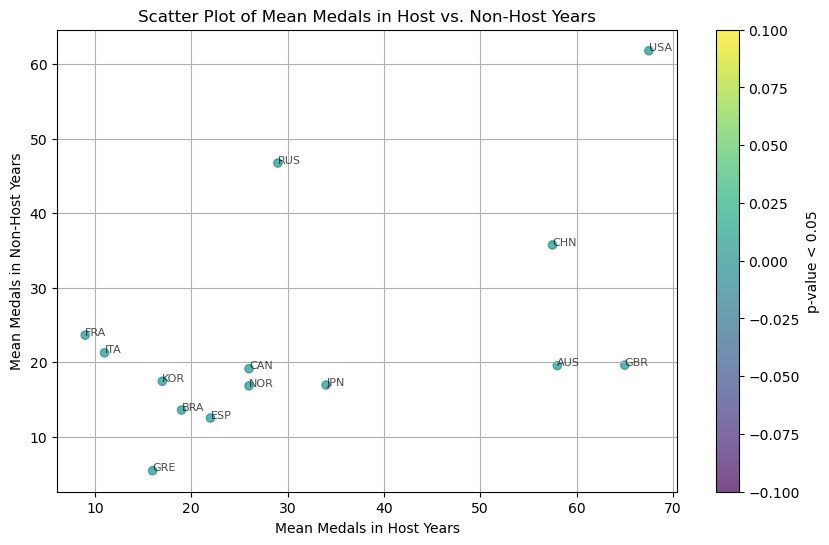

In [98]:
# Create a scatter plot with country labels
plt.figure(figsize=(10, 6))

scatter = plt.scatter(results_df['Mean Medals in Host Years'], results_df['Mean Medals in Non-Host Years'], c=results_df['P-Value'] < 0.05, cmap='viridis', alpha=0.7)

# Add country labels to data points
for i, country in enumerate(results_df['Country']):
    plt.annotate(country, (results_df['Mean Medals in Host Years'].iloc[i], results_df['Mean Medals in Non-Host Years'].iloc[i]), fontsize=8, alpha=0.7)

# Add a colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('p-value < 0.05')

plt.xlabel('Mean Medals in Host Years')
plt.ylabel('Mean Medals in Non-Host Years')
plt.title('Scatter Plot of Mean Medals in Host vs. Non-Host Years')
plt.grid(True)

plt.show()

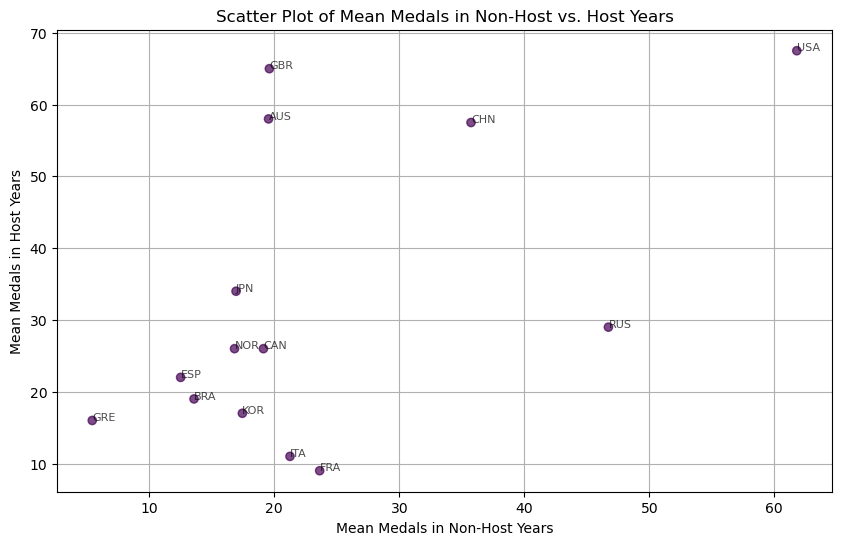

In [99]:
import matplotlib.pyplot as plt

# Create a scatter plot with country labels
plt.figure(figsize=(10, 6))

# Scatter plot of points with the x and y axes swapped
scatter = plt.scatter(
    results_df['Mean Medals in Non-Host Years'],  # Use non-host years on the x-axis
    results_df['Mean Medals in Host Years'],      # Use host years on the y-axis
    c=results_df['P-Value'] < 0.05,
    cmap='viridis',
    alpha=0.7,
)

# Add country labels to data points
for i, country in enumerate(results_df['Country']):
    plt.annotate(country, (results_df['Mean Medals in Non-Host Years'].iloc[i], results_df['Mean Medals in Host Years'].iloc[i]), fontsize=8, alpha=0.7)

# Set the color map to represent p-values
plt.set_cmap('viridis')

plt.xlabel('Mean Medals in Non-Host Years')
plt.ylabel('Mean Medals in Host Years')  # Adjust the y-axis label
plt.title('Scatter Plot of Mean Medals in Non-Host vs. Host Years')
plt.grid(True)

plt.show()


## Prepare the final dataset

In [100]:
df_after_1988 = df_games_medal_tally[df_games_medal_tally['year'] >= 1988]
df_after_1988['season'] = df_after_1988['edition'].apply(extract_season)

def convert_season_to_binary(edition):
    if 'Summer' in edition:
        return 1
    elif 'Winter' in edition:
        return 0
    else:
        return None  # Handle other cases if needed

df_after_1988['season'] = df_after_1988['edition'].apply(convert_season_to_binary)

# Display the DataFrame
df_after_1988.head()

/var/folders/c4/xtbqs4rn3jg2c0ccfbf2bm980000gn/T/ipykernel_10342/2082551883.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_after_1988['season'] = df_after_1988['edition'].apply(extract_season)
/var/folders/c4/xtbqs4rn3jg2c0ccfbf2bm980000gn/T/ipykernel_10342/2082551883.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_after_1988['season'] = df_after_1988['edition'].apply(convert_season_to_binary)


edition  edition_id  year            country country_noc  \
642  1988 Summer Olympics          22  1988       Soviet Union         URS   
643  1988 Summer Olympics          22  1988       East Germany         GDR   
644  1988 Summer Olympics          22  1988      United States         USA   
645  1988 Summer Olympics          22  1988  Republic of Korea         KOR   
646  1988 Summer Olympics          22  1988       West Germany         FRG   

     gold  silver  bronze  total  season  
642    55      31      46    132       1  
643    37      35      30    102       1  
644    36      31      27     94       1  
645    12      10      11     33       1  
646    11      14      15     40       1

In [101]:
# Separate the DataFrame into Summer and Winter
summer_df = df_after_1988[df_after_1988['season'] == 1]
winter_df = df_after_1988[df_after_1988['season'] == 0]

# Sort the DataFrames
summer_df = summer_df.sort_values(by=['edition', 'total'], ascending=[True, False])
winter_df = winter_df.sort_values(by=['edition', 'total'], ascending=[True, False])

# Calculate ranks based on "edition" and "total" medals, ascending order
summer_df['rank_curr'] = summer_df.groupby('edition')['total'].rank(ascending=False, method='min').astype(int)
winter_df['rank_curr'] = winter_df.groupby('edition')['total'].rank(ascending=False, method='min').astype(int)

# Sort the DataFrame by "edition" and "rank" in ascending order
summer_df = summer_df.sort_values(by=['edition', 'rank_curr'])
winter_df = winter_df.sort_values(by=['edition', 'rank_curr'])

summer_df['rank_prev'] = summer_df.groupby('country_noc')['rank_curr'].shift(fill_value=0).astype(int)
summer_df['rank_change'] = summer_df['rank_prev'] - summer_df['rank_curr']

winter_df['rank_prev'] = winter_df.groupby('country_noc')['rank_curr'].shift(fill_value=0).astype(int)
winter_df['rank_change'] = winter_df['rank_prev'] - winter_df['rank_curr']

In [102]:
summer_df.head()

edition  edition_id  year        country country_noc  gold  \
642  1988 Summer Olympics          22  1988   Soviet Union         URS    55   
643  1988 Summer Olympics          22  1988   East Germany         GDR    37   
644  1988 Summer Olympics          22  1988  United States         USA    36   
646  1988 Summer Olympics          22  1988   West Germany         FRG    11   
648  1988 Summer Olympics          22  1988       Bulgaria         BUL    10   

     silver  bronze  total  season  rank_curr  rank_prev  rank_change  
642      31      46    132       1          1          0           -1  
643      35      30    102       1          2          0           -2  
644      31      27     94       1          3          0           -3  
646      14      15     40       1          4          0           -4  
648      12      13     35       1          5          0           -5

In [103]:
winter_df.head()

edition  edition_id  year       country country_noc  gold  \
1538  1988 Winter Olympics          43  1988  Soviet Union         URS    11   
1539  1988 Winter Olympics          43  1988  East Germany         GDR     9   
1540  1988 Winter Olympics          43  1988   Switzerland         SUI     5   
1543  1988 Winter Olympics          43  1988       Austria         AUT     3   
1545  1988 Winter Olympics          43  1988  West Germany         FRG     2   

      silver  bronze  total  season  rank_curr  rank_prev  rank_change  
1538       9       9     29       0          1          0           -1  
1539      10       6     25       0          2          0           -2  
1540       5       5     15       0          3          0           -3  
1543       5       2     10       0          4          0           -4  
1545       4       2      8       0          5          0           -5

##### Obtain the total count of athletes for each olympic edition

In [104]:
#fetch athelets and events dataset for year>1988
df_athlete_event_results['year'] = df_athlete_event_results['edition'].str.extract('(\d{4})', expand=False).astype(int)
df_athlete_event_results_after_1988 = df_athlete_event_results[df_athlete_event_results['year'] >= 1988]
df_athlete_event_results_after_1988['season'] = df_athlete_event_results_after_1988['edition'].apply(convert_season_to_binary)

# Group by 'edition' and 'country' and count unique 'athlete_id's
athlete_counts = df_athlete_event_results_after_1988.groupby(['edition', 'country_noc','season'])['athlete_id'].nunique().reset_index()

# Rename the count column
athlete_counts.rename(columns={'athlete_id': 'athlete_total_curr'}, inplace=True)
athlete_counts.head()

/var/folders/c4/xtbqs4rn3jg2c0ccfbf2bm980000gn/T/ipykernel_10342/3148433326.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_athlete_event_results_after_1988['season'] = df_athlete_event_results_after_1988['edition'].apply(convert_season_to_binary)


edition country_noc  season  athlete_total_curr
0  1988 Summer Olympics         AFG       1                   5
1  1988 Summer Olympics         AHO       1                   3
2  1988 Summer Olympics         ALG       1                  45
3  1988 Summer Olympics         AND       1                   3
4  1988 Summer Olympics         ANG       1                  25

In [105]:
summer_df = summer_df.merge(athlete_counts, on=['edition', 'country_noc','season'], how='left')
winter_df = winter_df.merge(athlete_counts, on=['edition', 'country_noc','season'], how='left')

In [106]:
# final_df = merging_host.merge(athlete_counts, on=['edition', 'country_noc'], how='left')
# final_df.head()

###### Obtain total count of athletes for the previous edition for each olympic edition

In [107]:
summer_df.sort_values(['edition', 'year'], ascending=True, inplace=True)
summer_df['athlete_total_prev'] = summer_df.groupby('country')['athlete_total_curr'].shift(fill_value=0)
summer_df.reset_index(drop=True, inplace=True)
summer_df.head()

edition  edition_id  year        country country_noc  gold  \
0  1988 Summer Olympics          22  1988   Soviet Union         URS    55   
1  1988 Summer Olympics          22  1988   East Germany         GDR    37   
2  1988 Summer Olympics          22  1988  United States         USA    36   
3  1988 Summer Olympics          22  1988   West Germany         FRG    11   
4  1988 Summer Olympics          22  1988       Bulgaria         BUL    10   

   silver  bronze  total  season  rank_curr  rank_prev  rank_change  \
0      31      46    132       1          1          0           -1   
1      35      30    102       1          2          0           -2   
2      31      27     94       1          3          0           -3   
3      14      15     40       1          4          0           -4   
4      12      13     35       1          5          0           -5   

   athlete_total_curr  athlete_total_prev  
0                 487                   0  
1                 263                   0  
2                 583                   0  
3                 369                   0  
4                 172                   0

In [108]:
winter_df.sort_values(['edition', 'year'], ascending=True, inplace=True)
winter_df['athlete_total_prev'] = winter_df.groupby('country')['athlete_total_curr'].shift(fill_value=0)
winter_df.reset_index(drop=True, inplace=True)
winter_df.head()

edition  edition_id  year       country country_noc  gold  \
0  1988 Winter Olympics          43  1988  Soviet Union         URS    11   
1  1988 Winter Olympics          43  1988  East Germany         GDR     9   
2  1988 Winter Olympics          43  1988   Switzerland         SUI     5   
3  1988 Winter Olympics          43  1988       Austria         AUT     3   
4  1988 Winter Olympics          43  1988  West Germany         FRG     2   

   silver  bronze  total  season  rank_curr  rank_prev  rank_change  \
0       9       9     29       0          1          0           -1   
1      10       6     25       0          2          0           -2   
2       5       5     15       0          3          0           -3   
3       5       2     10       0          4          0           -4   
4       4       2      8       0          5          0           -5   

   athlete_total_curr  athlete_total_prev  
0                 110                   0  
1                  54                   0  
2                  87                   0  
3                  91                   0  
4                 106                   0

##### Obtain the total count of unique sports for each olympic edition

In [109]:
# Group by 'edition' and 'country_noc' and count the unique sports
sports_count = df_athlete_event_results_after_1988.groupby(['edition', 'country_noc','season'])['sport'].nunique().reset_index()
sports_count = sports_count.rename(columns={'sport': 'sports_total_curr'})

sports_count.head()

edition country_noc  season  sports_total_curr
0  1988 Summer Olympics         AFG       1                  1
1  1988 Summer Olympics         AHO       1                  3
2  1988 Summer Olympics         ALG       1                  7
3  1988 Summer Olympics         AND       1                  2
4  1988 Summer Olympics         ANG       1                  4

In [110]:
summer_df = summer_df.merge(sports_count, on=['edition', 'country_noc','season'], how='left')
winter_df = winter_df.merge(sports_count, on=['edition', 'country_noc','season'], how='left')

In [111]:
summer_df.head()

edition  edition_id  year        country country_noc  gold  \
0  1988 Summer Olympics          22  1988   Soviet Union         URS    55   
1  1988 Summer Olympics          22  1988   East Germany         GDR    37   
2  1988 Summer Olympics          22  1988  United States         USA    36   
3  1988 Summer Olympics          22  1988   West Germany         FRG    11   
4  1988 Summer Olympics          22  1988       Bulgaria         BUL    10   

   silver  bronze  total  season  rank_curr  rank_prev  rank_change  \
0      31      46    132       1          1          0           -1   
1      35      30    102       1          2          0           -2   
2      31      27     94       1          3          0           -3   
3      14      15     40       1          4          0           -4   
4      12      13     35       1          5          0           -5   

   athlete_total_curr  athlete_total_prev  sports_total_curr  
0                 487                   0                 29  
1                 263                   0                 17  
2                 583                   0                 33  
3                 369                   0                 29  
4                 172                   0                 16

In [112]:
winter_df.head()

edition  edition_id  year       country country_noc  gold  \
0  1988 Winter Olympics          43  1988  Soviet Union         URS    11   
1  1988 Winter Olympics          43  1988  East Germany         GDR     9   
2  1988 Winter Olympics          43  1988   Switzerland         SUI     5   
3  1988 Winter Olympics          43  1988       Austria         AUT     3   
4  1988 Winter Olympics          43  1988  West Germany         FRG     2   

   silver  bronze  total  season  rank_curr  rank_prev  rank_change  \
0       9       9     29       0          1          0           -1   
1      10       6     25       0          2          0           -2   
2       5       5     15       0          3          0           -3   
3       5       2     10       0          4          0           -4   
4       4       2      8       0          5          0           -5   

   athlete_total_curr  athlete_total_prev  sports_total_curr  
0                 110                   0                 12  
1                  54                   0                  8  
2                  87                   0                  9  
3                  91                   0                 11  
4                 106                   0                 12

In [113]:
# final_df = final_df.merge(sports_count, on=['edition', 'country_noc'], how='left')
# final_df.head()

###### Obtain total count of sports for the previous edition for each olympic edition

In [114]:
summer_df.sort_values(['edition', 'year'], ascending=True, inplace=True)
summer_df['sports_total_prev'] = summer_df.groupby('country')['sports_total_curr'].shift(fill_value=0)
summer_df.reset_index(drop=True, inplace=True)
summer_df.head()

edition  edition_id  year        country country_noc  gold  \
0  1988 Summer Olympics          22  1988   Soviet Union         URS    55   
1  1988 Summer Olympics          22  1988   East Germany         GDR    37   
2  1988 Summer Olympics          22  1988  United States         USA    36   
3  1988 Summer Olympics          22  1988   West Germany         FRG    11   
4  1988 Summer Olympics          22  1988       Bulgaria         BUL    10   

   silver  bronze  total  season  rank_curr  rank_prev  rank_change  \
0      31      46    132       1          1          0           -1   
1      35      30    102       1          2          0           -2   
2      31      27     94       1          3          0           -3   
3      14      15     40       1          4          0           -4   
4      12      13     35       1          5          0           -5   

   athlete_total_curr  athlete_total_prev  sports_total_curr  \
0                 487                   0                 29   
1                 263                   0                 17   
2                 583                   0                 33   
3                 369                   0                 29   
4                 172                   0                 16   

   sports_total_prev  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0

In [115]:
winter_df.sort_values(['edition', 'year'], ascending=True, inplace=True)
winter_df['sports_total_prev'] = winter_df.groupby('country')['sports_total_curr'].shift(fill_value=0)
winter_df.reset_index(drop=True, inplace=True)
winter_df.head()

edition  edition_id  year       country country_noc  gold  \
0  1988 Winter Olympics          43  1988  Soviet Union         URS    11   
1  1988 Winter Olympics          43  1988  East Germany         GDR     9   
2  1988 Winter Olympics          43  1988   Switzerland         SUI     5   
3  1988 Winter Olympics          43  1988       Austria         AUT     3   
4  1988 Winter Olympics          43  1988  West Germany         FRG     2   

   silver  bronze  total  season  rank_curr  rank_prev  rank_change  \
0       9       9     29       0          1          0           -1   
1      10       6     25       0          2          0           -2   
2       5       5     15       0          3          0           -3   
3       5       2     10       0          4          0           -4   
4       4       2      8       0          5          0           -5   

   athlete_total_curr  athlete_total_prev  sports_total_curr  \
0                 110                   0                 12   
1                  54                   0                  8   
2                  87                   0                  9   
3                  91                   0                 11   
4                 106                   0                 12   

   sports_total_prev  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0

In [116]:
#combine the two data frames and sort by edition, year, total medals
combined_df = pd.concat([summer_df, winter_df])

# Sort the combined DataFrame by edition, year, and total medals
combined_df = combined_df.sort_values(by=['edition', 'year', 'total'], ascending=[True, True, False])

# Reset the index
combined_df = combined_df.reset_index(drop=True)

In [117]:
combined_df.head()

edition  edition_id  year        country country_noc  gold  \
0  1988 Summer Olympics          22  1988   Soviet Union         URS    55   
1  1988 Summer Olympics          22  1988   East Germany         GDR    37   
2  1988 Summer Olympics          22  1988  United States         USA    36   
3  1988 Summer Olympics          22  1988   West Germany         FRG    11   
4  1988 Summer Olympics          22  1988       Bulgaria         BUL    10   

   silver  bronze  total  season  rank_curr  rank_prev  rank_change  \
0      31      46    132       1          1          0           -1   
1      35      30    102       1          2          0           -2   
2      31      27     94       1          3          0           -3   
3      14      15     40       1          4          0           -4   
4      12      13     35       1          5          0           -5   

   athlete_total_curr  athlete_total_prev  sports_total_curr  \
0                 487                   0                 29   
1                 263                   0                 17   
2                 583                   0                 33   
3                 369                   0                 29   
4                 172                   0                 16   

   sports_total_prev  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0

In [118]:
#drop year=1988
combined_df = combined_df[combined_df['year'] != 1988]

#drop unwanted columns
combined_df.drop(['gold', 'silver', 'bronze'], axis=1, inplace=True)
combined_df.head()

edition  edition_id  year                     country  \
69  1992 Summer Olympics          23  1992                Unified Team   
70  1992 Summer Olympics          23  1992               United States   
71  1992 Summer Olympics          23  1992                     Germany   
72  1992 Summer Olympics          23  1992  People's Republic of China   
73  1992 Summer Olympics          23  1992                        Cuba   

   country_noc  total  season  rank_curr  rank_prev  rank_change  \
69         EUN    112       1          1          0           -1   
70         USA    108       1          2          3            1   
71         GER     82       1          3          0           -3   
72         CHN     54       1          4          7            3   
73         CUB     31       1          5          0           -5   

    athlete_total_curr  athlete_total_prev  sports_total_curr  \
69                 484                   0                 31   
70                 571                 583                 34   
71                 479                   0                 32   
72                 245                 294                 24   
73                 185                   0                 17   

    sports_total_prev  
69                  0  
70                 33  
71                  0  
72                 27  
73                  0

##### Adding host information

In [119]:
host_df_subset = host_df[['edition', 'country','Host']]
combined_df = pd.merge(combined_df, host_df_subset, on=['edition', 'country'], how='left')
combined_df.head()

edition  edition_id  year                     country  \
0  1992 Summer Olympics          23  1992                Unified Team   
1  1992 Summer Olympics          23  1992               United States   
2  1992 Summer Olympics          23  1992                     Germany   
3  1992 Summer Olympics          23  1992  People's Republic of China   
4  1992 Summer Olympics          23  1992                        Cuba   

  country_noc  total  season  rank_curr  rank_prev  rank_change  \
0         EUN    112       1          1          0           -1   
1         USA    108       1          2          3            1   
2         GER     82       1          3          0           -3   
3         CHN     54       1          4          7            3   
4         CUB     31       1          5          0           -5   

   athlete_total_curr  athlete_total_prev  sports_total_curr  \
0                 484                   0                 31   
1                 571                 583                 34   
2                 479                   0                 32   
3                 245                 294                 24   
4                 185                   0                 17   

   sports_total_prev   Host  
0                  0  False  
1                 33  False  
2                  0  False  
3                 27  False  
4                  0  False

In [120]:
final_df = combined_df

##### Adding popular indicators from world bank data

In [121]:
df_popular_indicators3 = pd.read_csv('/Users/farah/Documents/Jupyter Repository/archive/P_Popular Indicators (3)/p_popular_indicators3.csv')
df_popular_indicators3.head()

Series Name  Series Code    Country Name Country Code 1991 [YR1991]  \
0  Population, total  SP.POP.TOTL     Afghanistan          AFG      10745167   
1  Population, total  SP.POP.TOTL         Albania          ALB       3266790   
2  Population, total  SP.POP.TOTL         Algeria          DZA      26133905   
3  Population, total  SP.POP.TOTL  American Samoa          ASM         48992   
4  Population, total  SP.POP.TOTL         Andorra          AND         55434   

  1992 [YR1992] 1993 [YR1993] 1994 [YR1994] 1995 [YR1995] 1996 [YR1996]  ...  \
0      12057433      14003760      15455555      16418912      17106595  ...   
1       3247039       3227287       3207536       3187784       3168033  ...   
2      26748303      27354327      27937006      28478022      28984634  ...   
3         50078         51174         52288         53401         54500  ...   
4         57283         59156         61037         62928         64147  ...   

  2013 [YR2013] 2014 [YR2014] 2015 [YR2015] 2016 [YR2016] 2017 [YR2017]  \
0      31541209      32716210      33753499      34636207      35643418   
1       2895092       2889104       2880703       2876101       2873457   
2      38000626      38760168      39543154      40339329      41136546   
3         52995         52217         51368         50448         49463   
4         71367         71621         71746         72540         73837   

  2018 [YR2018] 2019 [YR2019] 2020 [YR2020] 2021 [YR2021] 2022 [YR2022]  
0      36686784      37769499      38972230      40099462      41128771  
1       2866376       2854191       2837849       2811666       2775634  
2      41927007      42705368      43451666      44177969      44903225  
3         48424         47321         46189         45035         44273  
4         75013         76343         77700         79034         79824  

[5 rows x 36 columns]

##### Adding GDP per capita information for each country-year of the olympics

In [122]:
missing_series_name = df_popular_indicators3['Series Name'].isna()
df_gdp_per_capita = df_popular_indicators3[~missing_series_name & df_popular_indicators3['Series Name'].str.contains("GDP per capita (current US$)", regex=False)]
df_gdp_per_capita = df_gdp_per_capita.melt(id_vars=['Country Code', 'Country Name'], var_name='Year', value_name='gdp_per_capita')

# Extract the year from the 'Year' column
df_gdp_per_capita['Year'] = df_gdp_per_capita['Year'].str.extract(r'(\d{4})').astype(float).astype(pd.Int64Dtype())  # Convert to Nullable integer type
df_gdp_per_capita.head()

Country Code    Country Name  Year                gdp_per_capita
0          AFG     Afghanistan  <NA>  GDP per capita (current US$)
1          ALB         Albania  <NA>  GDP per capita (current US$)
2          DZA         Algeria  <NA>  GDP per capita (current US$)
3          ASM  American Samoa  <NA>  GDP per capita (current US$)
4          AND         Andorra  <NA>  GDP per capita (current US$)

##### Adding GDP per capita information for each country-year of the olympics

In [123]:
final_df = final_df.merge(df_gdp_per_capita, left_on=['country_noc', 'year'], right_on=['Country Code', 'Year'], how='left')

# Identify rows where the merge didn't match
unmatched_rows = final_df['gdp_per_capita'].isnull()

# For unmatched rows, try to merge based on 'country name' and 'year'
unmatched_rows_df = final_df.loc[unmatched_rows]
for index, row in unmatched_rows_df.iterrows():
    matching_rows = df_gdp_per_capita[
        (df_gdp_per_capita['Country Name'] == row['country']) & (df_gdp_per_capita['Year'] == row['year'])
    ]
    if not matching_rows.empty:
        final_df.at[index, 'gdp_per_capita'] = matching_rows.iloc[0]['gdp_per_capita']
        

# Drop the redundant columns
final_df.drop(['Country Code', 'Country Name','Year'], axis=1, inplace=True)        
final_df.head()

edition  edition_id  year                     country  \
0  1992 Summer Olympics          23  1992                Unified Team   
1  1992 Summer Olympics          23  1992               United States   
2  1992 Summer Olympics          23  1992                     Germany   
3  1992 Summer Olympics          23  1992  People's Republic of China   
4  1992 Summer Olympics          23  1992                        Cuba   

  country_noc  total  season  rank_curr  rank_prev  rank_change  \
0         EUN    112       1          1          0           -1   
1         USA    108       1          2          3            1   
2         GER     82       1          3          0           -3   
3         CHN     54       1          4          7            3   
4         CUB     31       1          5          0           -5   

   athlete_total_curr  athlete_total_prev  sports_total_curr  \
0                 484                   0                 31   
1                 571                 583                 34   
2                 479                   0                 32   
3                 245                 294                 24   
4                 185                   0                 17   

   sports_total_prev   Host    gdp_per_capita  
0                  0  False               NaN  
1                 33  False  25418.9907763319  
2                  0  False  26438.2303888417  
3                 27  False  366.460692306116  
4                  0  False  2048.06883870462

##### Adding GDP annual growth information for each country-year of the olympics

In [124]:
#GDP growth (annual %)
df_gdp_growth = df_popular_indicators3[~missing_series_name & df_popular_indicators3['Series Name'].str.contains("GDP growth (annual %)", regex=False)]
df_gdp_growth = df_gdp_growth.melt(id_vars=['Country Code', 'Country Name'], var_name='Year', value_name='gdp_growth')

# Extract the year from the 'Year' column
df_gdp_growth['Year'] = df_gdp_growth['Year'].str.extract(r'(\d{4})').astype(float).astype(pd.Int64Dtype())  # Convert to Nullable integer type
df_gdp_growth.head()

Country Code    Country Name  Year             gdp_growth
0          AFG     Afghanistan  <NA>  GDP growth (annual %)
1          ALB         Albania  <NA>  GDP growth (annual %)
2          DZA         Algeria  <NA>  GDP growth (annual %)
3          ASM  American Samoa  <NA>  GDP growth (annual %)
4          AND         Andorra  <NA>  GDP growth (annual %)

In [125]:
final_df = final_df.merge(df_gdp_growth, left_on=['country_noc', 'year'], right_on=['Country Code', 'Year'], how='left')

# Identify rows where the merge didn't match
unmatched_rows = final_df['gdp_growth'].isnull()

# For unmatched rows, try to merge based on 'country name' and 'year'
unmatched_rows_df = final_df.loc[unmatched_rows]
for index, row in unmatched_rows_df.iterrows():
    matching_rows = df_gdp_growth[
        (df_gdp_growth['Country Name'] == row['country']) & (df_gdp_growth['Year'] == row['year'])
    ]
    if not matching_rows.empty:
        final_df.at[index, 'gdp_growth'] = matching_rows.iloc[0]['gdp_growth']
        
# Drop the redundant columns
final_df.drop(['Country Code', 'Country Name','Year'], axis=1, inplace=True)
final_df.head()

edition  edition_id  year                     country  \
0  1992 Summer Olympics          23  1992                Unified Team   
1  1992 Summer Olympics          23  1992               United States   
2  1992 Summer Olympics          23  1992                     Germany   
3  1992 Summer Olympics          23  1992  People's Republic of China   
4  1992 Summer Olympics          23  1992                        Cuba   

  country_noc  total  season  rank_curr  rank_prev  rank_change  \
0         EUN    112       1          1          0           -1   
1         USA    108       1          2          3            1   
2         GER     82       1          3          0           -3   
3         CHN     54       1          4          7            3   
4         CUB     31       1          5          0           -5   

   athlete_total_curr  athlete_total_prev  sports_total_curr  \
0                 484                   0                 31   
1                 571                 583                 34   
2                 479                   0                 32   
3                 245                 294                 24   
4                 185                   0                 17   

   sports_total_prev   Host    gdp_per_capita         gdp_growth  
0                  0  False               NaN                NaN  
1                 33  False  25418.9907763319   3.52244052740502  
2                  0  False  26438.2303888417     1.923076559054  
3                 27  False  366.460692306116   14.2245295931824  
4                  0  False  2048.06883870462  -11.5806030812698

##### Adding GDP current information for each country-year of the olympics

In [126]:
df_gdp_current = df_popular_indicators3[~missing_series_name & df_popular_indicators3['Series Name'].str.contains("GDP (current US$)", regex=False)]
df_gdp_current = df_gdp_current.melt(id_vars=['Country Code','Country Name'], var_name='Year', value_name='gdp_current')

# Extract the year from the 'Year' column
df_gdp_current['Year'] = df_gdp_current['Year'].str.extract(r'(\d{4})').astype(float).astype(pd.Int64Dtype())  # Convert to Nullable integer type
df_gdp_current.head()

final_df = final_df.merge(df_gdp_current, left_on=['country_noc', 'year'], right_on=['Country Code', 'Year'], how='left')

# Identify rows where the merge didn't match
unmatched_rows = final_df['gdp_current'].isnull()

# For unmatched rows, try to merge based on 'country name' and 'year'
unmatched_rows_df = final_df.loc[unmatched_rows]
for index, row in unmatched_rows_df.iterrows():
    matching_rows = df_gdp_current[
        (df_gdp_current['Country Name'] == row['country']) & (df_gdp_current['Year'] == row['year'])
    ]
    if not matching_rows.empty:
        final_df.at[index, 'gdp_current'] = matching_rows.iloc[0]['gdp_current']
        
        
# Drop the redundant columns
final_df.drop(['Country Code', 'Country Name','Year'], axis=1, inplace=True)       
final_df.head()

edition  edition_id  year                     country  \
0  1992 Summer Olympics          23  1992                Unified Team   
1  1992 Summer Olympics          23  1992               United States   
2  1992 Summer Olympics          23  1992                     Germany   
3  1992 Summer Olympics          23  1992  People's Republic of China   
4  1992 Summer Olympics          23  1992                        Cuba   

  country_noc  total  season  rank_curr  rank_prev  rank_change  \
0         EUN    112       1          1          0           -1   
1         USA    108       1          2          3            1   
2         GER     82       1          3          0           -3   
3         CHN     54       1          4          7            3   
4         CUB     31       1          5          0           -5   

   athlete_total_curr  athlete_total_prev  sports_total_curr  \
0                 484                   0                 31   
1                 571                 583                 34   
2                 479                   0                 32   
3                 245                 294                 24   
4                 185                   0                 17   

   sports_total_prev   Host    gdp_per_capita         gdp_growth  \
0                  0  False               NaN                NaN   
1                 33  False  25418.9907763319   3.52244052740502   
2                  0  False  26438.2303888417     1.923076559054   
3                 27  False  366.460692306116   14.2245295931824   
4                  0  False  2048.06883870462  -11.5806030812698   

        gdp_current  
0               NaN  
1     6520327000000  
2  2131571696931.75  
3  426915712715.856  
4  22085858243.2432

##### Adding total population information to the country-year of the olympics

In [127]:
df_pop_total = df_popular_indicators3[~missing_series_name & df_popular_indicators3['Series Name'].str.contains("Population, total", regex=False)]
df_pop_total = df_pop_total.melt(id_vars=['Country Code','Country Name'], var_name='Year', value_name='pop_total')

# Extract the year from the 'Year' column
df_pop_total['Year'] = df_pop_total['Year'].str.extract(r'(\d{4})').astype(float).astype(pd.Int64Dtype())  # Convert to Nullable integer type

final_df = final_df.merge(df_pop_total, left_on=['country_noc', 'year'], right_on=['Country Code', 'Year'], how='left')

# Identify rows where the merge didn't match
unmatched_rows = final_df['pop_total'].isnull()

# For unmatched rows, try to merge based on 'country name' and 'year'
unmatched_rows_df = final_df.loc[unmatched_rows]
for index, row in unmatched_rows_df.iterrows():
    matching_rows = df_pop_total[
        (df_pop_total['Country Name'] == row['country']) & (df_pop_total['Year'] == row['year'])
    ]
    if not matching_rows.empty:
        final_df.at[index, 'pop_total'] = matching_rows.iloc[0]['pop_total']
        
# Drop the redundant columns
final_df.drop(['Country Code', 'Country Name','Year'], axis=1, inplace=True)
final_df.head()

edition  edition_id  year                     country  \
0  1992 Summer Olympics          23  1992                Unified Team   
1  1992 Summer Olympics          23  1992               United States   
2  1992 Summer Olympics          23  1992                     Germany   
3  1992 Summer Olympics          23  1992  People's Republic of China   
4  1992 Summer Olympics          23  1992                        Cuba   

  country_noc  total  season  rank_curr  rank_prev  rank_change  \
0         EUN    112       1          1          0           -1   
1         USA    108       1          2          3            1   
2         GER     82       1          3          0           -3   
3         CHN     54       1          4          7            3   
4         CUB     31       1          5          0           -5   

   athlete_total_curr  athlete_total_prev  sports_total_curr  \
0                 484                   0                 31   
1                 571                 583                 34   
2                 479                   0                 32   
3                 245                 294                 24   
4                 185                   0                 17   

   sports_total_prev   Host    gdp_per_capita         gdp_growth  \
0                  0  False               NaN                NaN   
1                 33  False  25418.9907763319   3.52244052740502   
2                  0  False  26438.2303888417     1.923076559054   
3                 27  False  366.460692306116   14.2245295931824   
4                  0  False  2048.06883870462  -11.5806030812698   

        gdp_current   pop_total  
0               NaN         NaN  
1     6520327000000   256514000  
2  2131571696931.75    80624598  
3  426915712715.856  1164970000  
4  22085858243.2432    10783748

##### Adding population growth information to the country-year of the olympics

In [128]:
df_pop_growth = df_popular_indicators3[~missing_series_name & df_popular_indicators3['Series Name'].str.contains("Population growth (annual %)", regex=False)]
df_pop_growth = df_pop_growth.melt(id_vars=['Country Code','Country Name'], var_name='Year', value_name='pop_growth')

# Extract the year from the 'Year' column
df_pop_growth['Year'] = df_pop_growth['Year'].str.extract(r'(\d{4})').astype(float).astype(pd.Int64Dtype())  # Convert to Nullable integer type

final_df = final_df.merge(df_pop_growth, left_on=['country_noc', 'year'], right_on=['Country Code', 'Year'], how='left')
# Identify rows where the merge didn't match
unmatched_rows = final_df['pop_growth'].isnull()

# For unmatched rows, try to merge based on 'country name' and 'year'
unmatched_rows_df = final_df.loc[unmatched_rows]
for index, row in unmatched_rows_df.iterrows():
    matching_rows = df_pop_growth[
        (df_pop_growth['Country Name'] == row['country']) & (df_pop_growth['Year'] == row['year'])
    ]
    if not matching_rows.empty:
        final_df.at[index, 'pop_growth'] = matching_rows.iloc[0]['pop_growth']
        

# Drop the redundant columns
final_df.drop(['Country Code', 'Country Name','Year'], axis=1, inplace=True)        
final_df.head()

edition  edition_id  year                     country  \
0  1992 Summer Olympics          23  1992                Unified Team   
1  1992 Summer Olympics          23  1992               United States   
2  1992 Summer Olympics          23  1992                     Germany   
3  1992 Summer Olympics          23  1992  People's Republic of China   
4  1992 Summer Olympics          23  1992                        Cuba   

  country_noc  total  season  rank_curr  rank_prev  rank_change  \
0         EUN    112       1          1          0           -1   
1         USA    108       1          2          3            1   
2         GER     82       1          3          0           -3   
3         CHN     54       1          4          7            3   
4         CUB     31       1          5          0           -5   

   athlete_total_curr  athlete_total_prev  sports_total_curr  \
0                 484                   0                 31   
1                 571                 583                 34   
2                 479                   0                 32   
3                 245                 294                 24   
4                 185                   0                 17   

   sports_total_prev   Host    gdp_per_capita         gdp_growth  \
0                  0  False               NaN                NaN   
1                 33  False  25418.9907763319   3.52244052740502   
2                  0  False  26438.2303888417     1.923076559054   
3                 27  False  366.460692306116   14.2245295931824   
4                  0  False  2048.06883870462  -11.5806030812698   

        gdp_current   pop_total         pop_growth  
0               NaN         NaN                NaN  
1     6520327000000   256514000   1.38688569247935  
2  2131571696931.75    80624598  0.760346946721127  
3  426915712715.856  1164970000    1.2255362283362  
4  22085858243.2432    10783748  0.650643577416863

In [129]:
#move target variables to the end
columns = final_df.columns.tolist()
new_column_order = columns[:7] + columns[10:] + columns[7:10]

# Reorder the DataFrame columns
final_df = final_df[new_column_order]
final_df.head()

edition  edition_id  year                     country  \
0  1992 Summer Olympics          23  1992                Unified Team   
1  1992 Summer Olympics          23  1992               United States   
2  1992 Summer Olympics          23  1992                     Germany   
3  1992 Summer Olympics          23  1992  People's Republic of China   
4  1992 Summer Olympics          23  1992                        Cuba   

  country_noc  total  season  athlete_total_curr  athlete_total_prev  \
0         EUN    112       1                 484                   0   
1         USA    108       1                 571                 583   
2         GER     82       1                 479                   0   
3         CHN     54       1                 245                 294   
4         CUB     31       1                 185                   0   

   sports_total_curr  sports_total_prev   Host    gdp_per_capita  \
0                 31                  0  False               NaN   
1                 34                 33  False  25418.9907763319   
2                 32                  0  False  26438.2303888417   
3                 24                 27  False  366.460692306116   
4                 17                  0  False  2048.06883870462   

          gdp_growth       gdp_current   pop_total         pop_growth  \
0                NaN               NaN         NaN                NaN   
1   3.52244052740502     6520327000000   256514000   1.38688569247935   
2     1.923076559054  2131571696931.75    80624598  0.760346946721127   
3   14.2245295931824  426915712715.856  1164970000    1.2255362283362   
4  -11.5806030812698  22085858243.2432    10783748  0.650643577416863   

   rank_curr  rank_prev  rank_change  
0          1          0           -1  
1          2          3            1  
2          3          0           -3  
3          4          7            3  
4          5          0           -5

In [130]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 876 entries, 0 to 875
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   edition             876 non-null    object
 1   edition_id          876 non-null    int64 
 2   year                876 non-null    object
 3   country             876 non-null    object
 4   country_noc         876 non-null    object
 5   total               876 non-null    int64 
 6   season              876 non-null    int64 
 7   athlete_total_curr  876 non-null    int64 
 8   athlete_total_prev  876 non-null    int64 
 9   sports_total_curr   876 non-null    int64 
 10  sports_total_prev   876 non-null    int64 
 11  Host                876 non-null    bool  
 12  gdp_per_capita      837 non-null    object
 13  gdp_growth          837 non-null    object
 14  gdp_current         837 non-null    object
 15  pop_total           837 non-null    object
 16  pop_growth          837 no

In [131]:
stored_df = final_df

### Regression analysis
##### - do a correlation analysis between all independent variables
##### - do log transformation

In [132]:
# Check for missing values (NaN)
missing_values = final_df.isnull().sum()
missing_values = pd.DataFrame(missing_values)

# Format the DataFrame as a nicely formatted table
missing_values = missing_values.to_string(header=None)

# Print the formatted table
print("Missing Values:")
print(missing_values)


Missing Values:
edition              0
edition_id           0
year                 0
country              0
country_noc          0
total                0
season               0
athlete_total_curr   0
athlete_total_prev   0
sports_total_curr    0
sports_total_prev    0
Host                 0
gdp_per_capita      39
gdp_growth          39
gdp_current         39
pop_total           39
pop_growth          39
rank_curr            0
rank_prev            0
rank_change          0


In [133]:
# Check for infinite values (inf)
infinite_values = final_df.replace([np.inf, -np.inf], np.nan).isnull().sum()
print("Infinite Values:")
print(infinite_values)

Infinite Values:
edition                0
edition_id             0
year                   0
country                0
country_noc            0
total                  0
season                 0
athlete_total_curr     0
athlete_total_prev     0
sports_total_curr      0
sports_total_prev      0
Host                   0
gdp_per_capita        39
gdp_growth            39
gdp_current           39
pop_total             39
pop_growth            39
rank_curr              0
rank_prev              0
rank_change            0
dtype: int64


In [134]:
rows_with_missing_values = final_df[final_df.isnull().any(axis=1)]
rows_with_missing_values

edition  edition_id  year                       country  \
0    1992 Summer Olympics          23  1992                  Unified Team   
22   1992 Summer Olympics          23  1992                Czechoslovakia   
36   1992 Summer Olympics          23  1992  Independent Olympic Athletes   
37   1992 Summer Olympics          23  1992      Islamic Republic of Iran   
50   1992 Summer Olympics          23  1992                Chinese Taipei   
63   1992 Summer Olympics          23  1992                   The Bahamas   
65   1992 Winter Olympics          44  1992                  Unified Team   
79   1992 Winter Olympics          44  1992                Czechoslovakia   
145  1996 Summer Olympics          24  1996         Serbia and Montenegro   
148  1996 Summer Olympics          24  1996      Islamic Republic of Iran   
170  1996 Summer Olympics          24  1996                Chinese Taipei   
173  1996 Summer Olympics          24  1996                   The Bahamas   
249  2000 Summer Olympics          25  2000                Chinese Taipei   
251  2000 Summer Olympics          25  2000      Islamic Republic of Iran   
259  2000 Summer Olympics          25  2000                   The Bahamas   
262  2000 Summer Olympics          25  2000         Serbia and Montenegro   
267  2000 Summer Olympics          25  2000       Kingdom of Saudi Arabia   
345  2004 Summer Olympics          26  2004      Islamic Republic of Iran   
350  2004 Summer Olympics          26  2004                Chinese Taipei   
371  2004 Summer Olympics          26  2004                   The Bahamas   
373  2004 Summer Olympics          26  2004         Serbia and Montenegro   
460  2008 Summer Olympics          53  2008                Chinese Taipei   
476  2008 Summer Olympics          53  2008      Islamic Republic of Iran   
480  2008 Summer Olympics          53  2008                   The Bahamas   
543  2012 Summer Olympics          54  2012      Islamic Republic of Iran   
583  2012 Summer Olympics          54  2012                Chinese Taipei   
595  2012 Summer Olympics          54  2012                   The Bahamas   
607  2012 Summer Olympics          54  2012       Kingdom of Saudi Arabia   
669  2016 Summer Olympics          59  2016      Islamic Republic of Iran   
689  2016 Summer Olympics          59  2016                Chinese Taipei   
697  2016 Summer Olympics          59  2016  Independent Olympic Athletes   
698  2016 Summer Olympics          59  2016                   The Bahamas   
730  2018 Winter Olympics          60  2018                           ROC   
756  2020 Summer Olympics          61  2020                           ROC   
775  2020 Summer Olympics          61  2020                Chinese Taipei   
786  2020 Summer Olympics          61  2020      Islamic Republic of Iran   
820  2020 Summer Olympics          61  2020                   The Bahamas   
834  2020 Summer Olympics          61  2020       Kingdom of Saudi Arabia   
848  2022 Winter Olympics          62  2022                           ROC   

    country_noc  total  season  athlete_total_curr  athlete_total_prev  \
0           EUN    112       1                 484                   0   
22          TCH      7       1                 208                 165   
36          IOA      3       1                  58                   0   
37          IRI      3       1                  40                  27   
50          TPE      1       1                  37                   0   
63          BAH      1       1                  14                   0   
65          EUN     23       0                 135                   0   
79          TCH      3       0                  78                  60   
145         SCG      4       1                  68                   0   
148         IRI      3       1                  18                  40   
170         TPE      1       1                  74                  37   
173         BAH      1       1                  2

In [135]:
# Drop these rows with missing values
final_df = final_df.dropna()

# Reset the index after dropping rows
final_df = final_df.reset_index(drop=True)
final_df.head()

edition  edition_id  year                     country  \
0  1992 Summer Olympics          23  1992               United States   
1  1992 Summer Olympics          23  1992                     Germany   
2  1992 Summer Olympics          23  1992  People's Republic of China   
3  1992 Summer Olympics          23  1992                        Cuba   
4  1992 Summer Olympics          23  1992                     Hungary   

  country_noc  total  season  athlete_total_curr  athlete_total_prev  \
0         USA    108       1                 571                 583   
1         GER     82       1                 479                   0   
2         CHN     54       1                 245                 294   
3         CUB     31       1                 185                   0   
4         HUN     30       1                 219                 194   

   sports_total_curr  sports_total_prev   Host    gdp_per_capita  \
0                 34                 33  False  25418.9907763319   
1                 32                  0  False  26438.2303888417   
2                 24                 27  False  366.460692306116   
3                 17                  0  False  2048.06883870462   
4                 25                 20  False  3735.10582034276   

          gdp_growth       gdp_current   pop_total           pop_growth  \
0   3.52244052740502     6520327000000   256514000     1.38688569247935   
1     1.923076559054  2131571696931.75    80624598    0.760346946721127   
2   14.2245295931824  426915712715.856  1164970000      1.2255362283362   
3  -11.5806030812698  22085858243.2432    10783748    0.650643577416863   
4  -3.06418034654369  38730585922.2189    10369341  -0.0391365832684134   

   rank_curr  rank_prev  rank_change  
0          2          3            1  
1          3          0           -3  
2          4          7            3  
3          5          0           -5  
4          6         10            4

In [136]:
# Check for missing values (NaN)
missing_values = final_df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
edition               0
edition_id            0
year                  0
country               0
country_noc           0
total                 0
season                0
athlete_total_curr    0
athlete_total_prev    0
sports_total_curr     0
sports_total_prev     0
Host                  0
gdp_per_capita        0
gdp_growth            0
gdp_current           0
pop_total             0
pop_growth            0
rank_curr             0
rank_prev             0
rank_change           0
dtype: int64


In [137]:
# Check for infinite values (inf)
infinite_values = final_df.replace([np.inf, -np.inf], np.nan).isnull().sum()
print("Infinite Values:")
print(infinite_values)

Infinite Values:
edition               0
edition_id            0
year                  0
country               0
country_noc           0
total                 0
season                0
athlete_total_curr    0
athlete_total_prev    0
sports_total_curr     0
sports_total_prev     0
Host                  0
gdp_per_capita        0
gdp_growth            0
gdp_current           0
pop_total             0
pop_growth            0
rank_curr             0
rank_prev             0
rank_change           0
dtype: int64


In [138]:
final_df['Host'] = final_df['Host'].astype(int)
final_df.head()

edition  edition_id  year                     country  \
0  1992 Summer Olympics          23  1992               United States   
1  1992 Summer Olympics          23  1992                     Germany   
2  1992 Summer Olympics          23  1992  People's Republic of China   
3  1992 Summer Olympics          23  1992                        Cuba   
4  1992 Summer Olympics          23  1992                     Hungary   

  country_noc  total  season  athlete_total_curr  athlete_total_prev  \
0         USA    108       1                 571                 583   
1         GER     82       1                 479                   0   
2         CHN     54       1                 245                 294   
3         CUB     31       1                 185                   0   
4         HUN     30       1                 219                 194   

   sports_total_curr  sports_total_prev  Host    gdp_per_capita  \
0                 34                 33     0  25418.9907763319   
1                 32                  0     0  26438.2303888417   
2                 24                 27     0  366.460692306116   
3                 17                  0     0  2048.06883870462   
4                 25                 20     0  3735.10582034276   

          gdp_growth       gdp_current   pop_total           pop_growth  \
0   3.52244052740502     6520327000000   256514000     1.38688569247935   
1     1.923076559054  2131571696931.75    80624598    0.760346946721127   
2   14.2245295931824  426915712715.856  1164970000      1.2255362283362   
3  -11.5806030812698  22085858243.2432    10783748    0.650643577416863   
4  -3.06418034654369  38730585922.2189    10369341  -0.0391365832684134   

   rank_curr  rank_prev  rank_change  
0          2          3            1  
1          3          0           -3  
2          4          7            3  
3          5          0           -5  
4          6         10            4

In [139]:
final_df['gdp_per_capita'] = pd.to_numeric(final_df['gdp_per_capita'], errors='coerce')
final_df['gdp_growth'] = pd.to_numeric(final_df['gdp_growth'], errors='coerce')
final_df['gdp_current'] = pd.to_numeric(final_df['gdp_current'], errors='coerce')
final_df['pop_total'] = pd.to_numeric(final_df['pop_total'], errors='coerce')
final_df['pop_growth'] = pd.to_numeric(final_df['pop_growth'], errors='coerce')
final_df.head()

edition  edition_id  year                     country  \
0  1992 Summer Olympics          23  1992               United States   
1  1992 Summer Olympics          23  1992                     Germany   
2  1992 Summer Olympics          23  1992  People's Republic of China   
3  1992 Summer Olympics          23  1992                        Cuba   
4  1992 Summer Olympics          23  1992                     Hungary   

  country_noc  total  season  athlete_total_curr  athlete_total_prev  \
0         USA    108       1                 571                 583   
1         GER     82       1                 479                   0   
2         CHN     54       1                 245                 294   
3         CUB     31       1                 185                   0   
4         HUN     30       1                 219                 194   

   sports_total_curr  sports_total_prev  Host  gdp_per_capita  gdp_growth  \
0                 34                 33     0    25418.990776    3.522441   
1                 32                  0     0    26438.230389    1.923077   
2                 24                 27     0      366.460692   14.224530   
3                 17                  0     0     2048.068839  -11.580603   
4                 25                 20     0     3735.105820   -3.064180   

    gdp_current   pop_total  pop_growth  rank_curr  rank_prev  rank_change  
0  6.520327e+12   256514000    1.386886          2          3            1  
1  2.131572e+12    80624598    0.760347          3          0           -3  
2  4.269157e+11  1164970000    1.225536          4          7            3  
3  2.208586e+10    10783748    0.650644          5          0           -5  
4  3.873059e+10    10369341   -0.039137          6         10            4

In [140]:
final_df.dropna(subset=['gdp_per_capita', 'gdp_growth', 'gdp_current'], inplace=True)

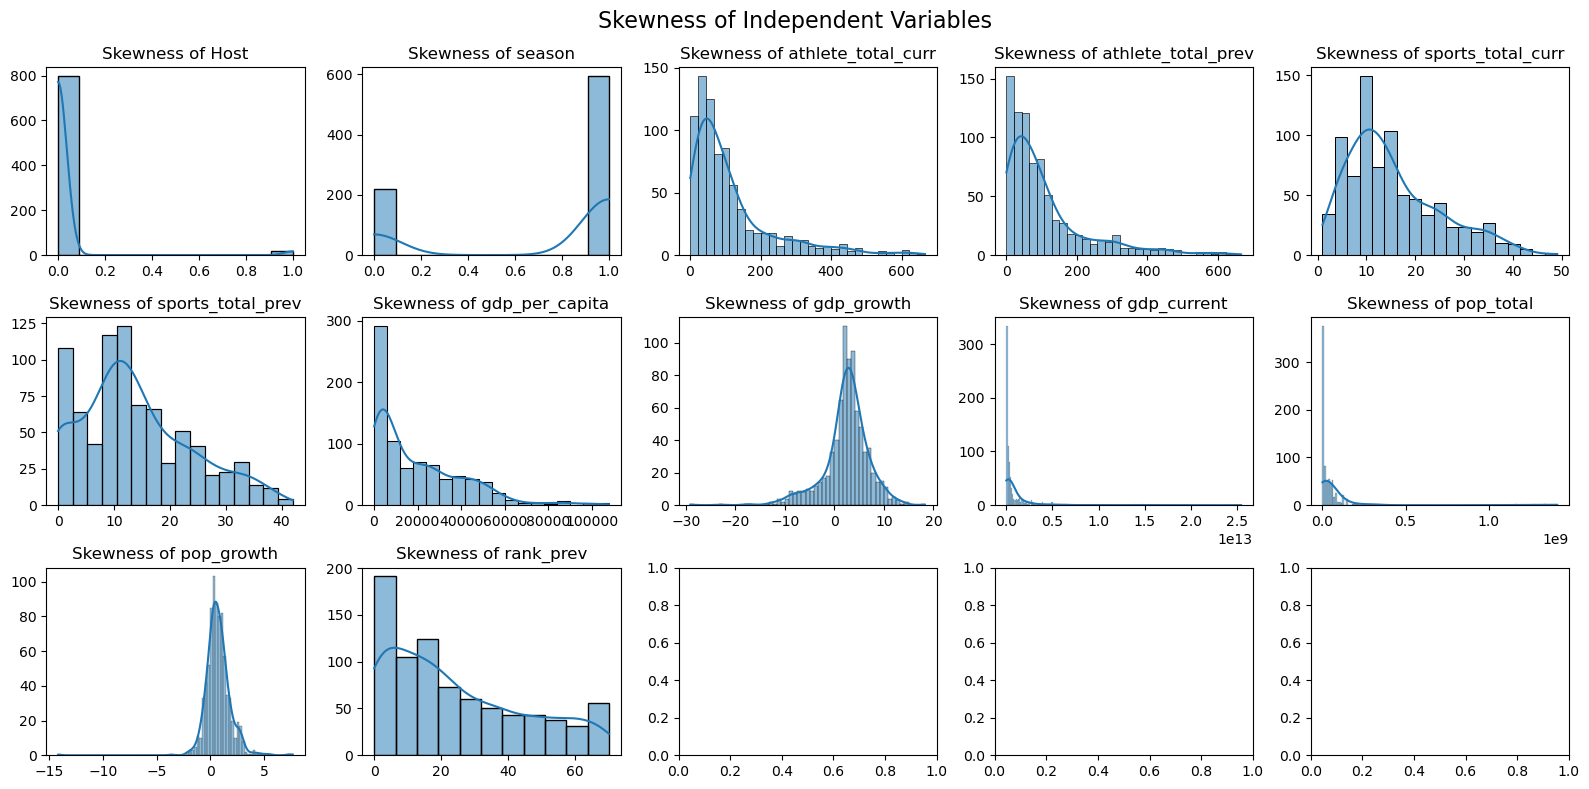

In [141]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the independent variables (features) you want to check for skewness
independent_vars = ['Host', 'season', 'athlete_total_curr', 'athlete_total_prev', 'sports_total_curr', 'sports_total_prev', 'gdp_per_capita', 'gdp_growth', 'gdp_current', 'pop_total', 'pop_growth','rank_prev']

# Create subplots for skewness plots
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(16, 8))
fig.suptitle('Skewness of Independent Variables', fontsize=16)

# Plot skewness for each variable
for i, var in enumerate(independent_vars):
    sns.histplot(final_df[var], ax=axes[i//5, i%5], kde=True)
    axes[i//5, i%5].set_title(f'Skewness of {var}')
    axes[i//5, i%5].set_xlabel('')
    axes[i//5, i%5].set_ylabel('')

plt.tight_layout()
plt.show()

In [142]:
skewness = final_df[['Host', 'season','athlete_total_curr', 'athlete_total_prev', 'sports_total_curr', 'sports_total_prev', 'gdp_per_capita', 'gdp_growth', 'gdp_current', 'pop_total', 'pop_growth','rank_prev']].apply(lambda x: stats.skew(x))
print(skewness)

Host                  6.701021
season               -1.034587
athlete_total_curr    1.963612
athlete_total_prev    1.934874
sports_total_curr     0.888629
sports_total_prev     0.605956
gdp_per_capita        1.295884
gdp_growth           -1.199760
gdp_current           5.490235
pop_total             5.082200
pop_growth           -1.515334
rank_prev             0.643253
dtype: float64


In [143]:
# skewness = final_df[['Host', 'season','athlete_total_curr', 'athlete_total_prev', 'sports_total_curr', 'sports_total_prev', 'gdp_per_capita', 'gdp_growth', 'gdp_current', 'pop_total', 'pop_growth','rank_prev']].apply(lambda x: stats.skew(x))
# print(skewness)

In [144]:
#Log Transformation: For variables with positive skewness (greater than 1), 
#apply a log transformation to make the distribution more symmetric. 
final_df['gdp_current'] = np.log1p(final_df['gdp_current'])
final_df['pop_total'] = np.log1p(final_df['pop_total'])
final_df['gdp_per_capita'] = np.log1p(final_df['gdp_per_capita'])
final_df['athlete_total_curr'] = np.log1p(final_df['athlete_total_curr'])
final_df['athlete_total_prev'] = np.log1p(final_df['athlete_total_prev'])

In [145]:
skewness = final_df[['Host', 'season','athlete_total_curr', 'athlete_total_prev', 'sports_total_curr', 'sports_total_prev', 'gdp_per_capita', 'gdp_growth', 'gdp_current', 'pop_total', 'pop_growth','rank_prev']].apply(lambda x: stats.skew(x))
print(skewness)

Host                  6.701021
season               -1.034587
athlete_total_curr   -0.324074
athlete_total_prev   -1.213782
sports_total_curr     0.888629
sports_total_prev     0.605956
gdp_per_capita       -0.636690
gdp_growth           -1.199760
gdp_current          -0.186804
pop_total             0.107998
pop_growth           -1.515334
rank_prev             0.643253
dtype: float64


In [146]:
missing_values = final_df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
edition               0
edition_id            0
year                  0
country               0
country_noc           0
total                 0
season                0
athlete_total_curr    0
athlete_total_prev    0
sports_total_curr     0
sports_total_prev     0
Host                  0
gdp_per_capita        0
gdp_growth            0
gdp_current           0
pop_total             0
pop_growth            0
rank_curr             0
rank_prev             0
rank_change           0
dtype: int64


In [147]:
rows_with_missing_values = final_df[final_df.isnull().any(axis=1)]
rows_with_missing_values

Empty DataFrame
Columns: [edition, edition_id, year, country, country_noc, total, season, athlete_total_curr, athlete_total_prev, sports_total_curr, sports_total_prev, Host, gdp_per_capita, gdp_growth, gdp_current, pop_total, pop_growth, rank_curr, rank_prev, rank_change]
Index: []

In [203]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 814 entries, 0 to 836
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   edition_id          814 non-null    int64  
 1   year                814 non-null    object 
 2   country             814 non-null    object 
 3   total               814 non-null    int64  
 4   season              814 non-null    int64  
 5   athlete_total_curr  814 non-null    float64
 6   athlete_total_prev  814 non-null    float64
 7   sports_total_curr   814 non-null    int64  
 8   sports_total_prev   814 non-null    int64  
 9   Host                814 non-null    int64  
 10  gdp_per_capita      814 non-null    float64
 11  gdp_growth          814 non-null    float64
 12  gdp_current         814 non-null    float64
 13  pop_total           814 non-null    float64
 14  pop_growth          814 non-null    float64
 15  rank_curr           814 non-null    int64  
 16  rank_pre

### Correlation matrix

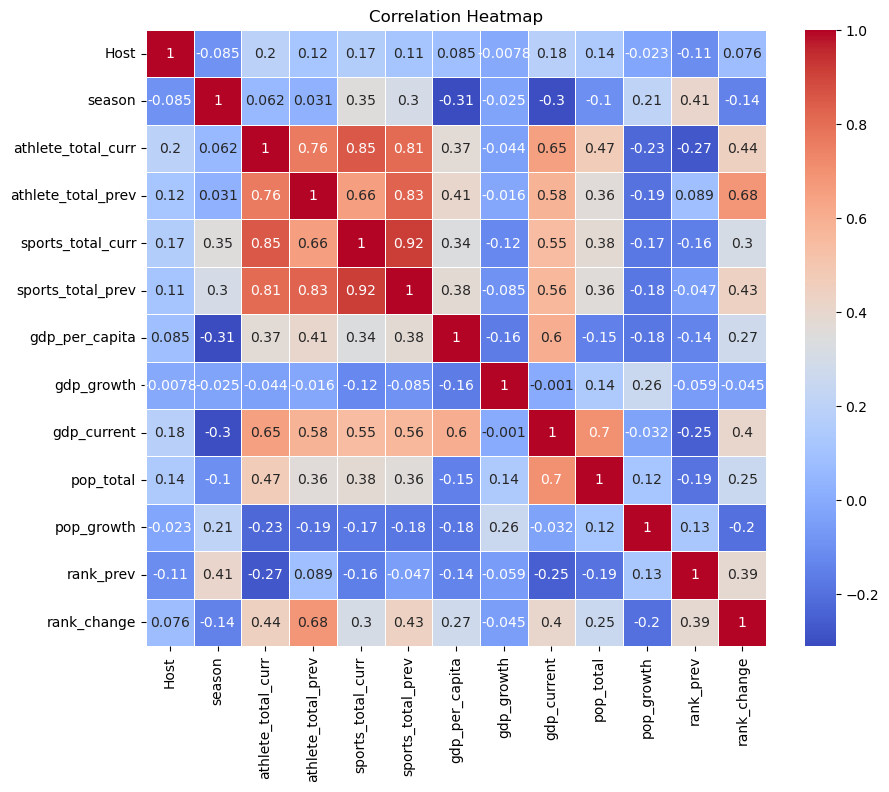

In [149]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = final_df[['Host', 'season', 'athlete_total_curr', 'athlete_total_prev', 'sports_total_curr', 'sports_total_prev','gdp_per_capita','gdp_growth', 'gdp_current','pop_total','pop_growth','rank_prev','rank_change']].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [150]:
final_df.head()

edition  edition_id  year                     country  \
0  1992 Summer Olympics          23  1992               United States   
1  1992 Summer Olympics          23  1992                     Germany   
2  1992 Summer Olympics          23  1992  People's Republic of China   
3  1992 Summer Olympics          23  1992                        Cuba   
4  1992 Summer Olympics          23  1992                     Hungary   

  country_noc  total  season  athlete_total_curr  athlete_total_prev  \
0         USA    108       1            6.349139            6.369901   
1         GER     82       1            6.173786            0.000000   
2         CHN     54       1            5.505332            5.686975   
3         CUB     31       1            5.225747            0.000000   
4         HUN     30       1            5.393628            5.273000   

   sports_total_curr  sports_total_prev  Host  gdp_per_capita  gdp_growth  \
0                 34                 33     0       10.143291    3.522441   
1                 32                  0     0       10.182604    1.923077   
2                 24                 27     0        5.906616   14.224530   
3                 17                  0     0        7.625141  -11.580603   
4                 25                 20     0        8.225799   -3.064180   

   gdp_current  pop_total  pop_growth  rank_curr  rank_prev  rank_change  
0    29.505946  19.362694    1.386886          2          3            1  
1    28.387881  18.205314    0.760347          3          0           -3  
2    26.779852  20.875961    1.225536          4          7            3  
3    23.818203  16.193551    0.650644          5          0           -5  
4    24.379895  16.154364   -0.039137          6         10            4

In [151]:
final_df.drop(['edition', 'country_noc'], axis=1, inplace=True)

### Linear regression results

In [152]:
import statsmodels.api as sm
df = final_df

X = df[['Host','season','athlete_total_curr', 'athlete_total_prev', 'sports_total_curr', 'sports_total_prev',
        'gdp_per_capita','gdp_growth', 'gdp_current','pop_total','pop_growth','rank_prev']]

y_rank_curr = df['rank_curr']

# Add a constant to the independent variables (intercept)
X = sm.add_constant(X)

In [153]:
model_rank_curr = sm.OLS(y_rank_curr, X).fit()
print("Summary for Rank Current:")
print(model_rank_curr.summary())

Summary for Rank Current:
                            OLS Regression Results                            
Dep. Variable:              rank_curr   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     269.1
Date:                Sun, 05 Nov 2023   Prob (F-statistic):          2.80e-271
Time:                        19:45:32   Log-Likelihood:                -3005.6
No. Observations:                 814   AIC:                             6037.
Df Residuals:                     801   BIC:                             6098.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const     

In [154]:
X = df[['Host','season','athlete_total_curr', 'athlete_total_prev', 'sports_total_curr', 'sports_total_prev',
        'gdp_per_capita','pop_growth','rank_prev']]
X = sm.add_constant(X)

In [155]:
model_rank_curr = sm.OLS(y_rank_curr, X).fit()
print("Summary for Rank Current:")
print(model_rank_curr.summary())

Summary for Rank Current:
                            OLS Regression Results                            
Dep. Variable:              rank_curr   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     360.1
Date:                Sun, 05 Nov 2023   Prob (F-statistic):          4.74e-275
Time:                        19:45:32   Log-Likelihood:                -3005.7
No. Observations:                 814   AIC:                             6031.
Df Residuals:                     804   BIC:                             6078.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const     

In [156]:

X = df[['Host','season','athlete_total_curr', 'athlete_total_prev', 'sports_total_curr', 'sports_total_prev',
        'gdp_per_capita','gdp_growth', 'gdp_current','pop_total','pop_growth','rank_prev']]

y_rank_change = df['rank_change']

# Add a constant to the independent variables (intercept)
X = sm.add_constant(X)

In [157]:
model_rank_change = sm.OLS(y_rank_change, X).fit()
print("\nSummary for Rank Change:")
print(model_rank_change.summary())


Summary for Rank Change:
                            OLS Regression Results                            
Dep. Variable:            rank_change   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     177.4
Date:                Sun, 05 Nov 2023   Prob (F-statistic):          4.79e-216
Time:                        19:45:32   Log-Likelihood:                -3005.6
No. Observations:                 814   AIC:                             6037.
Df Residuals:                     801   BIC:                             6098.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const     

In [158]:
X = df[['Host','season','athlete_total_curr', 'athlete_total_prev', 'sports_total_curr', 'sports_total_prev',
        'gdp_per_capita','pop_growth','rank_prev']]

# Add a constant to the independent variables (intercept)
X = sm.add_constant(X)

In [159]:
model_rank_change = sm.OLS(y_rank_change, X).fit()
print("\nSummary for Rank Change:")
print(model_rank_change.summary())


Summary for Rank Change:
                            OLS Regression Results                            
Dep. Variable:            rank_change   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     237.4
Date:                Sun, 05 Nov 2023   Prob (F-statistic):          1.51e-219
Time:                        19:45:32   Log-Likelihood:                -3005.7
No. Observations:                 814   AIC:                             6031.
Df Residuals:                     804   BIC:                             6078.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const     

In [160]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Define your independent variables (X) and dependent variables (y)
X = final_df[['Host','season','athlete_total_curr', 'athlete_total_prev', 'sports_total_curr', 'sports_total_prev',
        'gdp_per_capita','gdp_growth', 'gdp_current','pop_total','pop_growth','rank_prev']]

# Add a constant to the independent variables (intercept)
X = sm.add_constant(X)

# Define the dependent variable (change it according to your needs)
y = y_rank_curr  # For rank_curr
# y = y_rank_change  # For rank_change

# Create a linear regression model
model = sm.OLS(y, X).fit()

selected_features = list(X.columns)
p_value_threshold = 0.05

while True:
    max_p_value = model.pvalues[1:].max()
    if max_p_value >= p_value_threshold:
        feature_to_remove = model.pvalues[1:].idxmax()
        selected_features.remove(feature_to_remove)
        X = X[selected_features]
        model = sm.OLS(y, X).fit()
    else:
        break

# Print the summary of the final model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              rank_curr   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     538.6
Date:                Sun, 05 Nov 2023   Prob (F-statistic):          3.38e-278
Time:                        19:45:32   Log-Likelihood:                -3007.8
No. Observations:                 814   AIC:                             6030.
Df Residuals:                     807   BIC:                             6063.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 38.0216      3

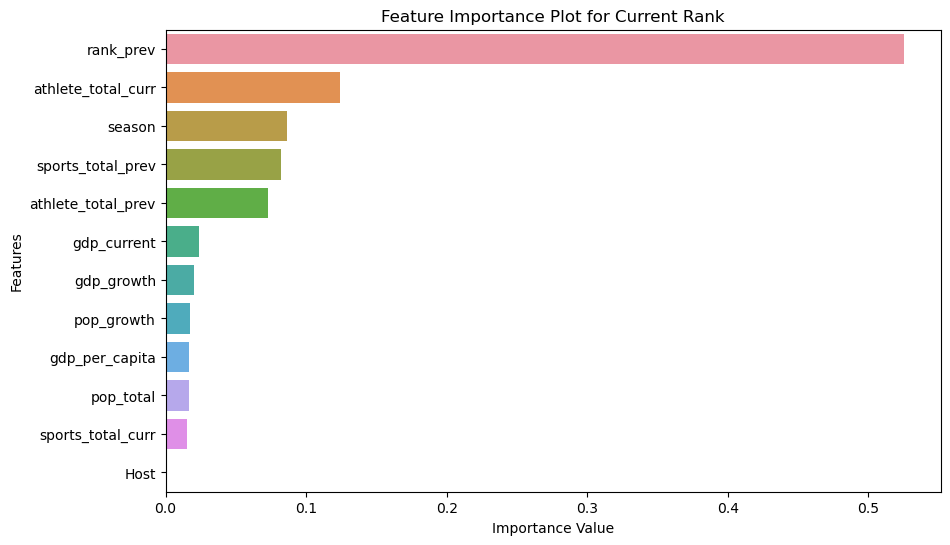

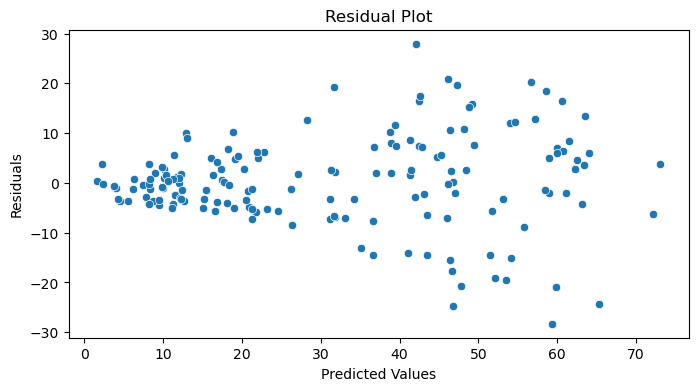


Root Mean Squared Error (RMSE): 9.06

R-squared (R2): 0.83

Feature Importances: 

rank_prev: 0.525
athlete_total_curr: 0.124
season: 0.086
sports_total_prev: 0.082
athlete_total_prev: 0.073
gdp_current: 0.024
gdp_growth: 0.020
pop_growth: 0.017
gdp_per_capita: 0.017
pop_total: 0.016
sports_total_curr: 0.015
Host: 0.000


In [161]:
## feature imp
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Define your DataFrame and target variable
df = final_df
target_var = 'rank_curr'

# Define your independent variables (features)
X = df[['Host','season','athlete_total_curr', 'athlete_total_prev', 'sports_total_curr', 'sports_total_prev',
        'gdp_per_capita','gdp_growth', 'gdp_current','pop_total','pop_growth','rank_prev']]

# Define the target variable
y = df[target_var]

# Split the data into training and testing sets (you can adjust the test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit a random forest regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Feature importance values
feature_importance = rf_model.feature_importances_

# Sort feature importance values and corresponding feature names
sorted_features = [feature for _, feature in sorted(zip(feature_importance, X.columns), reverse=True)]
sorted_importance = sorted(feature_importance, reverse=True)

# Feature importance plot
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importance, y=sorted_features, orient="h")
plt.title("Feature Importance Plot for Current Rank")
plt.xlabel("Importance Value")
plt.ylabel("Features")
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 4))
sns.scatterplot(x=y_pred, y=residuals)
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r_squared = r2_score(y_test, y_pred)

print(f"\nRoot Mean Squared Error (RMSE): {rmse:.2f}")
print(f"\nR-squared (R2): {r_squared:.2f}")

# Print feature importance values
print(f"\nFeature Importances: \n")
for feature, importance in zip(sorted_features, sorted_importance):
    print(f"{feature}: {importance:.3f}")


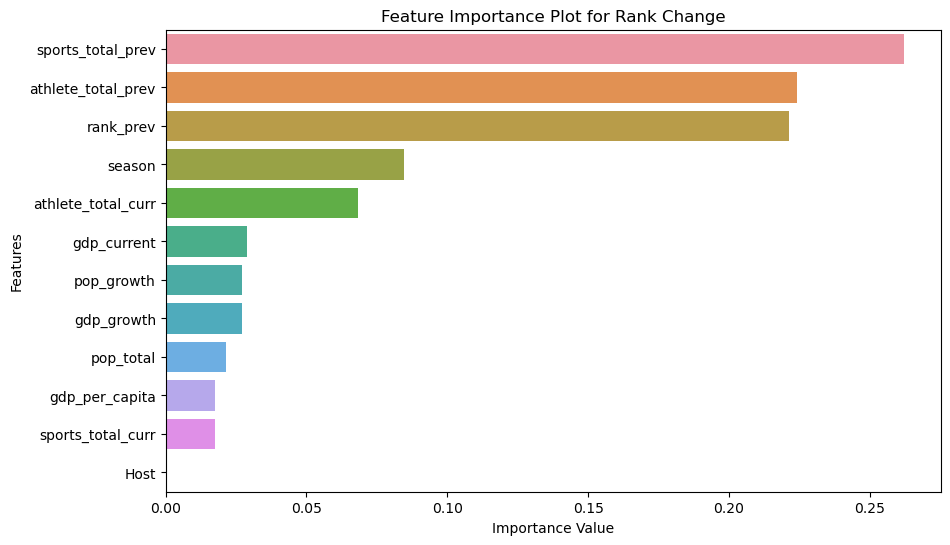

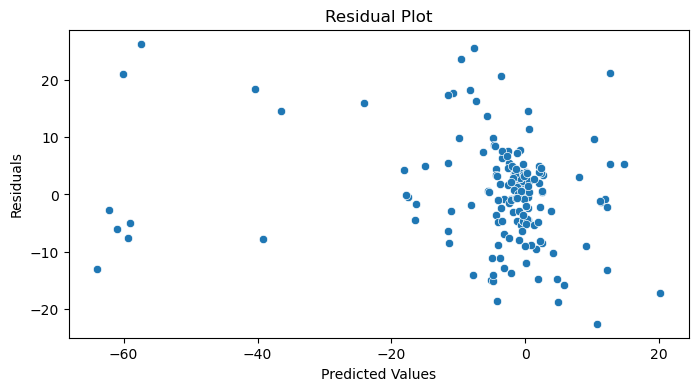


Root Mean Squared Error (RMSE): 8.94

R-squared (R2): 0.67

Feature Importances: 

sports_total_prev: 0.262
athlete_total_prev: 0.224
rank_prev: 0.221
season: 0.084
athlete_total_curr: 0.068
gdp_current: 0.029
pop_growth: 0.027
gdp_growth: 0.027
pop_total: 0.022
gdp_per_capita: 0.018
sports_total_curr: 0.017
Host: 0.000


In [162]:
## feature imp
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Define your DataFrame and target variable
df = final_df
target_var = 'rank_change'

# Define your independent variables (features)
X = df[['Host','season','athlete_total_curr', 'athlete_total_prev', 'sports_total_curr', 'sports_total_prev',
        'gdp_per_capita','gdp_growth', 'gdp_current','pop_total','pop_growth','rank_prev']]

# Define the target variable
y = df[target_var]

# Split the data into training and testing sets (you can adjust the test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit a random forest regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Feature importance values
feature_importance = rf_model.feature_importances_

# Sort feature importance values and corresponding feature names
sorted_features = [feature for _, feature in sorted(zip(feature_importance, X.columns), reverse=True)]
sorted_importance = sorted(feature_importance, reverse=True)

# Feature importance plot
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importance, y=sorted_features, orient="h")
plt.title("Feature Importance Plot for Rank Change")
plt.xlabel("Importance Value")
plt.ylabel("Features")
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 4))
sns.scatterplot(x=y_pred, y=residuals)
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r_squared = r2_score(y_test, y_pred)

print(f"\nRoot Mean Squared Error (RMSE): {rmse:.2f}")
print(f"\nR-squared (R2): {r_squared:.2f}")

# Print feature importance values
print(f"\nFeature Importances: \n")
for feature, importance in zip(sorted_features, sorted_importance):
    print(f"{feature}: {importance:.3f}")


# Predictive modeling

## for Rank change

In [163]:
# Split your data into training and testing sets
X_train = final_df[final_df['year'] < 2020][['Host', 'season', 'athlete_total_curr', 'athlete_total_prev', 'sports_total_curr', 'sports_total_prev',
     'gdp_per_capita', 'gdp_growth', 'gdp_current', 'pop_total', 'pop_growth', 'rank_prev']]

In [164]:
# X_train = final_df[final_df['year'] < 2020][['Host', 'season', 'athlete_total_curr', 'athlete_total_prev', 'sports_total_curr', 'sports_total_prev',
#      'gdp_per_capita', 'pop_growth', 'rank_prev']]

In [165]:
X_train

Host  season  athlete_total_curr  athlete_total_prev  sports_total_curr  \
0       0       1            6.349139            6.369901                 34   
1       0       1            6.173786            0.000000                 32   
2       0       1            5.505332            5.686975                 24   
3       0       1            5.225747            0.000000                 17   
4       0       1            5.393628            5.273000                 25   
..    ...     ...                 ...                 ...                ...   
715     0       0            2.995732            0.000000                  6   
716     0       0            3.496508            3.784190                  9   
717     0       0            3.135494            0.693147                  9   
718     0       0            3.828641            3.951244                  9   
719     0       0            3.555348            4.060443                  9   

     sports_total_prev  gdp_per_capita  gdp_growth  gdp_current  pop_total  \
0                   33       10.143291    3.522441    29.505946  19.362694   
1                    0       10.182604    1.923077    28.387881  18.205314   
2                   27        5.906616   14.224530    26.779852  20.875961   
3                    0        7.625141  -11.580603    23.818203  16.193551   
4                   20        8.225799   -3.064180    24.379895  16.154364   
..                 ...             ...         ...          ...        ...   
715                  0        9.706633    5.362348    25.801969  16.095396   
716                  9        8.038371    3.488362    25.597631  17.613749   
717                  1       10.769453    1.792945    27.020926  16.251494   
718                 10        9.191527    4.100000    25.912549  16.721124   
719                  9        9.790656    3.991855    24.262166  14.471566   

     pop_growth  rank_prev  
0      1.386886          3  
1      0.760347          0  
2      1.225536          7  
3      0.650644          0  
4     -0.039137         10  
..          ...        ...  
715   -0.126787          0  
716   -0.466426         23  
717    0.455185         19  
718    1.314523         24  
719   -0.779138         19  

[699 rows x 12 columns]

In [166]:
y_train = final_df[final_df['year'] < 2020]['rank_change']
y_train

0       1
1      -3
2       3
3      -5
4       4
       ..
715   -25
716    -2
717    -6
718    -1
719    -6
Name: rank_change, Length: 699, dtype: int64

In [167]:
test_set = final_df[final_df['year'] == 2020]
test_set

edition_id  year                     country  total  season  \
721          61  2020               United States    113       1   
722          61  2020  People's Republic of China     88       1   
723          61  2020               Great Britain     64       1   
724          61  2020                       Japan     58       1   
725          61  2020                   Australia     46       1   
..          ...   ...                         ...    ...     ...   
804          61  2020                       Ghana      1       1   
805          61  2020                     Grenada      1       1   
806          61  2020                      Kuwait      1       1   
807          61  2020         Republic of Moldova      1       1   
808          61  2020        Syrian Arab Republic      1       1   

     athlete_total_curr  athlete_total_prev  sports_total_curr  \
721            6.444131            6.329721                 47   
722            6.037871            5.993961                 42   
723            5.968708            5.899897                 37   
724            6.415097            5.843544                 49   
725            6.163315            6.063785                 43   
..                  ...                 ...                ...   
804            2.708050            3.583519                  5   
805            1.945910            2.079442                  2   
806            2.302585            2.397895                  5   
807            3.044522            3.401197                  8   
808            1.945910            1.945910                  6   

     sports_total_prev  Host  gdp_per_capita  gdp_growth  gdp_current  \
721                 40     0       11.059262   -2.767803    30.678419   
722                 35     0        9.250495    2.238638    30.318034   
723                 33     0       10.604588  -11.030858    28.625979   
724                 38     1       10.596333   -4.278604    29.250170   
725                 38     0       10.853659   -0.050885    27.913900   
..                 ...   ...             ...         ...          ...   
804                  4     0        7.685968    0.513942    24.972377   
805                  2     0        9.040564  -13.756622    20.765761   
806                  4     0       10.098178   -8.855279    25.386221   
807                  9     0        8.384174   -8.275978    23.168389   
808                  5     0        6.288251   -3.873682    23.135537   

     pop_total  pop_growth  rank_curr  rank_prev  rank_change  
721  19.619173    0.964348          1          1            0  
722  21.067635    0.238041          2          2            0  
723  18.021415    0.365758          4          3           -1  
724  18.653862   -0.294195          5          7            2  
725  17.060260    1.235701          6          8            2  
..         ...         ...        ...        ...          ...  
804  17.286868    2.066269         77         50          -27  
805  11.725323    0.762219         77         67          -10  
806  15.288085   -1.832821         77         67          -10  
807  14.784443   -1.098032         77         70           -7  
808  16.849145    3.300177         77         65          -12  

[87 rows x 18 columns]

In [168]:
X_test = test_set[['Host', 'season', 'athlete_total_curr', 'athlete_total_prev', 'sports_total_curr', 'sports_total_prev',
        'gdp_per_capita', 'gdp_growth', 'gdp_current', 'pop_total', 'pop_growth', 'rank_prev']]
X_test

Host  season  athlete_total_curr  athlete_total_prev  sports_total_curr  \
721     0       1            6.444131            6.329721                 47   
722     0       1            6.037871            5.993961                 42   
723     0       1            5.968708            5.899897                 37   
724     1       1            6.415097            5.843544                 49   
725     0       1            6.163315            6.063785                 43   
..    ...     ...                 ...                 ...                ...   
804     0       1            2.708050            3.583519                  5   
805     0       1            1.945910            2.079442                  2   
806     0       1            2.302585            2.397895                  5   
807     0       1            3.044522            3.401197                  8   
808     0       1            1.945910            1.945910                  6   

     sports_total_prev  gdp_per_capita  gdp_growth  gdp_current  pop_total  \
721                 40       11.059262   -2.767803    30.678419  19.619173   
722                 35        9.250495    2.238638    30.318034  21.067635   
723                 33       10.604588  -11.030858    28.625979  18.021415   
724                 38       10.596333   -4.278604    29.250170  18.653862   
725                 38       10.853659   -0.050885    27.913900  17.060260   
..                 ...             ...         ...          ...        ...   
804                  4        7.685968    0.513942    24.972377  17.286868   
805                  2        9.040564  -13.756622    20.765761  11.725323   
806                  4       10.098178   -8.855279    25.386221  15.288085   
807                  9        8.384174   -8.275978    23.168389  14.784443   
808                  5        6.288251   -3.873682    23.135537  16.849145   

     pop_growth  rank_prev  
721    0.964348          1  
722    0.238041          2  
723    0.365758          3  
724   -0.294195          7  
725    1.235701          8  
..          ...        ...  
804    2.066269         50  
805    0.762219         67  
806   -1.832821         67  
807   -1.098032         70  
808    3.300177         65  

[87 rows x 12 columns]

In [169]:
# X_test = test_set[['Host', 'season', 'athlete_total_curr', 'athlete_total_prev', 'sports_total_curr', 'sports_total_prev',
#         'gdp_per_capita', 'pop_growth', 'rank_prev']]
# X_test

In [170]:
y_test = test_set['rank_change']
y_test

721     0
722     0
723    -1
724     2
725     2
       ..
804   -27
805   -10
806   -10
807    -7
808   -12
Name: rank_change, Length: 87, dtype: int64

## Random Forest

In [171]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
rf_rank_change_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_rank_change_model.fit(X_train, y_train)
y_test = rf_rank_change_model.predict(X_test)

# Replace 'actual_values' with the actual rank change values for the 2020 Summer Olympics
actual_values = np.array(test_set[test_set['year'] == 2020]['rank_change'])

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual_values, y_test))

# Calculate MSE
mse = mean_squared_error(actual_values, y_test)

# Calculate R-squared (R2)
r2 = r2_score(actual_values, y_test)

# Print the metrics
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Root Mean Squared Error (RMSE): 12.30
Mean Squared Error (MSE): 151.20
R-squared (R2): 0.62


In [172]:
# #XG boost
# !pip install xgboost

Root Mean Squared Error (RMSE): 4.24
Mean Squared Error (MSE): 17.99
R-squared (R2): 0.90


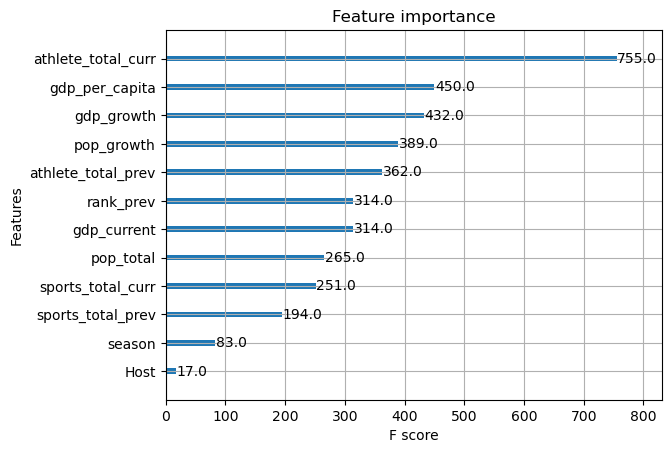

In [173]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Create an XGBoost regressor model
xgb_rank_change_model = xgb.XGBRegressor(objective='reg:squarederror')

# Fit the model to your training data
xgb_rank_change_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_rank_change_model.predict(X_test)

# Calculate RMSE, MSE, and R-squared
rmse = mean_squared_error(y_test, y_pred, squared=False)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

xgb.plot_importance(xgb_rank_change_model)
plt.show()


In [174]:
#SVM
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Create an SVM regressor model
svm_rank_change_model = SVR(kernel='linear')

# Fit the model to your training data
svm_rank_change_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_rank_change_model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Root Mean Squared Error (RMSE): 5.47
Mean Squared Error (MSE): 29.97
R-squared (R2): 0.84


# Prediction modeling

## for current rank

In [175]:
y_train = final_df[final_df['year'] < 2020]['rank_curr']
y_train

0       2
1       3
2       4
3       5
4       6
       ..
715    25
716    25
717    25
718    25
719    25
Name: rank_curr, Length: 699, dtype: int64

In [176]:
y_test = test_set['rank_curr']
y_test

721     1
722     2
723     4
724     5
725     6
       ..
804    77
805    77
806    77
807    77
808    77
Name: rank_curr, Length: 87, dtype: int64

### 1. Random forest

In [177]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
rf_rank_curr_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_rank_curr_model.fit(X_train, y_train)
y_test = rf_rank_curr_model.predict(X_test)

# Replace 'actual_values' with the actual rank change values for the 2020 Summer Olympics
actual_values = np.array(test_set[test_set['year'] == 2020]['rank_curr'])

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual_values, y_test))

# Calculate MSE
mse = mean_squared_error(actual_values, y_test)

# Calculate R-squared (R2)
r2 = r2_score(actual_values, y_test)

# Print the metrics
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Root Mean Squared Error (RMSE): 12.84
Mean Squared Error (MSE): 164.77
R-squared (R2): 0.71


### 2. SVM

In [178]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Create an SVM regressor model
svm_rank_curr_model = SVR(kernel='linear')

# Fit the model to your training data
svm_rank_curr_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_rank_curr_model.predict(X_test)


# Calculate RMSE, MSE, and R-squared
rmse = mean_squared_error(y_test, y_pred, squared=False)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Root Mean Squared Error (RMSE): 6.16
Mean Squared Error (MSE): 37.92
R-squared (R2): 0.89


### 3. XG Boost

Root Mean Squared Error (RMSE): 4.45
Mean Squared Error (MSE): 19.78
R-squared (R2): 0.94


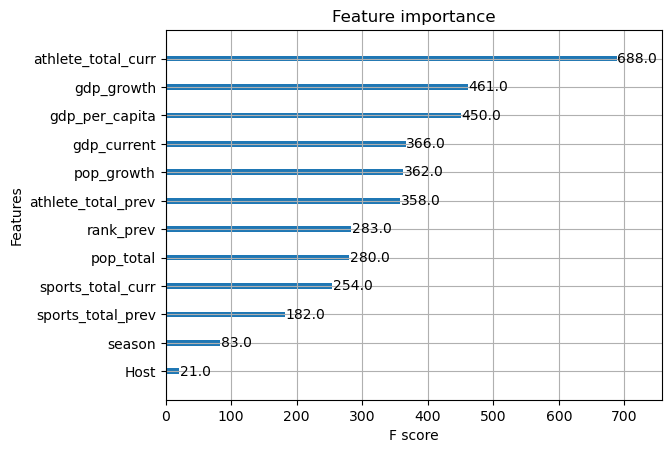

In [179]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Create an XGBoost regressor model
xgb_rank_curr_model = xgb.XGBRegressor(objective='reg:squarederror')

# Fit the model to your training data
xgb_rank_curr_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_rank_curr_model.predict(X_test)

# Calculate RMSE, MSE, and R-squared
rmse = mean_squared_error(y_test, y_pred, squared=False)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

xgb.plot_importance(xgb_rank_curr_model)
plt.show()

### Predictions of current ranking for top 20 countries for the 2020 tokyo summer olympics

In [180]:
# Round the predicted ranks to the nearest integer
rounded_preds = [round(rank) for rank in y_pred]

# Create a DataFrame with actual, predicted, and country information for the test set
test_results_df = pd.DataFrame({'Country Name': test_set['country'], 'Actual Rank': test_set['rank_curr'], 'Predicted Rank': rounded_preds})

# Sort the DataFrame by the predicted rank in ascending order
test_results_df = test_results_df.sort_values(by='Actual Rank')

# Display the top 20 countries with their actual and predicted ranks
top_20_test_results = test_results_df.head(20)
print(top_20_test_results)

                   Country Name  Actual Rank  Predicted Rank
721               United States            1               3
722  People's Republic of China            2               4
723               Great Britain            4              14
724                       Japan            5               6
725                   Australia            6               7
726                       Italy            7              12
727                     Germany            8               4
728                 Netherlands            9              11
729                      France           10              16
730                      Canada           11               8
731                      Brazil           12              14
734           Republic of Korea           13              14
732                 New Zealand           13              16
733                     Hungary           13              19
735                     Ukraine           16              22
736                     

## Gather dataset for prediction of 2024 results

## Create test dataset

In [181]:
#fetch only top 20 countries in 2020 olympic ranking
year_2020 = stored_df[stored_df['year'] == 2020]
top_20_2020 = year_2020.sort_values(by='rank_curr')

In [182]:
top_20_2020[top_20_2020['rank_curr']<=20]

edition  edition_id  year                     country  \
754  2020 Summer Olympics          61  2020               United States   
755  2020 Summer Olympics          61  2020  People's Republic of China   
756  2020 Summer Olympics          61  2020                         ROC   
757  2020 Summer Olympics          61  2020               Great Britain   
758  2020 Summer Olympics          61  2020                       Japan   
759  2020 Summer Olympics          61  2020                   Australia   
760  2020 Summer Olympics          61  2020                       Italy   
761  2020 Summer Olympics          61  2020                     Germany   
762  2020 Summer Olympics          61  2020                 Netherlands   
763  2020 Summer Olympics          61  2020                      France   
764  2020 Summer Olympics          61  2020                      Canada   
765  2020 Summer Olympics          61  2020                      Brazil   
768  2020 Summer Olympics          61  2020           Republic of Korea   
766  2020 Summer Olympics          61  2020                 New Zealand   
767  2020 Summer Olympics          61  2020                     Hungary   
769  2020 Summer Olympics          61  2020                     Ukraine   
770  2020 Summer Olympics          61  2020                       Spain   
771  2020 Summer Olympics          61  2020                        Cuba   
772  2020 Summer Olympics          61  2020                      Poland   
773  2020 Summer Olympics          61  2020                 Switzerland   
774  2020 Summer Olympics          61  2020                     Türkiye   

    country_noc  total  season  athlete_total_curr  athlete_total_prev  \
754         USA    113       1                 628                 560   
755         CHN     88       1                 418                 400   
756         ROC     71       1                 337                   0   
757         GBR     64       1                 390                 364   
758         JPN     58       1                 610                 344   
759         AUS     46       1                 474                 429   
760         ITA     40       1                 375                 309   
761         GER     37       1                 410                 432   
762         NED     36       1                 283                 243   
763         FRA     33       1                 393                 401   
764         CAN     24       1                 383                 316   
765         BRA     21       1                 316                 475   
768         KOR     20       1                 238                 213   
766         NZL     20       1                 226                 205   
767         HUN     20       1                 172                 154   
769         UKR     19       1                 153                 205   
770         ESP     17       1                 334                 311   
771         CUB     15       1                  69                 119   
772         POL     14       1                 212                 235   
773         SUI     13       1                 116                 102   
774         TUR     13       1                 107                 101   

     sports_total_curr  sports_total_prev   Host    gdp_per_capita  \
754                 47                 40  False  63528.6343027508   
755                 42                 35  False  10408.7191247747   
756                 39                  0  False               NaN   
757                 37                 33  False  40318.4169225055   
758                 49                 38   True  39986.9286287091   
759                 43                 38  False  51722.0690001531   
760                 41                 32  False  31918.6934933773   
761                 39                 36  False  46772.8253507537   
762                 33                 29  False  52162.5701150397   
763                 43                

In [183]:
top_20_2020 = top_20_2020[['country','country_noc','athlete_total_curr', 'sports_total_curr', 
                             'rank_curr']]

In [184]:
# top_20_2020.to_excel('top_20_2020.xlsx', index=False)

In [185]:
top_20_2024 = pd.read_excel('/Users/farah/Documents/Jupyter Repository/top_20_2024.xlsx')
top_20_2024

country country_noc  Host  season  athlete_total_curr  \
0                United States         USA     0       1               338.0   
1   People's Republic of China         CHN     0       1               205.0   
2                          ROC         ROC     0       1                 NaN   
3                Great Britain         GBR     0       1               188.0   
4                        Japan         JPN     0       1               140.0   
5                    Australia         AUS     0       1               251.0   
6                        Italy         ITA     0       1                97.0   
7                      Germany         GER     0       1               176.0   
8                  Netherlands         NED     0       1               140.0   
9                       France         FRA     1       1               435.0   
10                      Canada         CAN     0       1               117.0   
11                      Brazil         BRA     0       1               109.0   
12           Republic of Korea         KOR     0       1                44.0   
13                 New Zealand         NZL     0       1                99.0   
14                     Hungary         HUN     0       1                56.0   
15                     Ukraine         UKR     0       1                62.0   
16                       Spain         ESP     0       1               122.0   
17                        Cuba         CUB     0       1                13.0   
18                      Poland         POL     0       1                80.0   
19                 Switzerland         SUI     0       1                51.0   
20                     Türkiye         TUR     0       1                41.0   

    athlete_total_prev  sports_total_curr  sports_total_prev  rank_prev  \
0                  628               20.0                 47          1   
1                  418               21.0                 42          2   
2                  337                NaN                 39          3   
3                  390               15.0                 37          4   
4                  610               21.0                 49          5   
5                  474               17.0                 43          6   
6                  375               14.0                 41          7   
7                  410               17.0                 39          8   
8                  283               11.0                 33          9   
9                  393               35.0                 43         10   
10                 383               14.0                 42         11   
11                 316               15.0                 35         12   
12                 238                8.0                 31         13   
13                 226               11.0                 27         13   
14                 172               10.0                 25         13   
15                 153               11.0                 29         16   
16                 334               15.0                 38         17   
17                  69                4.0                 15         18   
18                 212               12.0                 28         19   
19                 116               10.0                 27         20   
20                 107                8.0                 18         20   

    rank_curr  rank_change  
0         NaN          NaN  
1         NaN          NaN  
2         NaN          NaN  
3         NaN          NaN  
4         NaN          NaN  
5         NaN          NaN  
6         NaN          NaN  
7         NaN          NaN  
8         NaN          NaN  
9         NaN          NaN  
10        NaN          NaN  
11        NaN          NaN  
12        NaN          NaN  
13        NaN          NaN  
14        NaN          NaN  
15        NaN          NaN  
16        NaN          NaN  
17        NaN          NaN  
18        NaN          NaN  
19        NaN          NaN  
20

In [186]:
#adding GDP_PER_CAPITA
df_gdp_per_capita_2022 = df_gdp_per_capita[df_gdp_per_capita['Year'] == 2022]
df_gdp_per_capita_2022.head()

Country Code    Country Name  Year    gdp_per_capita
7161          AFG     Afghanistan  2022                ..
7162          ALB         Albania  2022  6802.80451885113
7163          DZA         Algeria  2022  4273.92218311515
7164          ASM  American Samoa  2022                ..
7165          AND         Andorra  2022  41992.7933583772

In [187]:
top_20_2024 = top_20_2024.merge(df_gdp_per_capita_2022, left_on=['country_noc'], right_on=['Country Code'], how='left')

# Identify rows where the merge didn't match
unmatched_rows = top_20_2024['gdp_per_capita'].isnull()

# For unmatched rows, try to merge based on 'country name' and 'year'
unmatched_rows_df = top_20_2024.loc[unmatched_rows]
for index, row in unmatched_rows_df.iterrows():
    matching_rows = df_gdp_per_capita_2022[
        (df_gdp_per_capita_2022['Country Name'] == row['country'])
    ]
    if not matching_rows.empty:
        top_20_2024.at[index, 'gdp_per_capita'] = matching_rows.iloc[0]['gdp_per_capita']
        
#Drop the redundant columns
top_20_2024.drop(['Country Code', 'Country Name','Year'], axis=1, inplace=True)        
top_20_2024.head()

country country_noc  Host  season  athlete_total_curr  \
0               United States         USA     0       1               338.0   
1  People's Republic of China         CHN     0       1               205.0   
2                         ROC         ROC     0       1                 NaN   
3               Great Britain         GBR     0       1               188.0   
4                       Japan         JPN     0       1               140.0   

   athlete_total_prev  sports_total_curr  sports_total_prev  rank_prev  \
0                 628               20.0                 47          1   
1                 418               21.0                 42          2   
2                 337                NaN                 39          3   
3                 390               15.0                 37          4   
4                 610               21.0                 49          5   

   rank_curr  rank_change    gdp_per_capita  
0        NaN          NaN  76398.5917422054  
1        NaN          NaN  12720.2156397612  
2        NaN          NaN               NaN  
3        NaN          NaN  45850.4261222629  
4        NaN          NaN  33815.3172733799

In [188]:
#adding GDP_GROWTH
df_gdp_growth_2022 = df_gdp_growth[df_gdp_growth['Year'] == 2022]
df_gdp_growth_2022.head()

Country Code    Country Name  Year        gdp_growth
7161          AFG     Afghanistan  2022                ..
7162          ALB         Albania  2022  4.84423589539303
7163          DZA         Algeria  2022  3.09999999986282
7164          ASM  American Samoa  2022                ..
7165          AND         Andorra  2022  8.80957934841771

In [189]:
top_20_2024 = top_20_2024.merge(df_gdp_growth_2022, left_on=['country_noc'], right_on=['Country Code'], how='left')

# Identify rows where the merge didn't match
unmatched_rows = top_20_2024['gdp_growth'].isnull()

# For unmatched rows, try to merge based on 'country name' and 'year'
unmatched_rows_df = top_20_2024.loc[unmatched_rows]
for index, row in unmatched_rows_df.iterrows():
    matching_rows = df_gdp_growth_2022[
        (df_gdp_growth_2022['Country Name'] == row['country'])
    ]
    if not matching_rows.empty:
        top_20_2024.at[index, 'gdp_growth'] = matching_rows.iloc[0]['gdp_growth']
        
#Drop the redundant columns
top_20_2024.drop(['Country Code', 'Country Name','Year'], axis=1, inplace=True)        
top_20_2024.head()


country country_noc  Host  season  athlete_total_curr  \
0               United States         USA     0       1               338.0   
1  People's Republic of China         CHN     0       1               205.0   
2                         ROC         ROC     0       1                 NaN   
3               Great Britain         GBR     0       1               188.0   
4                       Japan         JPN     0       1               140.0   

   athlete_total_prev  sports_total_curr  sports_total_prev  rank_prev  \
0                 628               20.0                 47          1   
1                 418               21.0                 42          2   
2                 337                NaN                 39          3   
3                 390               15.0                 37          4   
4                 610               21.0                 49          5   

   rank_curr  rank_change    gdp_per_capita        gdp_growth  
0        NaN          NaN  76398.5917422054  2.06159311851432  
1        NaN          NaN  12720.2156397612   2.9908045977096  
2        NaN          NaN               NaN               NaN  
3        NaN          NaN  45850.4261222629  4.10162138081358  
4        NaN          NaN  33815.3172733799  1.02862486644142

In [190]:
#Adding GDP_current
df_gdp_current_2022 = df_gdp_current[df_gdp_current['Year'] == 2022]
df_gdp_current_2022.head()

Country Code    Country Name  Year       gdp_current
7161          AFG     Afghanistan  2022                ..
7162          ALB         Albania  2022  18882095517.8768
7163          DZA         Algeria  2022  191912889420.911
7164          ASM  American Samoa  2022                ..
7165          AND         Andorra  2022   3352032737.0391

In [191]:
top_20_2024 = top_20_2024.merge(df_gdp_current_2022, left_on=['country_noc'], right_on=['Country Code'], how='left')

# Identify rows where the merge didn't match
unmatched_rows = top_20_2024['gdp_current'].isnull()

# For unmatched rows, try to merge based on 'country name' and 'year'
unmatched_rows_df = top_20_2024.loc[unmatched_rows]
for index, row in unmatched_rows_df.iterrows():
    matching_rows = df_gdp_current_2022[
        (df_gdp_current_2022['Country Name'] == row['country'])
    ]
    if not matching_rows.empty:
        top_20_2024.at[index, 'gdp_current'] = matching_rows.iloc[0]['gdp_current']
        
#Drop the redundant columns
top_20_2024.drop(['Country Code', 'Country Name','Year'], axis=1, inplace=True)        
top_20_2024.head()

country country_noc  Host  season  athlete_total_curr  \
0               United States         USA     0       1               338.0   
1  People's Republic of China         CHN     0       1               205.0   
2                         ROC         ROC     0       1                 NaN   
3               Great Britain         GBR     0       1               188.0   
4                       Japan         JPN     0       1               140.0   

   athlete_total_prev  sports_total_curr  sports_total_prev  rank_prev  \
0                 628               20.0                 47          1   
1                 418               21.0                 42          2   
2                 337                NaN                 39          3   
3                 390               15.0                 37          4   
4                 610               21.0                 49          5   

   rank_curr  rank_change    gdp_per_capita        gdp_growth  \
0        NaN          NaN  76398.5917422054  2.06159311851432   
1        NaN          NaN  12720.2156397612   2.9908045977096   
2        NaN          NaN               NaN               NaN   
3        NaN          NaN  45850.4261222629  4.10162138081358   
4        NaN          NaN  33815.3172733799  1.02862486644142   

        gdp_current  
0    25462700000000  
1  17963170521079.8  
2               NaN  
3  3070667732359.21  
4  4231141201863.17

In [192]:
#Adding POP_current
df_pop_total_2022 = df_pop_total[df_pop_total['Year'] == 2022]
df_pop_total_2022.head()

Country Code    Country Name  Year pop_total
7161          AFG     Afghanistan  2022  41128771
7162          ALB         Albania  2022   2775634
7163          DZA         Algeria  2022  44903225
7164          ASM  American Samoa  2022     44273
7165          AND         Andorra  2022     79824

In [193]:
top_20_2024 = top_20_2024.merge(df_pop_total_2022, left_on=['country_noc'], right_on=['Country Code'], how='left')

# Identify rows where the merge didn't match
unmatched_rows = top_20_2024['pop_total'].isnull()

# For unmatched rows, try to merge based on 'country name' and 'year'
unmatched_rows_df = top_20_2024.loc[unmatched_rows]
for index, row in unmatched_rows_df.iterrows():
    matching_rows = df_pop_total_2022[
        (df_pop_total_2022['Country Name'] == row['country'])
    ]
    if not matching_rows.empty:
        top_20_2024.at[index, 'pop_total'] = matching_rows.iloc[0]['pop_total']
        
#Drop the redundant columns
top_20_2024.drop(['Country Code', 'Country Name','Year'], axis=1, inplace=True)        
top_20_2024.head()

country country_noc  Host  season  athlete_total_curr  \
0               United States         USA     0       1               338.0   
1  People's Republic of China         CHN     0       1               205.0   
2                         ROC         ROC     0       1                 NaN   
3               Great Britain         GBR     0       1               188.0   
4                       Japan         JPN     0       1               140.0   

   athlete_total_prev  sports_total_curr  sports_total_prev  rank_prev  \
0                 628               20.0                 47          1   
1                 418               21.0                 42          2   
2                 337                NaN                 39          3   
3                 390               15.0                 37          4   
4                 610               21.0                 49          5   

   rank_curr  rank_change    gdp_per_capita        gdp_growth  \
0        NaN          NaN  76398.5917422054  2.06159311851432   
1        NaN          NaN  12720.2156397612   2.9908045977096   
2        NaN          NaN               NaN               NaN   
3        NaN          NaN  45850.4261222629  4.10162138081358   
4        NaN          NaN  33815.3172733799  1.02862486644142   

        gdp_current   pop_total  
0    25462700000000   333287557  
1  17963170521079.8  1412175000  
2               NaN         NaN  
3  3070667732359.21    66971411  
4  4231141201863.17   125124989

In [194]:
#Adding POP_growth
df_pop_growth_2022 = df_pop_growth[df_pop_growth['Year'] == 2022]
df_pop_growth_2022.head()

Country Code    Country Name  Year         pop_growth
7161          AFG     Afghanistan  2022   2.53449831666733
7162          ALB         Albania  2022  -1.28980006505826
7163          DZA         Algeria  2022   1.62833925417918
7164          ASM  American Samoa  2022  -1.70649548061895
7165          AND         Andorra  2022  0.994607149162366

In [195]:
top_20_2024 = top_20_2024.merge(df_pop_growth_2022, left_on=['country_noc'], right_on=['Country Code'], how='left')

# Identify rows where the merge didn't match
unmatched_rows = top_20_2024['pop_growth'].isnull()

# For unmatched rows, try to merge based on 'country name' and 'year'
unmatched_rows_df = top_20_2024.loc[unmatched_rows]
for index, row in unmatched_rows_df.iterrows():
    matching_rows = df_pop_growth_2022[
        (df_pop_growth_2022['Country Name'] == row['country'])
    ]
    if not matching_rows.empty:
        top_20_2024.at[index, 'pop_growth'] = matching_rows.iloc[0]['pop_growth']
        
#Drop the redundant columns
top_20_2024.drop(['Country Code', 'Country Name','Year'], axis=1, inplace=True)        
top_20_2024.head()

country country_noc  Host  season  athlete_total_curr  \
0               United States         USA     0       1               338.0   
1  People's Republic of China         CHN     0       1               205.0   
2                         ROC         ROC     0       1                 NaN   
3               Great Britain         GBR     0       1               188.0   
4                       Japan         JPN     0       1               140.0   

   athlete_total_prev  sports_total_curr  sports_total_prev  rank_prev  \
0                 628               20.0                 47          1   
1                 418               21.0                 42          2   
2                 337                NaN                 39          3   
3                 390               15.0                 37          4   
4                 610               21.0                 49          5   

   rank_curr  rank_change    gdp_per_capita        gdp_growth  \
0        NaN          NaN  76398.5917422054  2.06159311851432   
1        NaN          NaN  12720.2156397612   2.9908045977096   
2        NaN          NaN               NaN               NaN   
3        NaN          NaN  45850.4261222629  4.10162138081358   
4        NaN          NaN  33815.3172733799  1.02862486644142   

        gdp_current   pop_total           pop_growth  
0    25462700000000   333287557    0.377564531459432  
1  17963170521079.8  1412175000  -0.0130995013525784  
2               NaN         NaN                  NaN  
3  3070667732359.21    66971411  -0.0819252846341849  
4  4231141201863.17   125124989   -0.443851919148528

In [196]:
#now move the rank_curr and rank_change columns to the end of the df
# Get the list of columns in the DataFrame
columns = top_20_2024.columns.tolist()

# Move 'rank_curr' and 'rank_change' columns to the end
columns.remove('rank_curr')
columns.remove('rank_change')
columns.extend(['rank_curr', 'rank_change'])

# Reorder the columns in the DataFrame
top_20_2024 = top_20_2024[columns]
top_20_2024

country country_noc  Host  season  athlete_total_curr  \
0                United States         USA     0       1               338.0   
1   People's Republic of China         CHN     0       1               205.0   
2                          ROC         ROC     0       1                 NaN   
3                Great Britain         GBR     0       1               188.0   
4                        Japan         JPN     0       1               140.0   
5                    Australia         AUS     0       1               251.0   
6                        Italy         ITA     0       1                97.0   
7                      Germany         GER     0       1               176.0   
8                  Netherlands         NED     0       1               140.0   
9                       France         FRA     1       1               435.0   
10                      Canada         CAN     0       1               117.0   
11                      Brazil         BRA     0       1               109.0   
12           Republic of Korea         KOR     0       1                44.0   
13                 New Zealand         NZL     0       1                99.0   
14                     Hungary         HUN     0       1                56.0   
15                     Ukraine         UKR     0       1                62.0   
16                       Spain         ESP     0       1               122.0   
17                        Cuba         CUB     0       1                13.0   
18                      Poland         POL     0       1                80.0   
19                 Switzerland         SUI     0       1                51.0   
20                     Türkiye         TUR     0       1                41.0   

    athlete_total_prev  sports_total_curr  sports_total_prev  rank_prev  \
0                  628               20.0                 47          1   
1                  418               21.0                 42          2   
2                  337                NaN                 39          3   
3                  390               15.0                 37          4   
4                  610               21.0                 49          5   
5                  474               17.0                 43          6   
6                  375               14.0                 41          7   
7                  410               17.0                 39          8   
8                  283               11.0                 33          9   
9                  393               35.0                 43         10   
10                 383               14.0                 42         11   
11                 316               15.0                 35         12   
12                 238                8.0                 31         13   
13                 226               11.0                 27         13   
14                 172               10.0                 25         13   
15                 153               11.0                 29         16   
16                 334               15.0                 38         17   
17                  69                4.0                 15         18   
18                 212               12.0                 28         19   
19                 116               10.0                 27         20   
20                 107                8.0                 18         20   

      gdp_per_capita        gdp_growth       gdp_current   pop_total  \
0   76398.5917422054  2.06159311851432    25462700000000   333287557   
1   12720.2156397612   2.9908045977096  17963170521079.8  1412175000   
2                NaN               NaN               NaN         NaN   
3   45850.4261222629  4.10162138081358  3070667732359.21    66971411   
4   33815.3172733799  1.02862486644142  4231141201863.17   125124989   
5   64491.4298860631  3.61758857230203  1675418665067.09    25978935   
6    34157.990122464  3.67468325490428  2010431598465.38    58856847   
7   48432.4558732596  1.78520820964

In [197]:
#apply similar log transformations to test dataset for 2024 predictions

top_20_2024['gdp_current'] = pd.to_numeric(top_20_2024['gdp_current'], errors='coerce')
top_20_2024['pop_total'] = pd.to_numeric(top_20_2024['pop_total'], errors='coerce')
top_20_2024['gdp_per_capita'] = pd.to_numeric(top_20_2024['gdp_per_capita'], errors='coerce')
top_20_2024['athlete_total_curr'] = pd.to_numeric(top_20_2024['athlete_total_curr'], errors='coerce')

# Apply the log1p transformation to the columns
top_20_2024['gdp_current'] = np.log1p(top_20_2024['gdp_current'])
top_20_2024['pop_total'] = np.log1p(top_20_2024['pop_total'])
top_20_2024['gdp_per_capita'] = np.log1p(top_20_2024['gdp_per_capita'])
top_20_2024['athlete_total_curr'] = np.log1p(top_20_2024['athlete_total_curr'])

top_20_2024

country country_noc  Host  season  athlete_total_curr  \
0                United States         USA     0       1            5.826000   
1   People's Republic of China         CHN     0       1            5.327876   
2                          ROC         ROC     0       1                 NaN   
3                Great Britain         GBR     0       1            5.241747   
4                        Japan         JPN     0       1            4.948760   
5                    Australia         AUS     0       1            5.529429   
6                        Italy         ITA     0       1            4.584967   
7                      Germany         GER     0       1            5.176150   
8                  Netherlands         NED     0       1            4.948760   
9                       France         FRA     1       1            6.077642   
10                      Canada         CAN     0       1            4.770685   
11                      Brazil         BRA     0       1            4.700480   
12           Republic of Korea         KOR     0       1            3.806662   
13                 New Zealand         NZL     0       1            4.605170   
14                     Hungary         HUN     0       1            4.043051   
15                     Ukraine         UKR     0       1            4.143135   
16                       Spain         ESP     0       1            4.812184   
17                        Cuba         CUB     0       1            2.639057   
18                      Poland         POL     0       1            4.394449   
19                 Switzerland         SUI     0       1            3.951244   
20                     Türkiye         TUR     0       1            3.737670   

    athlete_total_prev  sports_total_curr  sports_total_prev  rank_prev  \
0                  628               20.0                 47          1   
1                  418               21.0                 42          2   
2                  337                NaN                 39          3   
3                  390               15.0                 37          4   
4                  610               21.0                 49          5   
5                  474               17.0                 43          6   
6                  375               14.0                 41          7   
7                  410               17.0                 39          8   
8                  283               11.0                 33          9   
9                  393               35.0                 43         10   
10                 383               14.0                 42         11   
11                 316               15.0                 35         12   
12                 238                8.0                 31         13   
13                 226               11.0                 27         13   
14                 172               10.0                 25         13   
15                 153               11.0                 29         16   
16                 334               15.0                 38         17   
17                  69                4.0                 15         18   
18                 212               12.0                 28         19   
19                 116               10.0                 27         20   
20                 107                8.0                 18         20   

    gdp_per_capita        gdp_growth  gdp_current  pop_total  \
0        11.243733  2.06159311851432    30.868236  19.624516   
1         9.451026   2.9908045977096    30.519345  21.068397   
2              NaN               NaN          NaN        NaN   
3        10.733162  4.10162138081358    28.752916  18.019776   
4        10.428699  1.02862486644142    29.073493  18.644824   
5        11.074303  3.61758857230203    28.147084  17.072797   
6        10.438781  3.67468325490428    28.329371  17.890619   
7        10.787946  1.78520820964427    29.035202  18.247277   
8        10.932864  4.4782400006299

In [198]:
# Convert the columns to numeric, and handle non-numeric values as needed
top_20_2024['gdp_growth'] = top_20_2024['gdp_growth'].replace('..', np.nan)
top_20_2024['pop_growth'] = top_20_2024['pop_growth'].replace('..', np.nan)

# Convert columns to float, filling NaN values with 0 (or any other appropriate value)
top_20_2024['gdp_growth'] = top_20_2024['gdp_growth'].astype(float).fillna(0)
top_20_2024['pop_growth'] = top_20_2024['pop_growth'].astype(float).fillna(0)

top_20_2024

country country_noc  Host  season  athlete_total_curr  \
0                United States         USA     0       1            5.826000   
1   People's Republic of China         CHN     0       1            5.327876   
2                          ROC         ROC     0       1                 NaN   
3                Great Britain         GBR     0       1            5.241747   
4                        Japan         JPN     0       1            4.948760   
5                    Australia         AUS     0       1            5.529429   
6                        Italy         ITA     0       1            4.584967   
7                      Germany         GER     0       1            5.176150   
8                  Netherlands         NED     0       1            4.948760   
9                       France         FRA     1       1            6.077642   
10                      Canada         CAN     0       1            4.770685   
11                      Brazil         BRA     0       1            4.700480   
12           Republic of Korea         KOR     0       1            3.806662   
13                 New Zealand         NZL     0       1            4.605170   
14                     Hungary         HUN     0       1            4.043051   
15                     Ukraine         UKR     0       1            4.143135   
16                       Spain         ESP     0       1            4.812184   
17                        Cuba         CUB     0       1            2.639057   
18                      Poland         POL     0       1            4.394449   
19                 Switzerland         SUI     0       1            3.951244   
20                     Türkiye         TUR     0       1            3.737670   

    athlete_total_prev  sports_total_curr  sports_total_prev  rank_prev  \
0                  628               20.0                 47          1   
1                  418               21.0                 42          2   
2                  337                NaN                 39          3   
3                  390               15.0                 37          4   
4                  610               21.0                 49          5   
5                  474               17.0                 43          6   
6                  375               14.0                 41          7   
7                  410               17.0                 39          8   
8                  283               11.0                 33          9   
9                  393               35.0                 43         10   
10                 383               14.0                 42         11   
11                 316               15.0                 35         12   
12                 238                8.0                 31         13   
13                 226               11.0                 27         13   
14                 172               10.0                 25         13   
15                 153               11.0                 29         16   
16                 334               15.0                 38         17   
17                  69                4.0                 15         18   
18                 212               12.0                 28         19   
19                 116               10.0                 27         20   
20                 107                8.0                 18         20   

    gdp_per_capita  gdp_growth  gdp_current  pop_total  pop_growth  rank_curr  \
0        11.243733    2.061593    30.868236  19.624516    0.377565        NaN   
1         9.451026    2.990805    30.519345  21.068397   -0.013100        NaN   
2              NaN    0.000000          NaN        NaN    0.000000        NaN   
3        10.733162    4.101621    28.752916  18.019776   -0.081925        NaN   
4        10.428699    1.028625    29.073493  18.644824   -0.443852        NaN   
5        11.074303    3.617589    28.147084  17.072797    1.125899        NaN   
6        10.438781    3.674683    28.329371 

In [199]:
top_20_2024['gdp_per_capita'] = top_20_2024['gdp_per_capita'].astype(float).fillna(0)
top_20_2024['gdp_current'] = top_20_2024['gdp_current'].astype(float).fillna(0)
top_20_2024

country country_noc  Host  season  athlete_total_curr  \
0                United States         USA     0       1            5.826000   
1   People's Republic of China         CHN     0       1            5.327876   
2                          ROC         ROC     0       1                 NaN   
3                Great Britain         GBR     0       1            5.241747   
4                        Japan         JPN     0       1            4.948760   
5                    Australia         AUS     0       1            5.529429   
6                        Italy         ITA     0       1            4.584967   
7                      Germany         GER     0       1            5.176150   
8                  Netherlands         NED     0       1            4.948760   
9                       France         FRA     1       1            6.077642   
10                      Canada         CAN     0       1            4.770685   
11                      Brazil         BRA     0       1            4.700480   
12           Republic of Korea         KOR     0       1            3.806662   
13                 New Zealand         NZL     0       1            4.605170   
14                     Hungary         HUN     0       1            4.043051   
15                     Ukraine         UKR     0       1            4.143135   
16                       Spain         ESP     0       1            4.812184   
17                        Cuba         CUB     0       1            2.639057   
18                      Poland         POL     0       1            4.394449   
19                 Switzerland         SUI     0       1            3.951244   
20                     Türkiye         TUR     0       1            3.737670   

    athlete_total_prev  sports_total_curr  sports_total_prev  rank_prev  \
0                  628               20.0                 47          1   
1                  418               21.0                 42          2   
2                  337                NaN                 39          3   
3                  390               15.0                 37          4   
4                  610               21.0                 49          5   
5                  474               17.0                 43          6   
6                  375               14.0                 41          7   
7                  410               17.0                 39          8   
8                  283               11.0                 33          9   
9                  393               35.0                 43         10   
10                 383               14.0                 42         11   
11                 316               15.0                 35         12   
12                 238                8.0                 31         13   
13                 226               11.0                 27         13   
14                 172               10.0                 25         13   
15                 153               11.0                 29         16   
16                 334               15.0                 38         17   
17                  69                4.0                 15         18   
18                 212               12.0                 28         19   
19                 116               10.0                 27         20   
20                 107                8.0                 18         20   

    gdp_per_capita  gdp_growth  gdp_current  pop_total  pop_growth  rank_curr  \
0        11.243733    2.061593    30.868236  19.624516    0.377565        NaN   
1         9.451026    2.990805    30.519345  21.068397   -0.013100        NaN   
2         0.000000    0.000000     0.000000        NaN    0.000000        NaN   
3        10.733162    4.101621    28.752916  18.019776   -0.081925        NaN   
4        10.428699    1.028625    29.073493  18.644824   -0.443852        NaN   
5        11.074303    3.617589    28.147084  17.072797    1.125899        NaN   
6        10.438781    3.674683    28.329371 

In [200]:
top_20_2024 = top_20_2024[top_20_2024['country'] != 'ROC']
top_20_2024

country country_noc  Host  season  athlete_total_curr  \
0                United States         USA     0       1            5.826000   
1   People's Republic of China         CHN     0       1            5.327876   
3                Great Britain         GBR     0       1            5.241747   
4                        Japan         JPN     0       1            4.948760   
5                    Australia         AUS     0       1            5.529429   
6                        Italy         ITA     0       1            4.584967   
7                      Germany         GER     0       1            5.176150   
8                  Netherlands         NED     0       1            4.948760   
9                       France         FRA     1       1            6.077642   
10                      Canada         CAN     0       1            4.770685   
11                      Brazil         BRA     0       1            4.700480   
12           Republic of Korea         KOR     0       1            3.806662   
13                 New Zealand         NZL     0       1            4.605170   
14                     Hungary         HUN     0       1            4.043051   
15                     Ukraine         UKR     0       1            4.143135   
16                       Spain         ESP     0       1            4.812184   
17                        Cuba         CUB     0       1            2.639057   
18                      Poland         POL     0       1            4.394449   
19                 Switzerland         SUI     0       1            3.951244   
20                     Türkiye         TUR     0       1            3.737670   

    athlete_total_prev  sports_total_curr  sports_total_prev  rank_prev  \
0                  628               20.0                 47          1   
1                  418               21.0                 42          2   
3                  390               15.0                 37          4   
4                  610               21.0                 49          5   
5                  474               17.0                 43          6   
6                  375               14.0                 41          7   
7                  410               17.0                 39          8   
8                  283               11.0                 33          9   
9                  393               35.0                 43         10   
10                 383               14.0                 42         11   
11                 316               15.0                 35         12   
12                 238                8.0                 31         13   
13                 226               11.0                 27         13   
14                 172               10.0                 25         13   
15                 153               11.0                 29         16   
16                 334               15.0                 38         17   
17                  69                4.0                 15         18   
18                 212               12.0                 28         19   
19                 116               10.0                 27         20   
20                 107                8.0                 18         20   

    gdp_per_capita  gdp_growth  gdp_current  pop_total  pop_growth  rank_curr  \
0        11.243733    2.061593    30.868236  19.624516    0.377565        NaN   
1         9.451026    2.990805    30.519345  21.068397   -0.013100        NaN   
3        10.733162    4.101621    28.752916  18.019776   -0.081925        NaN   
4        10.428699    1.028625    29.073493  18.644824   -0.443852        NaN   
5        11.074303    3.617589    28.147084  17.072797    1.125899        NaN   
6        10.438781    3.674683    28.329371  17.890619   -0.428632        NaN   
7        10.787946    1.785208    29.035202  18.247277    1.056627        NaN   
8        10.932864    4.478240    27.622096  16.689250    0.965187        NaN   
9        10.620469    2.562394    28.

In [205]:
top_20_2024.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 20
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             20 non-null     object 
 1   country_noc         20 non-null     object 
 2   Host                20 non-null     int64  
 3   season              20 non-null     int64  
 4   athlete_total_curr  20 non-null     float64
 5   athlete_total_prev  20 non-null     int64  
 6   sports_total_curr   20 non-null     float64
 7   sports_total_prev   20 non-null     int64  
 8   rank_prev           20 non-null     int64  
 9   gdp_per_capita      20 non-null     float64
 10  gdp_growth          20 non-null     float64
 11  gdp_current         20 non-null     float64
 12  pop_total           20 non-null     float64
 13  pop_growth          20 non-null     float64
 14  rank_curr           0 non-null      float64
 15  rank_change         0 non-null      float64
dtypes: float64

In [201]:
# Prepare the test data for prediction
X_test = top_20_2024[['Host','season','athlete_total_curr', 'athlete_total_prev', 'sports_total_curr', 'sports_total_prev',
        'gdp_per_capita','gdp_growth', 'gdp_current','pop_total','pop_growth','rank_prev']]

# Make predictions on the test data
y_pred = xgb_rank_curr_model.predict(X_test)

# Create a new DataFrame to store the actual and predicted values
prediction_results = top_20_2024[['country']].copy()
prediction_results['Predicted Rank Current'] = y_pred

# Round the predicted values to the nearest integer
prediction_results['Predicted Rank Current'] = prediction_results['Predicted Rank Current'].round().astype(int)

# Display the results
print(prediction_results)

                       country  Predicted Rank Current
0                United States                       4
1   People's Republic of China                       2
3                Great Britain                       4
4                        Japan                      11
5                    Australia                      10
6                        Italy                      15
7                      Germany                      11
8                  Netherlands                      11
9                       France                       9
10                      Canada                      13
11                      Brazil                      19
12           Republic of Korea                      22
13                 New Zealand                      20
14                     Hungary                      20
15                     Ukraine                      37
16                       Spain                      40
17                        Cuba                      38
18        

In [202]:
#predict rank change
# Prepare the test data for prediction
X_test = top_20_2024[['Host','season','athlete_total_curr', 'athlete_total_prev', 'sports_total_curr', 'sports_total_prev',
        'gdp_per_capita','gdp_growth', 'gdp_current','pop_total','pop_growth','rank_prev']]

# Make predictions on the test data
y_pred = xgb_rank_change_model.predict(X_test)

# Create a new DataFrame to store the actual and predicted values
prediction_results = top_20_2024[['country']].copy()
prediction_results['Predicted Rank Change'] = y_pred

# Round the predicted values to the nearest integer
prediction_results['Predicted Rank Change'] = prediction_results['Predicted Rank Change'].round().astype(int)

# Display the results
print(prediction_results)

                       country  Predicted Rank Change
0                United States                     -3
1   People's Republic of China                     -6
3                Great Britain                     -4
4                        Japan                     -6
5                    Australia                     -3
6                        Italy                     -9
7                      Germany                     -3
8                  Netherlands                     -9
9                       France                     -2
10                      Canada                    -11
11                      Brazil                     -9
12           Republic of Korea                    -11
13                 New Zealand                     -8
14                     Hungary                     -8
15                     Ukraine                    -14
16                       Spain                     -5
17                        Cuba                     -8
18                      Pola